<a href="https://colab.research.google.com/github/AmanMinhas/Eth-Price-Prediction-Time-Series/blob/main/eth_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ETH CSV Data from Google Drive

In [805]:
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
import sys

drive.mount('/content/gdrive')
base_dir_path = "gdrive/My Drive/UpGrad/LJMU_ETH"
sys.path.insert(0, base_dir_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [806]:
# import libraties
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [807]:
# Create ratings dataframe from csv
eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD-2017-to-2022.csv")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [808]:
eth_history_df.shape

(1656, 7)

## EDA

In [809]:
# Check null values
eth_history_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [810]:
eth_history_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [811]:
eth_history_df['Date']= pd.to_datetime(eth_history_df['Date'])

In [812]:
eth_history_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [813]:
eth_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1656 non-null   datetime64[ns]
 1   Open       1656 non-null   float64       
 2   High       1656 non-null   float64       
 3   Low        1656 non-null   float64       
 4   Close      1656 non-null   float64       
 5   Adj Close  1656 non-null   float64       
 6   Volume     1656 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 90.7 KB


In [814]:
eth_history_df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [815]:
print(min(eth_history_df.Date))
print(max(eth_history_df.Date))

2017-11-09 00:00:00
2022-05-22 00:00:00


In [816]:
max(eth_history_df.Date) - min(eth_history_df.Date)

Timedelta('1655 days 00:00:00')

In [817]:
eth_history_df["Volume_in_mil"] = eth_history_df.Volume/1000000
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [818]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [819]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [820]:
eth_history_df = eth_history_df.sort_values(by="Date")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [821]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [822]:
# Minimum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.min()]

Date       Open       High        Low      Close  Adj Close  \
400 2018-12-14  86.630356  87.144943  83.226479  84.308296  84.308296   

         Volume  Volume_in_mil  
400  1651491877    1651.491877

In [823]:
# Maximum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.max()]

Date         Open         High          Low        Close  \
1460 2021-11-08  4619.649414  4822.363281  4619.649414  4812.087402   

        Adj Close       Volume  Volume_in_mil  
1460  4812.087402  19290896267   19290.896267

In [824]:
# Minimum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.min()]

Date        Open        High        Low       Close   Adj Close  \
8 2017-11-17  330.166992  334.963989  327.52301  332.394012  332.394012   

      Volume  Volume_in_mil  
8  621732992     621.732992

In [825]:
# Maximum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.max()]

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   

        Adj Close       Volume  Volume_in_mil  
1287  2460.679199  84482912776   84482.912776

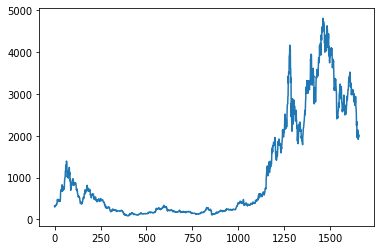

In [826]:
plt.plot(eth_history_df.Close)

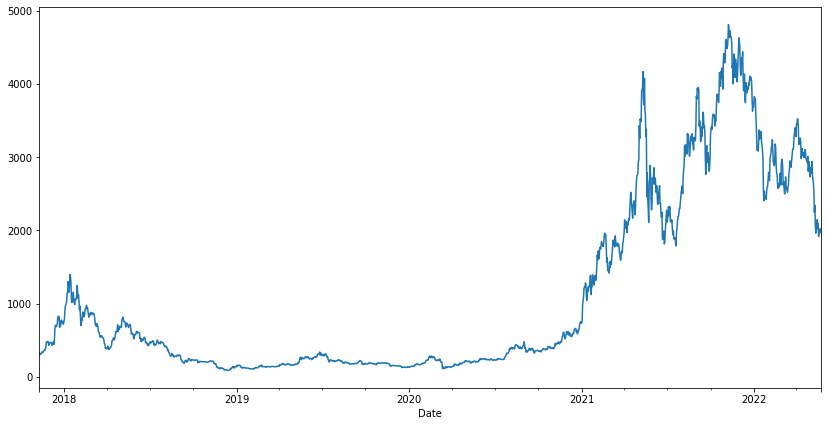

In [827]:
eth_history_date_index_df = eth_history_df.copy()
eth_history_date_index_df = eth_history_date_index_df.set_index('Date')
eth_history_date_index_df.Close.plot(figsize=(14,7))

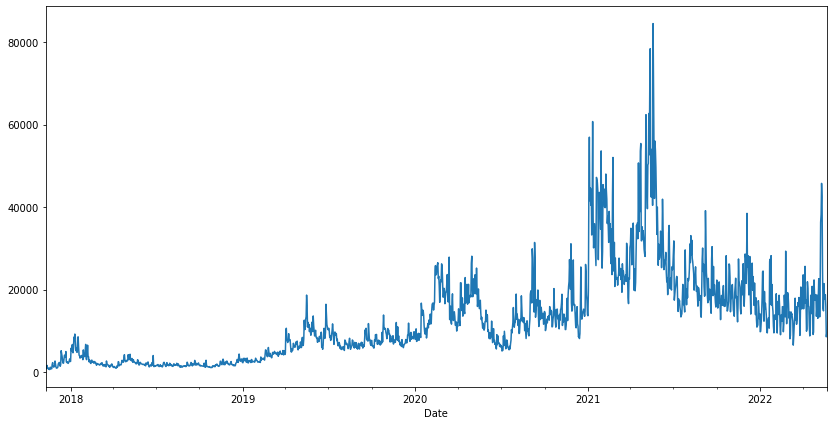

In [828]:
eth_history_date_index_df.Volume_in_mil.plot(figsize=(14,7))

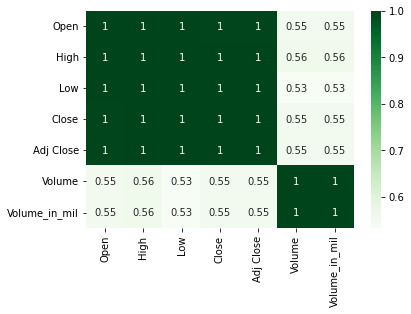

In [829]:
sns.heatmap(eth_history_date_index_df.corr(), annot=True, cmap="Greens")
plt.show()

In [830]:
eth_history_df.Close

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
1651    1916.656128
1652    2018.336182
1653    1961.315674
1654    1974.518311
1655    2017.376343
Name: Close, Length: 1656, dtype: float64

In [831]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [832]:
# Calculate deltaClose and deltaPctClose
eth_history_df['deltaClose'] = eth_history_df['Close'].diff()
eth_history_df['deltaPctClose'] = eth_history_df['Close'].pct_change()
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
0      320.884003    893249984     893.249984         NaN            NaN  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1651 rows x 10 columns]

In [833]:
eth_history_df.shape

(1656, 10)

In [834]:
# Drop first row where deltaClose is NaN
eth_history_df = eth_history_df.iloc[1:, :]
eth_history_df.shape

(1655, 10)

In [835]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
5    2017-11-14   316.763000   340.177002   316.763000   337.631012   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
5      337.631012   1069680000    1069.680000   20.915009       0.066037  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1650 rows x 10 columns]

In [836]:
def print_col_min_max(df, col):
  display(df[(df[col] == df[col].max()) | (df[col] == df[col].min())])

print_col_min_max(eth_history_df, 'deltaClose')
print_col_min_max(eth_history_df, 'deltaPctClose')

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   
1292 2021-05-24  2099.936035  2672.595703  2090.639648  2643.591064   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1287  2460.679199  84482912776   84482.912776 -919.390869      -0.272003  
1292  2643.591064  53697121740   53697.121740  534.011230       0.253136

Date        Open        High         Low       Close   Adj Close  \
33  2017-12-12  522.286011  657.317993  504.493988  651.431030  651.431030   
854 2020-03-12  194.738922  195.147934  111.210709  112.347122  112.347122   

          Volume  Volume_in_mil  deltaClose  deltaPctClose  
33    5179829760    5179.829760  136.295044       0.264581  
854  22134741655   22134.741655  -82.521408      -0.423472

In [837]:
eth_history_df.loc['2020-03-10':'2020-03-15']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [838]:
eth_history_df.loc['2017-12-10':'2017-12-15']
# eth_history_df.loc[(eth_history_df.index.month==12)].head(15)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [839]:
eth_history_df.head(20)

Date        Open        High         Low       Close   Adj Close  \
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5  2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6  2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7  2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8  2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9  2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10 2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11 2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12 2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13 2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14 2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   
15 2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
16 2017-11-25  475.675995  485.191986  461.053009  466.276001  466.276001   
17 2017-11-26  465.973999  472.722992  451.605988  471.329987  471.329987   
18 2017-11-27  471.531006  493.404999  468.484985  480.355011  480.355011   
19 2017-11-28  480.518005  482.480011  466.346985  472.902008  472.902008   
20 2017-11-29  473.281006  522.307007  425.071014  427.523010  427.523010   

        Volume  Volume_in_mil  deltaClose  deltaPctClose  
1    885985984     885.985984  -21.631012      -0.067411  
2    842300992     842.300992   15.428009       0.051555  
3   1613479936    1613.479936   -6.773010      -0.021523  
4   1041889984    1041.889984    8.808013       0.028606  
5   1069680000    1069.680000   20.915009       0.066037  
6    722665984     722.665984   -4.274017      -0.012659  
7    797254016     797.254016   -2.432984      -0.007298  
8    621732992     621.732992    1.470001       0.004442  
9    649638976     649.638976   15.217988       0.045783  
10  1181529984    1181.529984    6.773986       0.019487  
11   807027008     807.027008   12.344025       0.034832  
12   949912000     949.912000   -6.329010      -0.017258  
13   800819008     800.819008   20.251007       0.056190  
14  1845680000    1845.680000   29.513977       0.077535  
15  2292829952    2292.829952   64.745026       0.157851  
16  1422080000    1422.080000   -8.635010      -0.018182  
17  1197779968    1197.779968    5.053986       0.010839  
18  1396480000    1396.480000    9.025024       0.019148  
19  1346499968    1346.499968   -7.453003      -0.015516  
20  2675940096    2675.940096  -45.378998      -0.095959

In [840]:
eth_history_df = eth_history_df.set_index('Date')

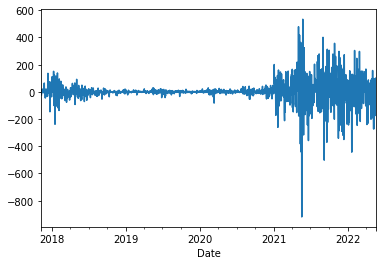

In [841]:
# Plot deltaClose
eth_history_df.deltaClose.plot()

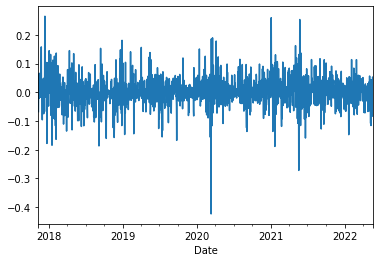

In [842]:
# Plot deltaPctClose
# plt.plot(eth_history_df.deltaPctClose)
eth_history_df.deltaPctClose.plot()

In [843]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1655.000000  1655.000000  1655.000000  1655.000000  1655.000000   
mean   1090.036278  1126.224181  1048.963612  1090.811581  1090.811581   
std    1257.679934  1296.423071  1212.807284  1257.231479  1257.231479   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.936753   204.721497   194.634827   199.030334   199.030334   
50%     402.142944   417.159210   390.609985   403.997040   403.997040   
75%    1896.623963  1971.903321  1811.487244  1905.000427  1905.000427   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil   deltaClose  deltaPctClose  
count  1.655000e+03    1655.000000  1655.000000    1655.000000  
mean   1.266486e+10   12664.856986     1.025071       0.002436  
std    1.116051e+10   11160.508713    80.388975       0.051012  
min    6.217330e+08     621.732992  -919.390869      -0.423472  
25%    3.426054e+09    3426.054254    -9.499260      -0.021530  
50%    9.926712e+09    9926.711979     0.371323       0.001544  
75%    1.803431e+10   18034.306122    13.964226       0.028021  
max    8.448291e+10   84482.912776   534.011230       0.264581

In [844]:
df_close = eth_history_df.reset_index()['Close']
df_deltaClose = eth_history_df.reset_index()['deltaClose']
df_deltaPctClose = eth_history_df.reset_index()['deltaPctClose']

In [845]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [846]:
print(df_close)
print(df_deltaClose)
print(df_deltaPctClose)

0        299.252991
1        314.681000
2        307.907990
3        316.716003
4        337.631012
           ...     
1650    1916.656128
1651    2018.336182
1652    1961.315674
1653    1974.518311
1654    2017.376343
Name: Close, Length: 1655, dtype: float64
0       -21.631012
1        15.428009
2        -6.773010
3         8.808013
4        20.915009
           ...    
1650   -173.753052
1651    101.680054
1652    -57.020508
1653     13.202637
1654     42.858032
Name: deltaClose, Length: 1655, dtype: float64
0      -0.067411
1       0.051555
2      -0.021523
3       0.028606
4       0.066037
          ...   
1650   -0.083119
1651    0.053051
1652   -0.028251
1653    0.006732
1654    0.021706
Name: deltaPctClose, Length: 1655, dtype: float64


### Time Resampling

In [847]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [848]:
# Rules 
rule_desc = {
    "MS": "Montly Start Frequency",
    "QS": "Quarterly Start Frequency",
    "A": "Year End Frequency",
}

In [849]:
# Check Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-12-31  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2019-12-31   336.959900   361.398682   315.954865   336.753174   336.753174   
2020-12-31   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-12-31  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-12-31  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31   5179829760    5179.829760  136.295044       0.264581  
2018-12-31   9214950400    9214.950400  151.209961       0.180750  
2019-12-31  18661465873   18661.465873   30.004486       0.156042  
2020-12-31  31421134556   31421.134556   50.385926       0.189404  
2021-12-31  84482912776   84482.912776  534.011230       0.259475  
2022-12-31  45743399154   45743.399154  304.424316       0.113627

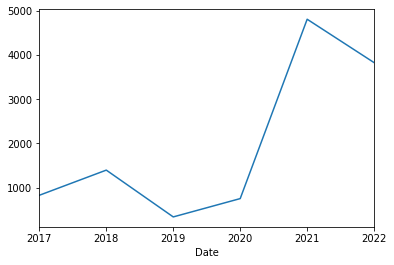

In [850]:
# Plot Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()['Close'].plot()

In [851]:
# Check Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-01-01  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2018-04-01   816.088013   835.057007   784.237000   816.119995   816.119995   
2018-07-01   500.838013   513.432983   488.416992   501.002014   501.002014   
2018-10-01   233.220001   234.145004   226.945007   230.768005   230.768005   
2019-01-01   158.902405   165.549622   154.337418   158.795425   158.795425   
2019-04-01   336.959900   361.398682   315.954865   336.753174   336.753174   
2019-07-01   313.325165   318.223114   305.285828   313.251404   313.251404   
2019-10-01   193.191071   195.942505   188.667679   193.293259   193.293259   
2020-01-01   284.561310   287.123688   264.279663   284.217499   284.217499   
2020-04-01   247.548538   252.222000   242.819748   247.444946   247.444946   
2020-07-01   477.007874   487.211884   432.079193   477.051910   477.051910   
2020-10-01   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-01-01  1959.902954  2036.286499  1896.684448  1960.164795  1960.164795   
2021-04-01  4174.635742  4362.350586  3785.848633  4168.701172  4168.701172   
2021-07-01  3951.520752  4022.469238  3868.994385  3952.133545  3952.133545   
2021-10-01  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-01-01  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   
2022-04-01  3522.364990  3573.960205  3442.000244  3522.833496  3522.833496   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01   5179829760    5179.829760  136.295044       0.264581  
2018-01-01   9214950400    9214.950400  151.209961       0.144702  
2018-04-01   4316120064    4316.120064   92.394043       0.144937  
2018-07-01   2836200000    2836.200000   30.807984       0.152855  
2018-10-01   4370343387    4370.343387   21.071106       0.180750  
2019-01-01   5957715043    5957.715043   14.732445       0.140933  
2019-04-01  18661465873   18661.465873   30.004486       0.156042  
2019-07-01  11757739233   11757.739233   18.153443       0.071311  
2019-10-01  13831784986   13831.784986   19.354660       0.119349  
2020-01-01  27864623061   27864.623061   29.554932       0.189404  
2020-04-01  28089191904   28089.191904   25.589234       0.178264  
2020-07-01  31421134556   31421.134556   41.972168       0.114729  
2020-10-01  31104004592   31104.004592   50.385926       0.098177  
2021-01-01  60733630300   60733.630300  200.972717       0.259475  
2021-04-01  84482912776   84482.912776  534.011230       0.253136  
2021-07-01  39131346397   39131.346397  401.095459       0.116810  
2021-10-01  38478999182   38478.999182  357.061524       0.101889  
2022-01-01  29312342666   29312.342666  304.424316       0.113627  
2022-04-01  45743399154   45743.399154  167.909424       0.056465

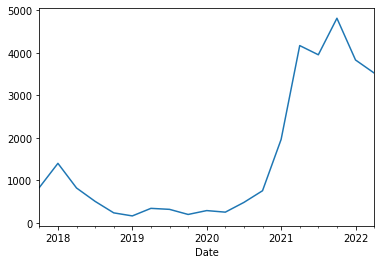

In [852]:
# Plot Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()['Close'].plot()

In [853]:
# Check Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-12-31    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-12-31   104.645050   106.058876   102.934563   104.535301   104.535301   
2020-12-31   110.406784   116.021622    95.184303   110.605873   110.605873   
2021-12-31   730.402649   749.201843   718.109497   730.367554   730.367554   
2022-12-31  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31    621732992     621.732992 -146.203003      -0.178066  
2018-12-31    948488000     948.488000 -238.230103      -0.186866  
2019-12-31   2212109224    2212.109224  -42.485535      -0.167444  
2020-12-31   5109032700    5109.032700  -82.521408      -0.423472  
2021-12-31  10894785525   10894.785525 -919.390869      -0.272003  
2022-12-31   6532996574    6532.996574 -443.188476      -0.147674

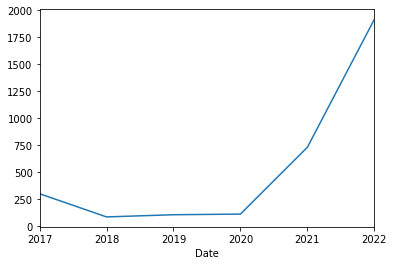

In [854]:
# Plot Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()['Close'].plot()

In [855]:
# Check Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-01-01   385.904999   409.928986   368.632996   385.967987   385.967987   
2018-04-01   370.380005   385.195007   363.804993   370.285004   370.285004   
2018-07-01   183.679001   185.587006   170.257004   183.330994   183.330994   
2018-10-01    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-01-01   104.645050   106.058876   102.934563   104.535301   104.535301   
2019-04-01   141.465485   142.733994   140.737564   141.830322   141.830322   
2019-07-01   166.651703   170.773514   157.130325   166.727127   166.727127   
2019-10-01   122.656837   128.097565   119.780060   122.603889   122.603889   
2020-01-01   110.406784   116.021622    95.184303   110.605873   110.605873   
2020-04-01   133.612320   135.634552   129.730942   135.634552   135.634552   
2020-07-01   225.288483   229.629318   224.544495   225.387070   225.387070   
2020-10-01   340.943085   342.450836   334.545563   340.815857   340.815857   
2021-01-01   730.402649   749.201843   718.109497   730.367554   730.367554   
2021-04-01  1810.884277  1850.179810  1707.600586  1813.217285  1813.217285   
2021-07-01  1786.276245  1836.998047  1722.050781  1787.510742  1787.510742   
2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113  3307.516113   
2022-01-01  2406.924316  2498.507080  2172.301270  2405.181152  2405.181152   
2022-04-01  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01    621732992     621.732992 -146.203003      -0.178066  
2018-01-01   1151170048    1151.170048 -238.230103      -0.184400  
2018-04-01    948488000     948.488000  -92.742004      -0.130962  
2018-07-01   1164120000    1164.120000  -53.391998      -0.186866  
2018-10-01   1084810000    1084.810000  -36.270004      -0.160651  
2019-01-01   2212109224    2212.109224  -22.942764      -0.147065  
2019-04-01   4611999536    4611.999536  -42.485535      -0.126162  
2019-07-01   5238542572    5238.542572  -41.880737      -0.167444  
2019-10-01   5837211771    5837.211771  -14.235626      -0.082403  
2020-01-01   7430904515    7430.904515  -82.521408      -0.423472  
2020-04-01   5600408178    5600.408178  -23.000564      -0.108698  
2020-07-01   5109032700    5109.032700  -54.368561      -0.136464  
2020-10-01   8125837102    8125.837102  -51.885499      -0.090918  
2021-01-01  13652004358   13652.004358 -260.703125      -0.188605  
2021-04-01  18765854896   18765.854896 -919.390869      -0.272003  
2021-07-01  13296586731   13296.586731 -501.985108      -0.127784  
2021-10-01  10894785525   10894.785525 -350.226318      -0.084709  
2022-01-01   6532996574    6532.996574 -443.188476      -0.147674  
2022-04-01   8546822406    8546.822406 -272.029541      -0.115810

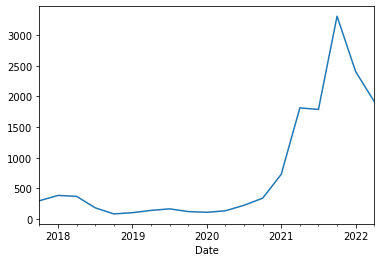

In [856]:
# Plot Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()['Close'].plot()

In [857]:
# Check mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-12-31   485.397384   502.704094   463.143234   483.507727   483.507727   
2019-12-31   181.771947   186.367671   176.947580   181.770137   181.770137   
2020-12-31   305.899433   315.010121   297.221470   307.542978   307.542978   
2021-12-31  2771.215477  2872.125942  2658.899019  2778.354149  2778.354149   
2022-12-31  2884.363482  2956.100795  2795.452046  2872.725646  2872.725646   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-12-31  2.037049e+09    2037.048527    8.381711       0.018814  
2018-12-31  2.276869e+09    2276.869352   -1.707849      -0.003163  
2019-12-31  6.967028e+09    6967.027840   -0.010294       0.000771  
2020-12-31  1.424528e+10   14245.276813    1.661728       0.006070  
2021-12-31  2.728082e+10   27280.819105    8.068026       0.005983  
2022-12-31  1.626140e+10   16261.401599  -11.727158      -0.003378

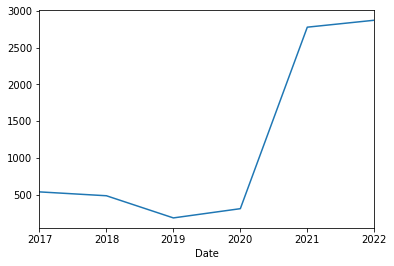

In [858]:
# Plot mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()['Close'].plot()

In [859]:
# Check mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-01-01   871.791709   911.641502   818.832786   867.320934   867.320934   
2018-04-01   574.128099   591.948726   553.943782   574.633165   574.633165   
2018-07-01   341.340281   349.463186   329.785836   338.810457   338.810457   
2018-10-01   163.693786   167.622957   158.729876   162.600609   162.600609   
2019-01-01   130.946503   133.907482   128.210433   131.030422   131.030422   
2019-04-01   218.524983   226.252934   212.650139   220.182696   220.182696   
2019-07-01   212.830744   217.485638   205.900593   211.642078   211.642078   
2019-10-01   164.080147   167.117726   160.357724   163.539845   163.539845   
2020-01-01   184.166511   190.282980   177.310988   184.195056   184.195056   
2020-04-01   204.400526   209.576307   200.072916   205.440528   205.440528   
2020-07-01   341.606476   351.650596   331.544364   343.038269   343.038269   
2020-10-01   490.997786   506.028851   477.598274   495.047509   495.047509   
2021-01-01  1528.509033  1594.946289  1458.077849  1541.277395  1541.277395   
2021-04-01  2593.181946  2719.470675  2442.737247  2597.435252  2597.435252   
2021-07-01  2841.780110  2937.660499  2740.083865  2850.271792  2850.271792   
2021-10-01  4092.440313  4207.002234  3966.242721  4095.572674  4095.572674   
2022-01-01  2939.659597  3018.542529  2849.177338  2935.221465  2935.221465   
2022-04-01  2788.658666  2848.028562  2702.465964  2764.559805  2764.559805   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-10-01  2.037049e+09    2037.048527    8.381711       0.018814  
2018-01-01  3.341332e+09    3341.331567   -4.003066      -0.004936  
2018-04-01  2.170332e+09    2170.331749    0.645308       0.002875  
2018-07-01  1.702962e+09    1702.961632   -2.416652      -0.006083  
2018-10-01  1.914835e+09    1914.834926   -1.081302      -0.004483  
2019-01-01  3.615201e+09    3615.201047    0.090509       0.001510  
2019-04-01  8.675775e+09    8675.775150    1.639361       0.009012  
2019-07-01  7.352821e+09    7352.821448   -1.204606      -0.004241  
2019-10-01  8.170021e+09    8170.021255   -0.546319      -0.003090  
2020-01-01  1.543945e+10   15439.454149    0.043766       0.003119  
2020-04-01  1.417553e+10   14175.526180    1.018917       0.006600  
2020-07-01  1.243379e+10   12433.794811    1.452422       0.005978  
2020-10-01  1.494455e+10   14944.554142    4.107234       0.008558  
2021-01-01  3.244661e+10   32446.605572   13.117318       0.012545  
2021-04-01  3.647458e+10   36474.583603    3.914127       0.004509  
2021-07-01  2.118185e+10   21181.848898    7.903602       0.004106  
2021-10-01  1.923247e+10   19232.470275    7.401672       0.002898  
2022-01-01  1.493472e+10   14934.716189   -4.455444      -0.000440  
2022-04-01  1.855759e+10   18557.587885  -24.312817      -0.008462

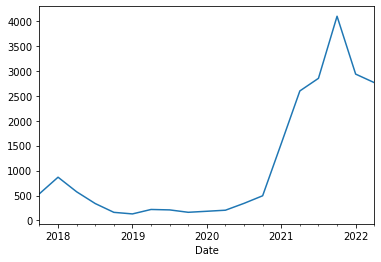

In [860]:
# Plot mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()['Close'].plot()

In [861]:
def plot_resample_with_rule(rule):
  fig, axs = plt.subplots(1, 3, figsize=(20, 4))
  plt.tight_layout()
  fig.autofmt_xdate()

  # plt.title(f"Min Max and Mean for Rule: {rule}")
  axs[0].set_title(f"Min Close Price for Rule: {rule_desc[rule]}")
  axs[0].plot(eth_history_df.resample(rule=rule).min()['Close'])

  axs[1].set_title(f"Max Close Price for Rule: {rule_desc[rule]}")
  axs[1].plot(eth_history_df.resample(rule=rule).max()['Close'])

  axs[2].set_title(f"Avg Close Price for Rule: {rule_desc[rule]}")
  axs[2].plot(eth_history_df.resample(rule=rule).mean()['Close'])

  plt.show()

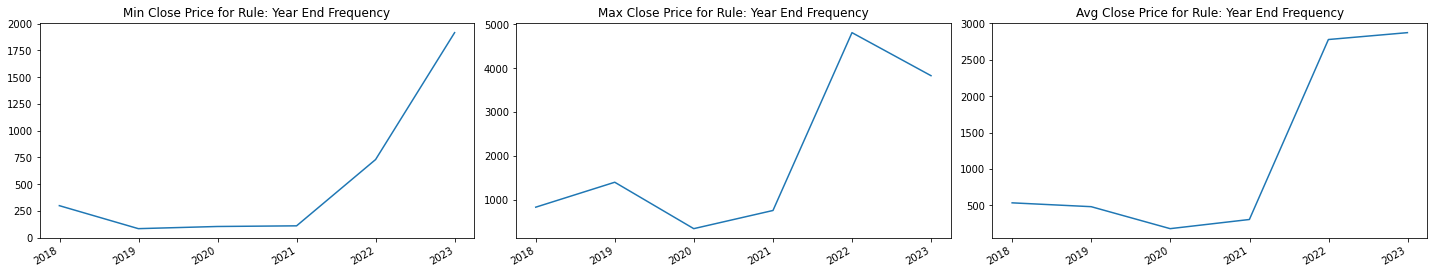

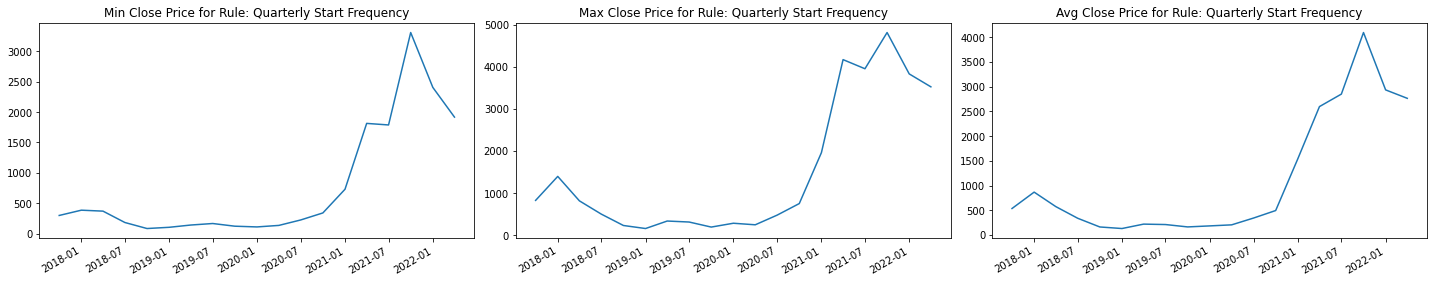

In [862]:
plot_resample_with_rule('A')
plot_resample_with_rule('QS')

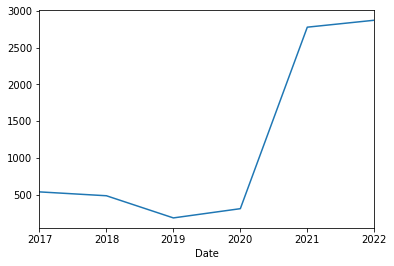

In [863]:
eth_history_df.resample(rule='A').mean()['Close'].plot()

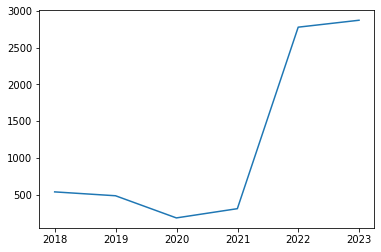

In [864]:
plt.plot(eth_history_df.resample(rule='A').mean()['Close'])

In [865]:
eth_history_df.resample(rule='A').mean()['Close']

Date
2017-12-31     536.148270
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    2872.725646
Freq: A-DEC, Name: Close, dtype: float64

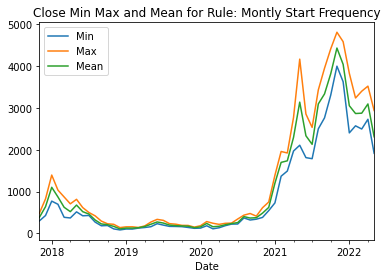

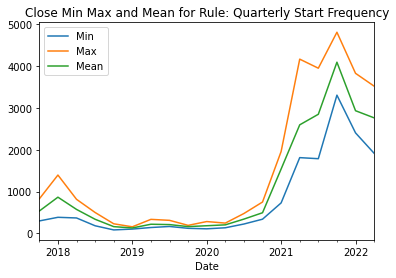

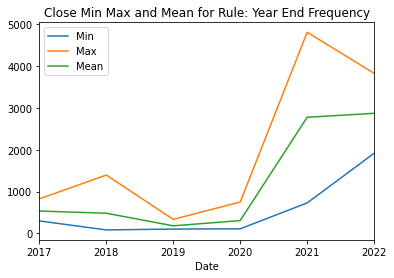

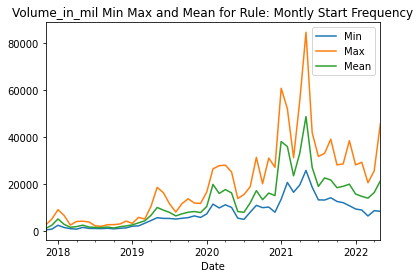

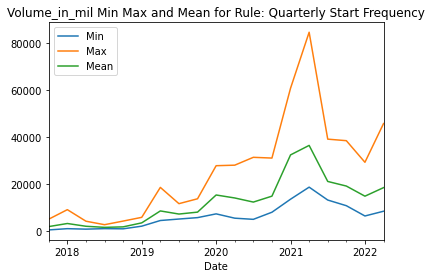

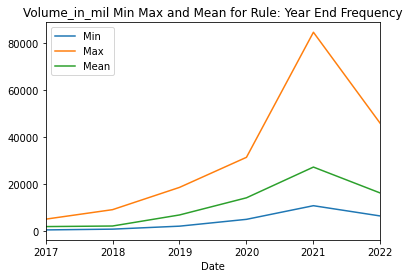

In [866]:
def plot_resample_with_rule_2(rule, column):
  eth_history_df.resample(rule=rule).min()[column].plot(legend=True, label="Min")
  eth_history_df.resample(rule=rule).max()[column].plot(legend=True, label="Max")
  eth_history_df.resample(rule=rule).mean()[column].plot(legend=True, label="Mean")
  plt.title(f"{column} Min Max and Mean for Rule: {rule_desc[rule]}")
  plt.show()

plot_resample_with_rule_2('MS', 'Close')
plot_resample_with_rule_2('QS', 'Close')
plot_resample_with_rule_2('A', 'Close')
plot_resample_with_rule_2('MS', 'Volume_in_mil')
plot_resample_with_rule_2('QS', 'Volume_in_mil')
plot_resample_with_rule_2('A', 'Volume_in_mil')

In [867]:
# eth_history_df.resample(rule="MS").min()['Close']

### Seasonality & Trend Check

In [868]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [869]:
eth_history_df_copy = eth_history_df.copy()
eth_history_df_copy.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [870]:
# eth_history_df_copy.set_index('Date', inplace=True)
# eth_history_df_copy.head()

In [871]:
eth_history_df_copy = eth_history_df_copy[['Close']]
eth_history_df_copy.head()

Close
Date                  
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003
2017-11-14  337.631012

In [872]:
def checkSeasonality(df):
  result = seasonal_decompose(df, model="multiplicative")

  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid

  result.plot()

  return trend, seasonal, residual

(                  Close
 Date                   
 2017-11-10          NaN
 2017-11-11          NaN
 2017-11-12          NaN
 2017-11-13   320.067143
 2017-11-14   324.801575
 ...                 ...
 2022-05-18  2018.524031
 2022-05-19  2000.191110
 2022-05-20          NaN
 2022-05-21          NaN
 2022-05-22          NaN
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10  0.996570
 2017-11-11  1.001954
 2017-11-12  1.002124
 2017-11-13  1.001597
 2017-11-14  1.001585
 ...              ...
 2022-05-18  1.001356
 2022-05-19  0.994813
 2022-05-20  0.996570
 2022-05-21  1.001954
 2022-05-22  1.002124
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10       NaN
 2017-11-11       NaN
 2017-11-12       NaN
 2017-11-13  0.987952
 2017-11-14  1.037854
 ...              ...
 2022-05-18  0.948248
 2022-05-19  1.014333
 2022-05-20       NaN
 2022-05-21       NaN
 2022-05-22       NaN
 
 [1655 rows x 1 columns])

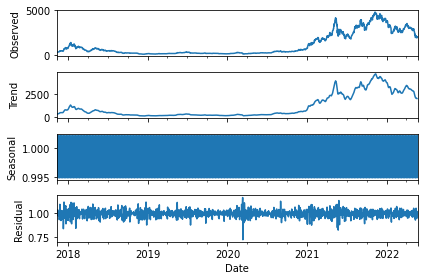

In [873]:
checkSeasonality(eth_history_df_copy)

### Plot Histogram

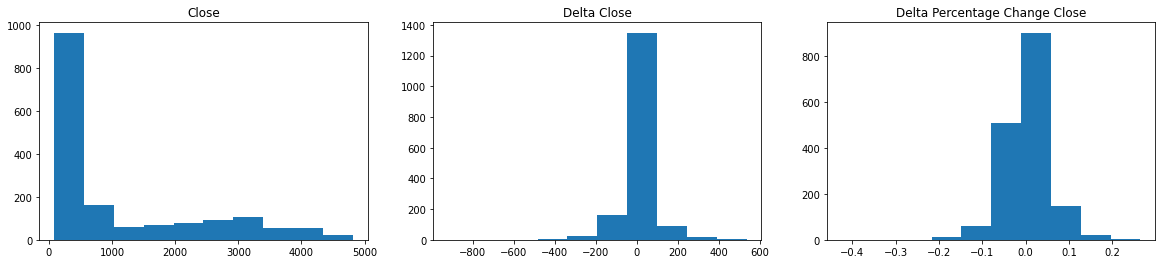

In [874]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].set_title('Close')
axs[0].hist(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].hist(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].hist(eth_history_df['deltaPctClose'])

plt.show()

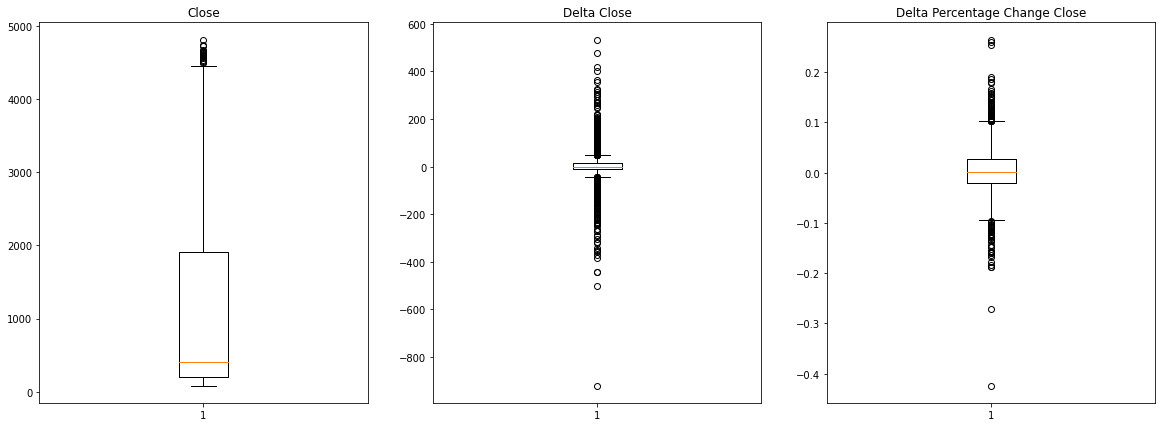

In [875]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].set_title('Close')
axs[0].boxplot(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].boxplot(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].boxplot(eth_history_df['deltaPctClose'])

plt.show()

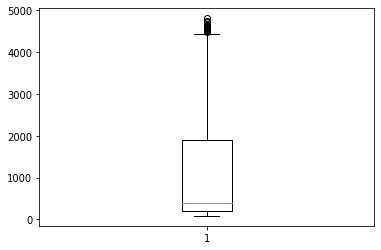

In [876]:
# eth_history_df['Close'].boxplot()
plt.boxplot(eth_history_df['Close'])
plt.show()

In [877]:
print("Close")
print(eth_history_df['Close'].describe())
print("")
print("DeltaClose")
print(eth_history_df['deltaClose'].describe())
print("")
print("DeltaPctClose")
print(eth_history_df['deltaPctClose'].describe())

Close
count    1655.000000
mean     1090.811581
std      1257.231479
min        84.308296
25%       199.030334
50%       403.997040
75%      1905.000427
max      4812.087402
Name: Close, dtype: float64

DeltaClose
count    1655.000000
mean        1.025071
std        80.388975
min      -919.390869
25%        -9.499260
50%         0.371323
75%        13.964226
max       534.011230
Name: deltaClose, dtype: float64

DeltaPctClose
count    1655.000000
mean        0.002436
std         0.051012
min        -0.423472
25%        -0.021530
50%         0.001544
75%         0.028021
max         0.264581
Name: deltaPctClose, dtype: float64


In [878]:
# eth_history_df.loc(2019)['Close']

print(eth_history_df['2019']['Close'].describe())

print(eth_history_df['2021']['Close'].describe())

count    365.000000
mean     181.770137
std       50.382666
min      104.535301
25%      142.398178
50%      173.889969
75%      210.522598
max      336.753174
Name: Close, dtype: float64
count     365.000000
mean     2778.354149
std      1023.543690
min       730.367554
25%      1895.552124
50%      2633.518311
75%      3638.122070
max      4812.087402
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


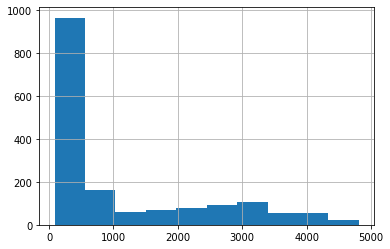

In [879]:
eth_history_df['Close'].hist()

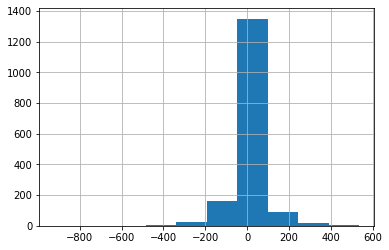

In [880]:
eth_history_df['deltaClose'].hist()

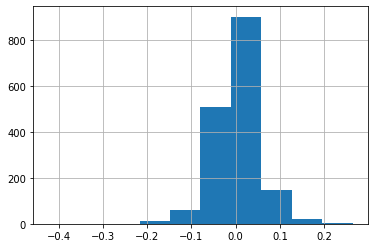

In [881]:
eth_history_df['deltaPctClose'].hist()

### Check Mean and Variance
We will check mean and variance after splitting the data in half

In [882]:
def checkMeanAndVariance(df, col_name):
  # X = series.values
  X = df[[col_name]].copy()
  split = int(len(X)/2)
  X1, X2 = X[0:split], X[split:]

  # mean1, mean2 = round(float(X1.mean()), 2), round(float(X2.mean()), 2)
  # var1, var2 = round(float(X1.var()), 2), round(float(X2.var()), 2)
  mean1, mean2 = float(X1.mean()), float(X2.mean())
  var1, var2 = float(X1.var()), float(X2.var())

  print(f"Analysis for {col_name}")
  print(f"mean1={float(mean1)}, mean2={float(mean2)}")
  print(f"variance1={float(var1)}, variance2={float(var2)}")

  # X1.hist()
  # X2.hist()
  # plt.show()

  fig, axs = plt.subplots(1, 2, figsize=(20, 4))

  # axs[0].set_title(col_name)
  axs[0].hist(X1[col_name])
  axs[1].hist(X2[col_name])

  plt.show()


Analysis for Close
mean1=336.99130479685624, mean2=1843.7214459396118
variance1=66678.96376660561, variance2=1958859.9142969397


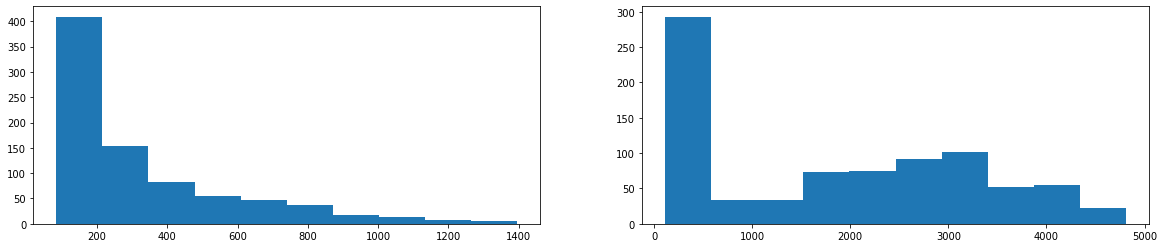

---
Analysis for deltaClose
mean1=-0.044336764207980967, mean2=2.0931870096618352
variance1=711.6047444288109, variance2=12211.744361361849


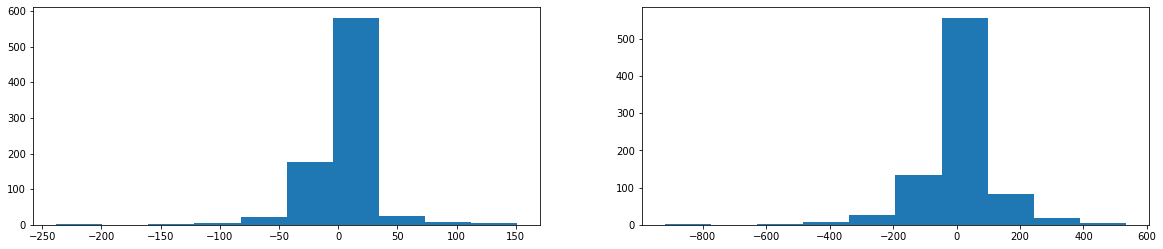

---
Analysis for deltaPctClose
mean1=0.0011225718930756613, mean2=0.003747398607861875
variance1=0.002536055377473825, variance2=0.002668042041104589


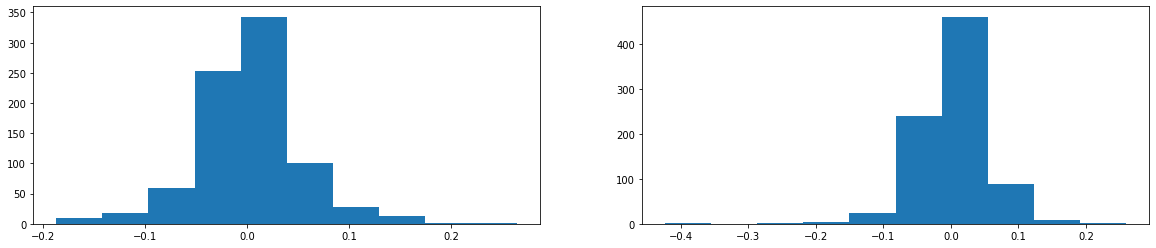

In [883]:
checkMeanAndVariance(eth_history_df, 'Close')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaClose')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaPctClose')

In [884]:
df_deltaPctClose.min(), df_deltaPctClose.max()

(-0.42347221483119923, 0.2645807082093463)

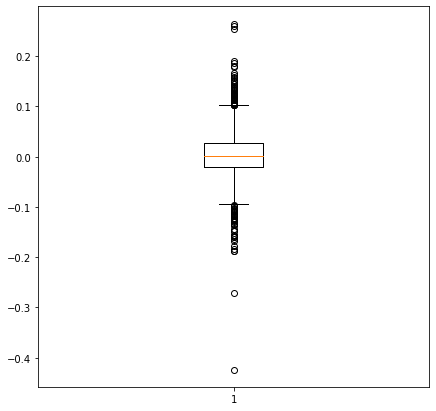

In [885]:
plt.figure(figsize =(7, 7))
plt.boxplot(df_deltaPctClose)
plt.show()

### Augmented Dickey-Fuller test
Read more : https://machinelearningmastery.com/time-series-data-stationary-python/

In [886]:
from statsmodels.tsa.stattools import adfuller

In [887]:
def checkAdfuller(df, col_name):
  s = df[col_name].values
  result = adfuller(s)
  adf_val, p_val = result[0], result[1]
  print(col_name)
  # print('ADF Statistic: %f' % result[0])
  # print('p-value: %f' % result[1])
  print('ADF Statistic: %f' % adf_val)
  print('p-value: %f' % p_val)
  print(f"{col_name} series is", "Stationary" if p_val < 0.05 else "NOT Stationary")

In [888]:
checkAdfuller(eth_history_df, 'Close')
print('---')
checkAdfuller(eth_history_df, 'deltaClose')
print('---')
checkAdfuller(eth_history_df, 'deltaPctClose')

Close
ADF Statistic: -1.115920
p-value: 0.708682
Close series is NOT Stationary
---
deltaClose
ADF Statistic: -10.255242
p-value: 0.000000
deltaClose series is Stationary
---
deltaPctClose
ADF Statistic: -14.812627
p-value: 0.000000
deltaPctClose series is Stationary


In [889]:
# create dataset 
# In this step we use a window length and format the train and test data so that they are in time series format.
# Ex, X = [1, 2, 3], y = [4]
# Ex, X = [2, 3, 4], y = [5]
# Ex, X = [4, 5, 6], y = [6]
# And so on....

def create_Xy_dataset(df, interval, print_samples = False):
  dataX, dataY = [], []

  # print(f"interval = {interval}")
  rangeSize = len(df) - interval

  for i in range(rangeSize):
    x = df[i:i+interval, 0]
    y = df[i+interval, 0]

    if (print_samples):
      # Print some samples
      if (i<5 or i>len(df) - interval - 1 - 5):
        print(f"x = {x}")
        print(f"y = {y}")
        print("")

    dataX.append(x)
    dataY.append(y)
  
  X = np.array(dataX)
  X = X.reshape(X.shape[0], X.shape[1], 1) # reshape for LSTM. Add 3rd dimension
  y = np.array(dataY)

  return X, y

In [890]:
# X, y = create_Xy_dataset(df_close, 3)
print(len(df_close))
# print(X)
# print(y)

1655


## Create Models

In [891]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D

In [892]:
def getNextNPredictions(interval, X_train, model, num_next_n_predictions):
  # Initialize Prediction Set
  predictions = []
  predictions_flat = []

  eval_batch = X_train[-1:]

  for i in range(num_next_n_predictions):
    # Predict the evaluation batch
    pred = model.predict(eval_batch)[0]

    # Add prediction to predictions array
    predictions.append(pred)
    predictions_flat.append(pred[0])

    # shift eval batch by one by removing the 1st element and adding pred as last element 
    eval_batch = np.append(eval_batch[:, 1:, :], [[pred]], axis=1)
  
  return predictions, predictions_flat


In [893]:
# split into train and test data. By default use 70% data for training and rest for testing.
def df_train_test_split(df, train_size_pct = 0.70):
  training_size = int(len(df) * train_size_pct) # use 70% data to train
  test_size = len(df) - training_size # use the remaining 30% for test

  train_data = df[0:training_size,:]
  test_data = df[training_size:len(df), :1]

  return train_data, test_data

def getScaledDf(df, scaler):
  print('Plot Before Scaling')
  print(plt.plot(df))
  plt.show()
  scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
  print('Plot After Scaling')
  print(plt.plot(scaled_df))
  plt.show()
  return scaled_df

def getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Inverse scale
  if (scaler):
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

  return train_predict, test_predict

def getPredSeries(df, interval, train_predict, test_predict):
  print(f"train_predict length = {len(train_predict)} ")
  print(f"test_predict length = {len(test_predict)} ")

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[interval:len(train_predict)+interval, :] = train_predict

  print(f"test_predict range start = {len(train_predict)+(interval*2)+1}")
  print(f"test_predict range end = {len(df)-1}")
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(train_predict)+(interval*2):, :] = test_predict

  return trainPredictPlot, testPredictPlot

def plotSequence(df, interval, scaler, train_predict, test_predict):
  # get train and test predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot, testPredictPlot = getPredSeries(df, interval, train_predict, test_predict)

  # plot baseline and predictions
  if (scaler):
    plt.plot(scaler.inverse_transform(df))
  else:
    plt.plot(df)

  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

def plotResiduals(pred_train_df, pred_test_df):
  fig, axs = plt.subplots(1, 2, figsize=(16, 4))
  train_residual_df = pred_train_df.copy()
  train_residual_df['residual'] = train_residual_df['y_train_actual'] - train_residual_df['train_predict']
  test_residual_df = pred_test_df.copy()
  test_residual_df['residual'] = test_residual_df['y_test_actual'] - test_residual_df['test_predict']

  sns.residplot(x="train_predict", y="residual", data=train_residual_df, ax=axs[0])
  axs[0].set(xlabel="Train Predicted", ylabel="Residual")
  axs[0].set_title("Train Residuals")

  sns.residplot(x="test_predict", y="residual", data=test_residual_df, ax=axs[1])
  axs[1].set(xlabel="Test Predicted", ylabel="Residual")
  axs[1].set_title("Test Residuals")

  plt.suptitle("Residual Plot")
  plt.show()

def evaluateIntervalPerformance(model, df, interval, scaler, X_train, y_train, X_test, y_test):
  train_predict, test_predict = getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test)

  if (scaler):
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
  else:
    y_train_actual = y_train.reshape(-1, 1)
    y_test_actual = y_test.reshape(-1, 1)

  pred_train_df = pd.DataFrame({
      "y_train": y_train,
      "y_train_actual": y_train_actual[:, 0],
      "train_predict": train_predict[:, 0]
  })
  pred_test_df = pd.DataFrame({
      "y_test": y_test,
      "y_test_actual": y_test_actual[:, 0],
      "test_predict": test_predict[:, 0],
  })
  print("Train")
  display(pred_train_df.head(10))
  print("Test")
  display(pred_test_df.head(10))

  # Calculate RMSE
  rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
  rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))

  mape_train = mean_absolute_percentage_error(y_train_actual, train_predict)
  mape_test = mean_absolute_percentage_error(y_test_actual, test_predict)

  print(f"RMSE Train = {rmse_train}")
  print(f"RMSE Test = {rmse_test}")
  print(f"MAPE Train = {mape_train}")
  print(f"MAPE Test = {mape_test}")

  plotSequence(df, interval, scaler, train_predict, test_predict)
  plotResiduals(pred_train_df, pred_test_df)

  return pred_train_df, pred_test_df, rmse_train, rmse_test, mape_train, mape_test


In [894]:
class IntervalBasedModel:
  def __init__(self, df_close, df_deltaClose, df_deltaPctClose):
    self.df_close = df_close
    self.df_deltaClose = df_deltaClose
    self.df_deltaPctClose = df_deltaPctClose
    self.df_metrics = pd.DataFrame({
        "model": [],
        "interval": [],
        "target": [],
        "rmse_train": [],
        "rmse_test": [],
        "mape_train": [],
        "mape_test": [],
    })

    ##################
    # Scale
    ##################
    self.scale()
  
  def scale(self):
    # Initialize Scaler 
    print("Initialize Scaler ")
    self.scalerClose = MinMaxScaler(feature_range=(0,1))
    # scalerDeltaClose = MinMaxScaler(feature_range=(-1,1))
    self.scalerDeltaClose = MinMaxScaler(feature_range=(-0.5,0.5))

    # Scale 
    print("Scaling Close")
    self.close_scaled = getScaledDf(self.df_close, self.scalerClose)
    print("Scaling Delta Close")
    self.deltaClose_scaled = getScaledDf(self.df_deltaClose, self.scalerDeltaClose)
    print("Scaling Delta Pct Close")
    self.deltaPctClose_scaled = np.array(self.df_deltaPctClose).reshape(-1, 1)

  def train_test_split(self):
    # 1. Split data
    # Close
    print("Split Train and Test Data")
    close_train_data, close_test_data = df_train_test_split(self.close_scaled)
    print(f"Close Total data Size = {len(self.close_scaled)}")
    print(f"Close Train data Size = {len(close_train_data)}")
    print(f"Close Test data Size = {len(close_test_data)}")
    print("---------------------")

    # Delta Close
    deltaClose_train_data, deltaClose_test_data = df_train_test_split(self.deltaClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaClose_test_data)}")
    print("---------------------")

    # Delta Pct Close
    deltaPctClose_train_data, deltaPctClose_test_data = df_train_test_split(self.deltaPctClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaPctClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaPctClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaPctClose_test_data)}")
    print("---------------------")
    print("")

    # 2. Format data for time series modeling
    print("Create (X, y) from Train and Test Data")
    # Close
    self.close_X_train, self.close_y_train = create_Xy_dataset(close_train_data, self.interval)
    self.close_X_test, self.close_y_test = create_Xy_dataset(close_test_data, self.interval)
    print("Close train, test length ", len(self.close_X_train), len(self.close_X_test))
    print("Close train shape, test shape ", self.close_X_train.shape, self.close_y_train.shape)
    print("Close test shape, test shape ", self.close_X_test.shape, self.close_y_test.shape)
    print("")

    # Delta Close
    self.deltaClose_X_train, self.deltaClose_y_train = create_Xy_dataset(deltaClose_train_data, self.interval)
    self.deltaClose_X_test, self.deltaClose_y_test = create_Xy_dataset(deltaClose_test_data, self.interval)
    print("Delta Close train, test length ", len(self.deltaClose_X_train), len(self.deltaClose_X_test))
    print("Close train shape, test shape ", self.deltaClose_X_train.shape, self.deltaClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaClose_X_test.shape, self.deltaClose_y_test.shape)
    print("")

    # Delta Percentage Close
    self.deltaPctClose_X_train, self.deltaPctClose_y_train = create_Xy_dataset(deltaPctClose_train_data, self.interval)
    self.deltaPctClose_X_test, self.deltaPctClose_y_test = create_Xy_dataset(deltaPctClose_test_data, self.interval)
    print("Delta Percentage Close train, test length ", len(self.deltaPctClose_X_train), len(self.deltaPctClose_X_test))
    print("Close train shape, test shape ", self.deltaPctClose_X_train.shape, self.deltaPctClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaPctClose_X_test.shape, self.deltaPctClose_y_test.shape)
    print("")
  
  def fit_lstm(self, interval, X_train, y_train, epochs=20, batch_size=128, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, input_shape=(interval, 1)))
    # model.add(Dropout(0.2))
    model.add(Dense(1))
    # model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def fit_stacked_lstm(self, interval, X_train, y_train, epochs=20, batch_size=128, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(interval, 1)))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model


  def fit_cnn_lstm(self, interval, X_train, y_train, epochs=50, batch_size=128, loss="mean_squared_error", verbose=0):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, input_shape=(interval, 1)))
    # model.add(LSTM(100, input_shape=(interval, 1)))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def get_lstm_models(self):
    ##### LSTM MODELS #####

    # Fit LSTM model on close 
    print("(LSTM) Fit Model for Close. Interval = ", self.interval)
    lstm_close_model = self.fit_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit LSTM model on delta close 
    print("(LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    lstm_deltaClose_model = self.fit_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit LSTM model on delta pct close 
    print("(LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    lstm_deltaPctClose_model = self.fit_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_stacked_lstm_models(self):
    ##### Stacked LSTM MODELS #####
    
    # Fit LSTM model on close 
    print("(Stacked LSTM) Fit Model for Close. Interval = ", self.interval)
    stacked_lstm_close_model = self.fit_stacked_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit LSTM model on delta close 
    print("(Stacked LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    stacked_lstm_deltaClose_model = self.fit_stacked_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit LSTM model on delta pct close 
    print("(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    stacked_lstm_deltaPctClose_model = self.fit_stacked_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)

    return stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model

  def get_cnn_lstm_models(self):
    ##### CNN-LSTM MODELS #####
    
    # Fit CNN-LSTM model on close 
    print("(CNN-LSTM) Fit Model for Close. Interval = ", self.interval)
    cnn_lstm_close_model = self.fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit model on delta close 
    print("(CNN-LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    cnn_lstm_deltaClose_model = self.fit_cnn_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit model on delta pct close 
    print("(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    cnn_lstm_deltaPctClose_model = self.fit_cnn_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)
    
    return cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model

  def execute(self, interval):
    print("################################################################")
    print("################## Executing for interval ", interval, " ##################")
    print("################################################################")

    ##################
    # 1. Set Interval
    ##################
    self.interval = interval

    ##################
    # 2. Split data into train and test
    ##################
    self.train_test_split()

    ##################
    # 3. Fit Model
    ##################
    lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model = self.get_lstm_models()
    stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model = self.get_stacked_lstm_models()
    cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model = self.get_cnn_lstm_models()

    ##################
    # 4. Evaluate Performance
    ##################
    
    ##### Evaluate LSTM Model Performance #####
    # Close
    print("(LSTM) Evaluate Close")
    lstm_close_train_predict, lstm_close_test_predict, lstm_close_rmse_train, lstm_close_rmse_test, lstm_close_mape_train, lstm_close_mape_test = evaluateIntervalPerformance(
      lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(LSTM) Evaluate Delta Close")
    lstm_deltaClose_train_predict, lstm_deltaClose_test_predict, lstm_deltaClose_rmse_train, lstm_deltaClose_rmse_test, lstm_deltaClose_mape_train, lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(LSTM) Evaluate Percentage Change Close")
    lstm_deltaPctClose_train_predict, lstm_deltaPctClose_test_predict, lstm_deltaPctClose_rmse_train, lstm_deltaPctClose_rmse_test, lstm_deltaPctClose_mape_train, lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate Stacked LSTM Model Performance #####
    # Close
    print("(Stacked LSTM) Evaluate Close")
    stacked_lstm_close_train_predict, stacked_lstm_close_test_predict, stacked_lstm_close_rmse_train, stacked_lstm_close_rmse_test, stacked_lstm_close_mape_train, stacked_lstm_close_mape_test = evaluateIntervalPerformance(
      stacked_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(Stacked LSTM) Evaluate Delta Close")
    stacked_lstm_deltaClose_train_predict, stacked_lstm_deltaClose_test_predict, stacked_lstm_deltaClose_rmse_train, stacked_lstm_deltaClose_rmse_test, stacked_lstm_deltaClose_mape_train, stacked_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(Stacked LSTM) Evaluate Percentage Change Close")
    stacked_lstm_deltaPctClose_train_predict, stacked_lstm_deltaPctClose_test_predict, stacked_lstm_deltaPctClose_rmse_train, stacked_lstm_deltaPctClose_rmse_test, stacked_lstm_deltaPctClose_mape_train, stacked_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate CNN-LSTM Model Performance #####
    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(CNN-LSTM) Evaluate Delta Close")
    cnn_lstm_deltaClose_train_predict, cnn_lstm_deltaClose_test_predict, cnn_lstm_deltaClose_rmse_train, cnn_lstm_deltaClose_rmse_test, cnn_lstm_deltaClose_mape_train, cnn_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(CNN-LSTM) Evaluate Percentage Change Close")
    cnn_lstm_deltaPctClose_train_predict, cnn_lstm_deltaPctClose_test_predict, cnn_lstm_deltaPctClose_rmse_train, cnn_lstm_deltaPctClose_rmse_test, cnn_lstm_deltaPctClose_mape_train, cnn_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##################
    # 5. Save RMSE and MAPE for this Interval in metrics df
    ##################

    ## LSTM
    lstm_close_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": lstm_close_rmse_train,
        "rmse_test": lstm_close_rmse_test,
        "mape_train": lstm_close_mape_train,
        "mape_test": lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_close_metrics_data, ignore_index=True)

    lstm_deltaClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": lstm_deltaClose_rmse_train,
        "rmse_test": lstm_deltaClose_rmse_test,
        "mape_train": lstm_deltaClose_mape_train,
        "mape_test": lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaClose_metrics_data, ignore_index=True)

    lstm_deltaPctClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": lstm_deltaPctClose_rmse_train,
        "rmse_test": lstm_deltaPctClose_rmse_test,
        "mape_train": lstm_deltaPctClose_mape_train,
        "mape_test": lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## Stacked LSTM
    stacked_lstm_close_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": stacked_lstm_close_rmse_train,
        "rmse_test": stacked_lstm_close_rmse_test,
        "mape_train": stacked_lstm_close_mape_train,
        "mape_test": stacked_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_close_metrics_data, ignore_index=True)

    stacked_lstm_deltaClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": stacked_lstm_deltaClose_rmse_train,
        "rmse_test": stacked_lstm_deltaClose_rmse_test,
        "mape_train": stacked_lstm_deltaClose_mape_train,
        "mape_test": stacked_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaClose_metrics_data, ignore_index=True)

    stacked_lstm_deltaPctClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": stacked_lstm_deltaPctClose_rmse_train,
        "rmse_test": stacked_lstm_deltaPctClose_rmse_test,
        "mape_train": stacked_lstm_deltaPctClose_mape_train,
        "mape_test": stacked_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## CNN-LSTM
    cnn_lstm_close_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": cnn_lstm_close_rmse_train,
        "rmse_test": cnn_lstm_close_rmse_test,
        "mape_train": cnn_lstm_close_mape_train,
        "mape_test": cnn_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_close_metrics_data, ignore_index=True)

    cnn_lstm_deltaClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": cnn_lstm_deltaClose_rmse_train,
        "rmse_test": cnn_lstm_deltaClose_rmse_test,
        "mape_train": cnn_lstm_deltaClose_mape_train,
        "mape_test": cnn_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaClose_metrics_data, ignore_index=True)

    cnn_lstm_deltaPctClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": cnn_lstm_deltaPctClose_rmse_train,
        "rmse_test": cnn_lstm_deltaPctClose_rmse_test,
        "mape_train": cnn_lstm_deltaPctClose_mape_train,
        "mape_test": cnn_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaPctClose_metrics_data, ignore_index=True)

  def execute_all_intervals(self):
    ##################
    # Test for following intervals
    ##################
    self.execute(3)
    display(self.df_metrics)

    self.execute(5)
    display(self.df_metrics)

    self.execute(10)
    display(self.df_metrics)

    self.execute(20)
    display(self.df_metrics)

  def get_metrics_df(self):
    return self.df_metrics


Initialize Scaler 
Scaling Close
Plot Before Scaling


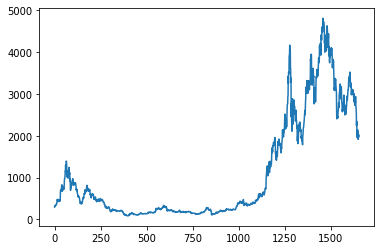

Plot After Scaling


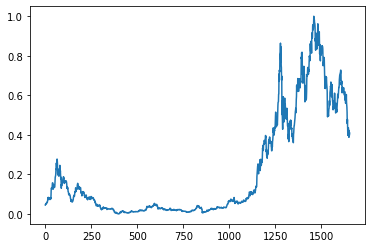

Scaling Delta Close
Plot Before Scaling


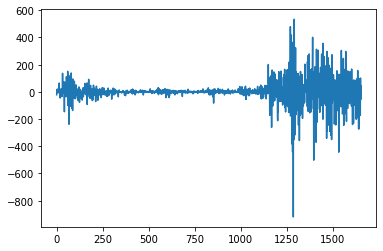

Plot After Scaling


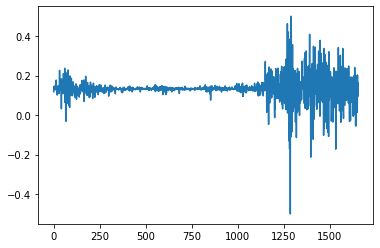

Scaling Delta Pct Close
################################################################
################## Executing for interval  3  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Percentage Close train, test length  1155 494
Close train shape, test sh

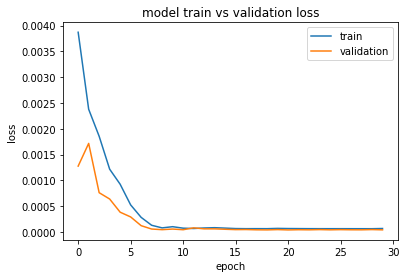

(LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_443"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_590 (LSTM)             (None, 100)               40800     
                                                                 
 dense_622 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


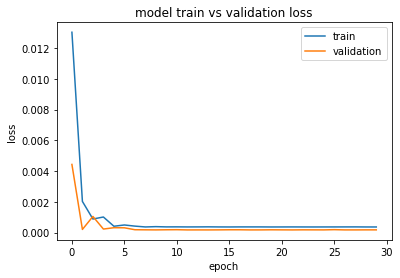

(LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_444"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_591 (LSTM)             (None, 100)               40800     
                                                                 
 dense_623 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


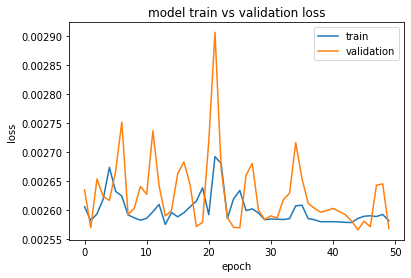

(Stacked LSTM) Fit Model for Close. Interval =  3
Model Summary
Model: "sequential_445"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_592 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_593 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_282 (Dropout)       (None, 100)               0         
                                                                 
 dense_624 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


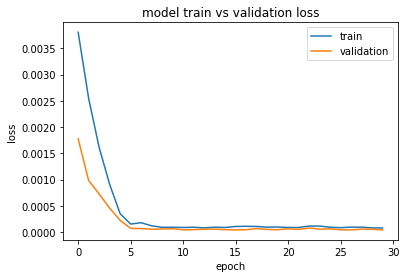

(Stacked LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_446"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_594 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_595 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_283 (Dropout)       (None, 100)               0         
                                                                 
 dense_625 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


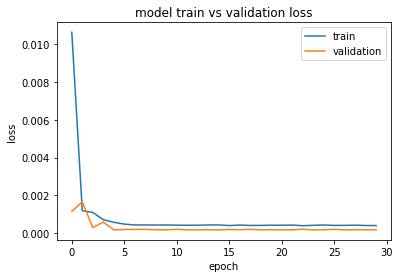

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_447"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_596 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_597 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_284 (Dropout)       (None, 100)               0         
                                                                 
 dense_626 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


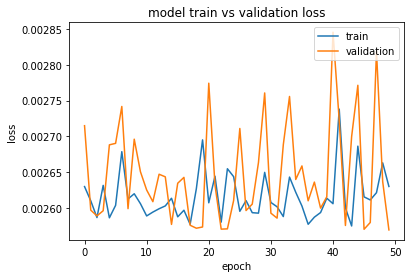

(CNN-LSTM) Fit Model for Close. Interval =  3
Model Summary
Model: "sequential_448"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_147 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_598 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_285 (Dropout)       (None, 100)               0         
                                                                 
 dense_627 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


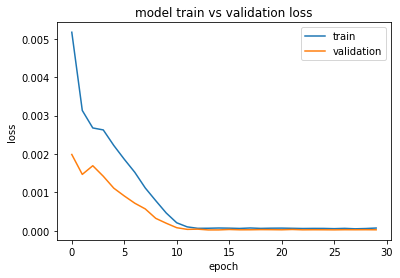

(CNN-LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_449"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_148 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_599 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_286 (Dropout)       (None, 100)               0         
                                                                 
 dense_628 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


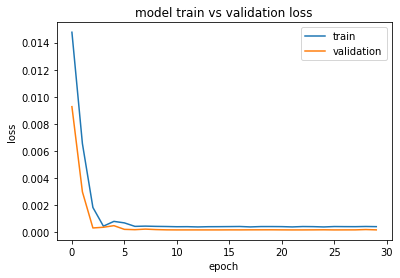

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_450"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_149 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_600 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_287 (Dropout)       (None, 100)               0         
                                                                 
 dense_629 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


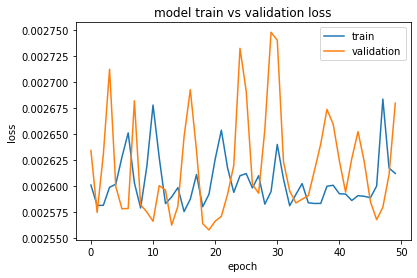

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     317.405518
1  0.053582      337.631012     323.536499
2  0.052678      333.356995     327.993317
3  0.052163      330.924011     338.191376
4  0.052474      332.394012     345.243866
5  0.055693      347.612000     342.853485
6  0.057126      354.385986     345.459381
7  0.059737      366.730011     352.790955
8  0.058398      360.401001     364.284393
9  0.062681      380.652008     370.201904

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1090.334106
1  0.230029    1171.834595   1119.379883
2  0.243080    1233.537598   1178.878174
3  0.242368    1230.172241   1214.116577
4  0.248102    1257.279541   1214.754150
5  0.273487    1377.295898   1246.513184
6  0.274540    1382.274048   1280.327026
7  0.219397    1121.570923   1335.952148
8  0.243709    1236.512207   1334.766479
9  0.242541    1230.990601   1269.043335

RMSE Train = 37.28967009077509
RMSE Test = 188.53099342782568
MAPE Train = 0.07403501210563238
MAPE Test = 0.051573328478130176
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


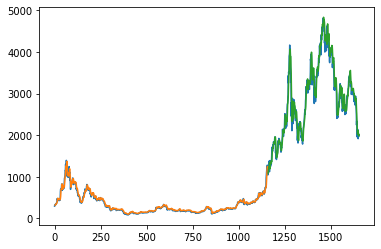

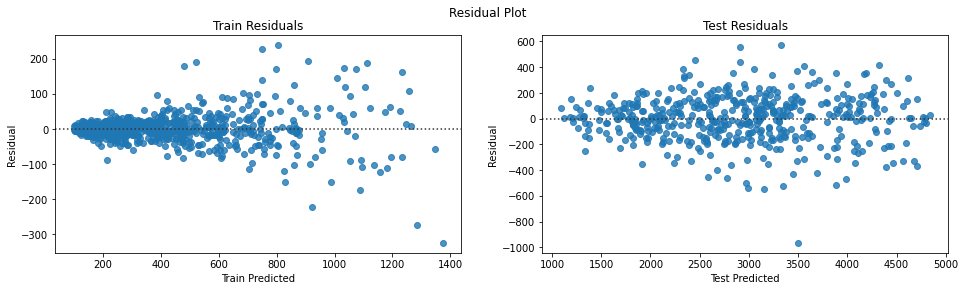

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -1.301093
1  0.146969       20.915009       1.102443
2  0.129638       -4.274017       0.767685
3  0.130904       -2.432984       2.282532
4  0.133590        1.470001       1.383361
5  0.143049       15.217988      -0.778803
6  0.137239        6.773986       0.321825
7  0.141072       12.344025       1.534963
8  0.128224       -6.329010       2.399915
9  0.146512       20.251007       1.255647

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623    -17.536158
1  0.100503     -46.618408      6.434577
2  0.175033      61.703003     13.995275
3  0.130263      -3.365357      7.043755
4  0.151229      27.107300      0.366222
5  0.215155     120.016357      6.739967
6  0.136004       4.978150      6.895424
7 -0.046796    -260.703125     13.030787
8  0.211663     114.941284      1.067120
9  0.128779      -5.521606    -17.332447

RMSE Train = 25.20348228911161
RMSE Test = 142.87493842833663
MAPE Train = 2.0371726627905513
MAPE Test = 1.2250989576660194
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


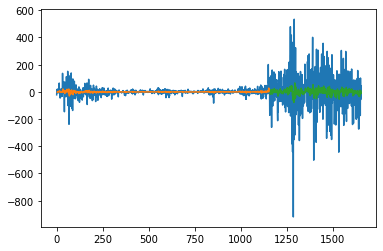

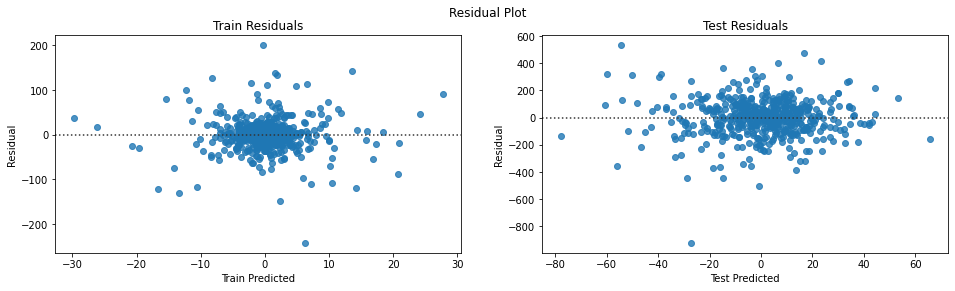

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.002854
1  0.066037        0.066037       0.004386
2 -0.012659       -0.012659       0.004154
3 -0.007298       -0.007298       0.007264
4  0.004442        0.004442       0.005114
5  0.045783        0.045783       0.002407
6  0.019487        0.019487       0.003436
7  0.034832        0.034832       0.005618
8 -0.017258       -0.017258       0.006103
9  0.056190        0.056190       0.005448

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.003492
1 -0.038260      -0.038260      0.005971
2  0.052655       0.052655      0.009738
3 -0.002728      -0.002728      0.004785
4  0.022035       0.022035      0.004143
5  0.095457       0.095457      0.005252
6  0.003614       0.003614      0.004801
7 -0.188605      -0.188605      0.008473
8  0.102482       0.102482      0.006042
9 -0.004465      -0.004465     -0.004734

RMSE Train = 0.050803694052941474
RMSE Test = 0.05086059440245166
MAPE Train = 1.6570252996006758
MAPE Test = 1.148649509348533
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


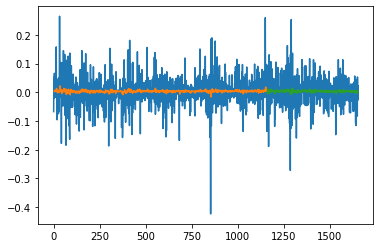

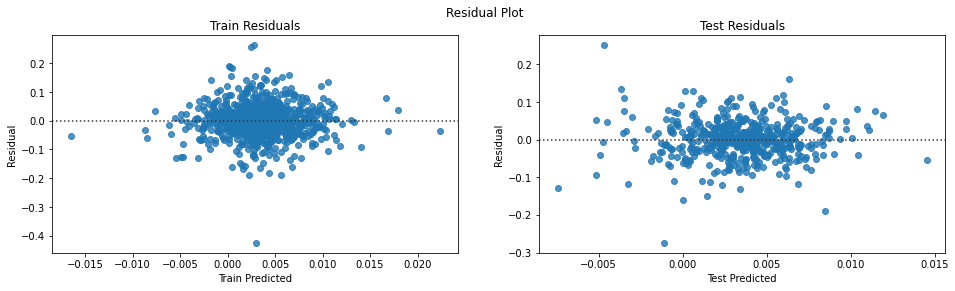

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     312.598846
1  0.053582      337.631012     319.140778
2  0.052678      333.356995     322.871643
3  0.052163      330.924011     333.369324
4  0.052474      332.394012     341.251221
5  0.055693      347.612000     338.688232
6  0.057126      354.385986     340.880829
7  0.059737      366.730011     348.044556
8  0.058398      360.401001     359.793488
9  0.062681      380.652008     366.022980

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1090.275269
1  0.230029    1171.834595   1115.050781
2  0.243080    1233.537598   1177.893555
3  0.242368    1230.172241   1214.895508
4  0.248102    1257.279541   1213.609497
5  0.273487    1377.295898   1246.764648
6  0.274540    1382.274048   1277.351807
7  0.219397    1121.570923   1332.788086
8  0.243709    1236.512207   1341.835449
9  0.242541    1230.990601   1275.541870

RMSE Train = 36.94930170656968
RMSE Test = 186.6607747586417
MAPE Train = 0.05891236330894267
MAPE Test = 0.05156714447629834
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


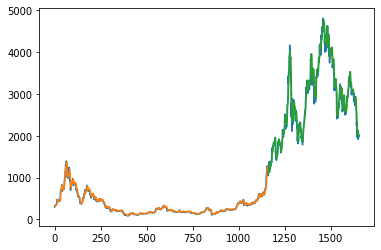

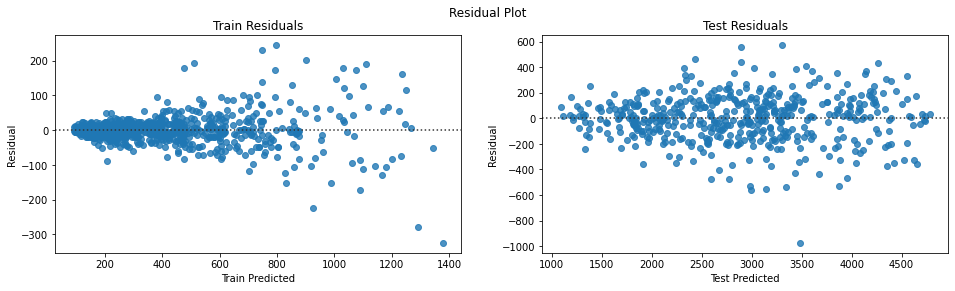

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -1.988065
1  0.146969       20.915009       0.003136
2  0.129638       -4.274017      -0.124945
3  0.130904       -2.432984       0.770327
4  0.133590        1.470001       0.101114
5  0.143049       15.217988      -1.506686
6  0.137239        6.773986      -0.524611
7  0.141072       12.344025       0.314266
8  0.128224       -6.329010       1.030129
9  0.146512       20.251007      -0.034764

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623    -13.396327
1  0.100503     -46.618408      4.886247
2  0.175033      61.703003      9.264698
3  0.130263      -3.365357      5.073713
4  0.151229      27.107300     -0.674501
5  0.215155     120.016357      4.488812
6  0.136004       4.978150      5.559554
7 -0.046796    -260.703125      9.062418
8  0.211663     114.941284     -2.849877
9  0.128779      -5.521606    -12.980462

RMSE Train = 25.19926855627692
RMSE Test = 142.56656653930287
MAPE Train = 2.6204563591828607
MAPE Test = 1.1615041139468651
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


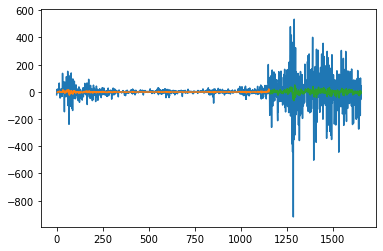

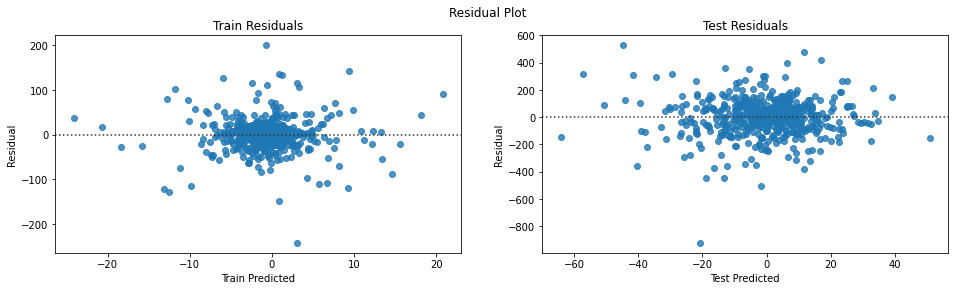

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.005847
1  0.066037        0.066037       0.009081
2 -0.012659       -0.012659       0.008548
3 -0.007298       -0.007298       0.010176
4  0.004442        0.004442       0.009241
5  0.045783        0.045783       0.006594
6  0.019487        0.019487       0.007952
7  0.034832        0.034832       0.009212
8 -0.017258       -0.017258       0.010269
9  0.056190        0.056190       0.008753

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572      0.002203
1 -0.038260      -0.038260      0.009682
2  0.052655       0.052655      0.012183
3 -0.002728      -0.002728      0.010013
4  0.022035       0.022035      0.007361
5  0.095457       0.095457      0.009592
6  0.003614       0.003614      0.009624
7 -0.188605      -0.188605      0.011159
8  0.102482       0.102482      0.007476
9 -0.004465      -0.004465      0.003371

RMSE Train = 0.05109721583242706
RMSE Test = 0.05114945834039954
MAPE Train = 2.416909519012167
MAPE Test = 1.3433679038683088
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


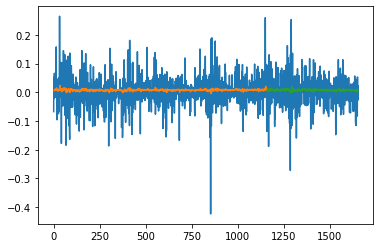

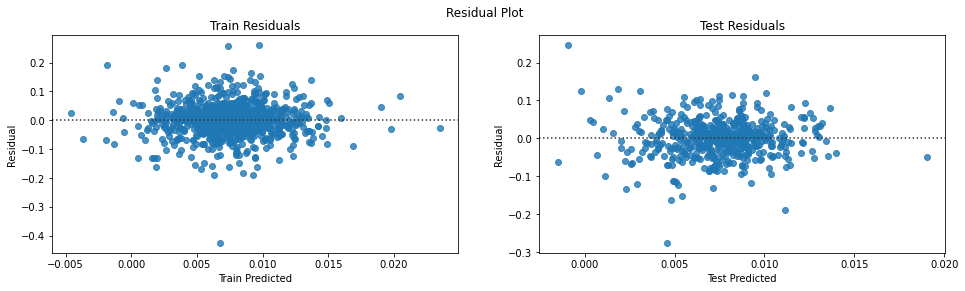

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     307.244537
1  0.053582      337.631012     312.442474
2  0.052678      333.356995     324.341095
3  0.052163      330.924011     330.051697
4  0.052474      332.394012     331.356201
5  0.055693      347.612000     330.589203
6  0.057126      354.385986     338.229950
7  0.059737      366.730011     346.455231
8  0.058398      360.401001     357.460297
9  0.062681      380.652008     359.208435

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1095.584839
1  0.230029    1171.834595   1159.295166
2  0.243080    1233.537598   1178.693359
3  0.242368    1230.172241   1213.116943
4  0.248102    1257.279541   1221.594238
5  0.273487    1377.295898   1246.453613
6  0.274540    1382.274048   1317.005127
7  0.219397    1121.570923   1362.100708
8  0.243709    1236.512207   1250.061279
9  0.242541    1230.990601   1230.274414

RMSE Train = 29.93391794793749
RMSE Test = 191.66230588524053
MAPE Train = 0.041397778813790746
MAPE Test = 0.05002458054699047
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


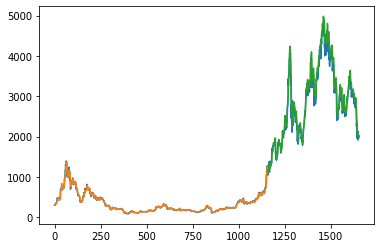

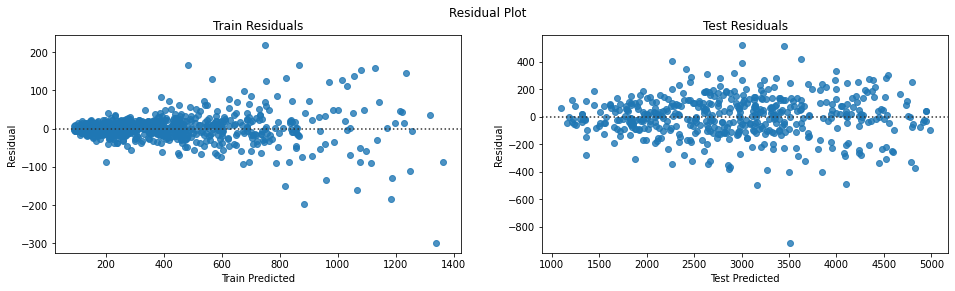

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -1.901825
1  0.146969       20.915009       0.872420
2  0.129638       -4.274017       1.687690
3  0.130904       -2.432984       1.104046
4  0.133590        1.470001       0.275759
5  0.143049       15.217988      -1.077524
6  0.137239        6.773986       0.839328
7  0.141072       12.344025       1.292227
8  0.128224       -6.329010       2.283073
9  0.146512       20.251007       0.066506

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -8.070128
1  0.100503     -46.618408     11.882945
2  0.175033      61.703003      7.680569
3  0.130263      -3.365357      8.967862
4  0.151229      27.107300      0.138473
5  0.215155     120.016357      6.620700
6  0.136004       4.978150     13.989580
7 -0.046796    -260.703125     11.155106
8  0.211663     114.941284    -19.328327
9  0.128779      -5.521606     -8.181404

RMSE Train = 25.192319500987292
RMSE Test = 144.0172606626833
MAPE Train = 2.325257278294294
MAPE Test = 1.24583375952463
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


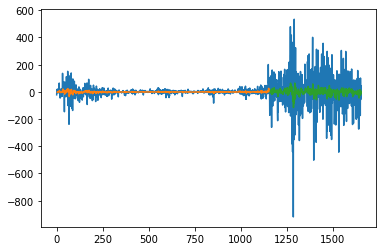

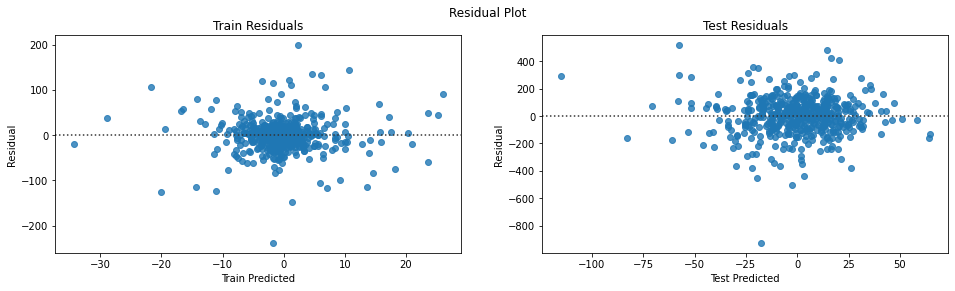

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606      -0.005458
1  0.066037        0.066037      -0.001543
2 -0.012659       -0.012659      -0.001786
3 -0.007298       -0.007298      -0.000134
4  0.004442        0.004442      -0.001485
5  0.045783        0.045783      -0.004627
6  0.019487        0.019487      -0.002727
7  0.034832        0.034832      -0.001198
8 -0.017258       -0.017258       0.000067
9  0.056190        0.056190      -0.001976

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.009689
1 -0.038260      -0.038260     -0.000091
2  0.052655       0.052655      0.002195
3 -0.002728      -0.002728     -0.000348
4  0.022035       0.022035     -0.003528
5  0.095457       0.095457     -0.000896
6  0.003614       0.003614     -0.000315
7 -0.188605      -0.188605      0.001243
8  0.102482       0.102482     -0.003970
9 -0.004465      -0.004465     -0.008697

RMSE Train = 0.05121875265161592
RMSE Test = 0.05132915537614337
MAPE Train = 2.0143441714445025
MAPE Test = 1.091829025218883
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


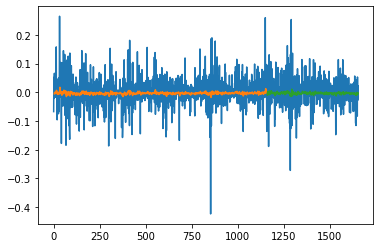

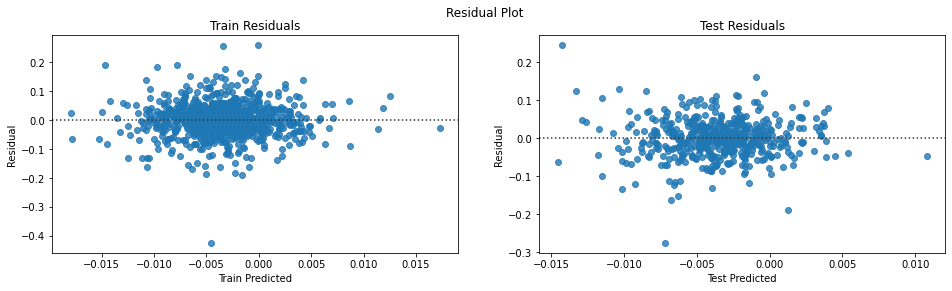

----------------------------


model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   37.289670   
1          LSTM       3.0             Change in Close Price   25.203482   
2          LSTM       3.0  Percentage Change in Close Price    0.050804   
3  Stacked LSTM       3.0                             Close   36.949302   
4  Stacked LSTM       3.0             Change in Close Price   25.199269   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
6      CNN-LSTM       3.0                             Close   29.933918   
7      CNN-LSTM       3.0             Change in Close Price   25.192320   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   

    rmse_test  mape_train  mape_test  
0  188.530993    0.074035   0.051573  
1  142.874938    2.037173   1.225099  
2    0.050861    1.657025   1.148650  
3  186.660775    0.058912   0.051567  
4  142.566567    2.620456   1.161504  
5    0.051149    2.416910   1.343368  
6  191.662306    0.041398   0.050025  
7  144.017261    2.325257   1.245834  
8    0.051329    2.014344   1.091829

################################################################
################## Executing for interval  5  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Percentage Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,

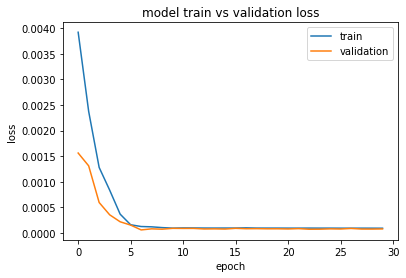

(LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_452"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_602 (LSTM)             (None, 100)               40800     
                                                                 
 dense_631 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


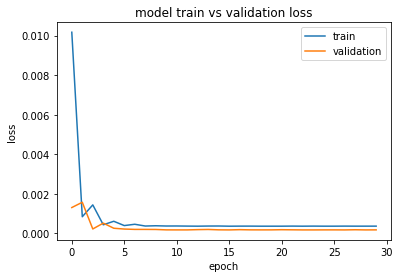

(LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_453"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_603 (LSTM)             (None, 100)               40800     
                                                                 
 dense_632 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


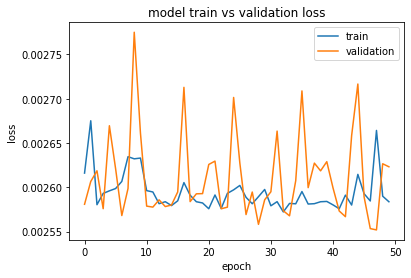

(Stacked LSTM) Fit Model for Close. Interval =  5
Model Summary
Model: "sequential_454"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_604 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_605 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_288 (Dropout)       (None, 100)               0         
                                                                 
 dense_633 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


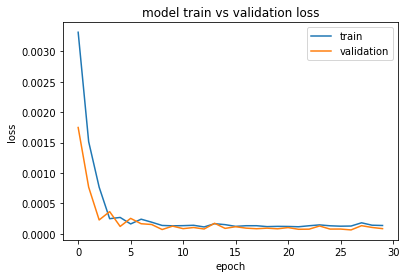

(Stacked LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_455"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_606 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_607 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_289 (Dropout)       (None, 100)               0         
                                                                 
 dense_634 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


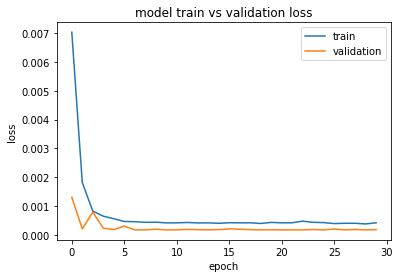

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_456"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_608 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_609 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_290 (Dropout)       (None, 100)               0         
                                                                 
 dense_635 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


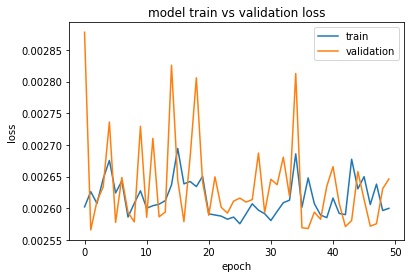

(CNN-LSTM) Fit Model for Close. Interval =  5
Model Summary
Model: "sequential_457"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_150 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_610 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_291 (Dropout)       (None, 100)               0         
                                                                 
 dense_636 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


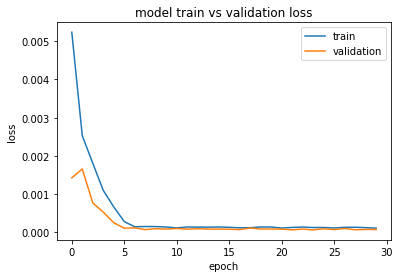

(CNN-LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_458"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_151 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_611 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_292 (Dropout)       (None, 100)               0         
                                                                 
 dense_637 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


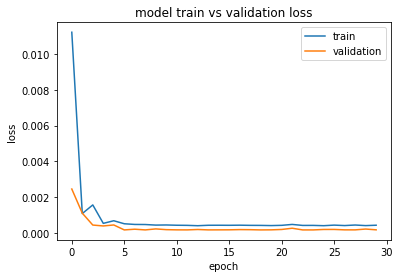

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_459"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_152 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_612 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_293 (Dropout)       (None, 100)               0         
                                                                 
 dense_638 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


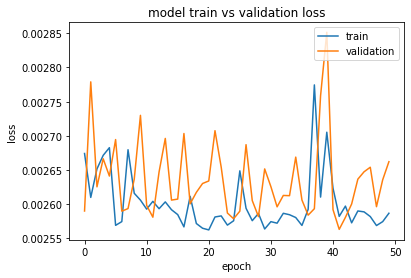

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     307.939880
1  0.052163      330.924011     315.300842
2  0.052474      332.394012     319.524658
3  0.055693      347.612000     325.155334
4  0.057126      354.385986     330.234009
5  0.059737      366.730011     332.654175
6  0.058398      360.401001     338.538910
7  0.062681      380.652008     345.640015
8  0.068924      410.165985     354.475952
9  0.082619      474.911011     364.535522

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1118.245850
1  0.242368    1230.172241   1147.036987
2  0.248102    1257.279541   1189.227295
3  0.273487    1377.295898   1215.123047
4  0.274540    1382.274048   1237.689331
5  0.219397    1121.570923   1281.630371
6  0.243709    1236.512207   1286.302734
7  0.242541    1230.990601   1285.076416
8  0.276515    1391.609375   1274.929688
9  0.262302    1324.414795   1257.263306

RMSE Train = 44.30127485148197
RMSE Test = 231.9673455201457
MAPE Train = 0.061199061717750795
MAPE Test = 0.06372272359121509
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


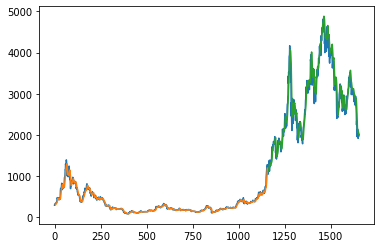

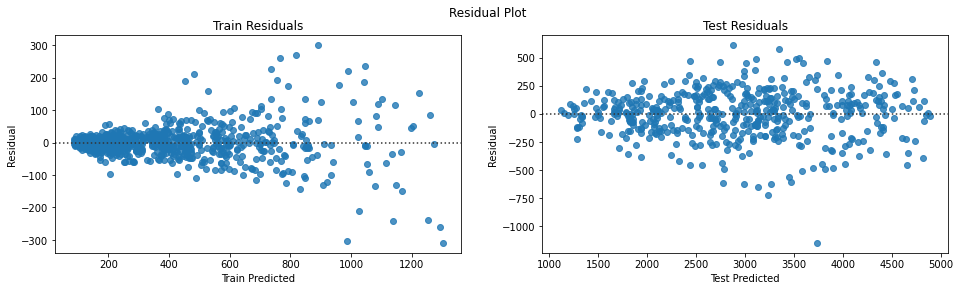

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017       0.573462
1  0.130904       -2.432984       2.087854
2  0.133590        1.470001       1.050552
3  0.143049       15.217988       1.250753
4  0.137239        6.773986       1.289996
5  0.141072       12.344025       0.774139
6  0.128224       -6.329010       1.858394
7  0.146512       20.251007       1.924016
8  0.152885       29.513977       2.517731
9  0.177126       64.745026       3.322086

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -3.337341
1  0.130263      -3.365357      9.200115
2  0.151229      27.107300     11.762682
3  0.215155     120.016357      7.401319
4  0.136004       4.978150      8.571488
5 -0.046796    -260.703125     13.962811
6  0.211663     114.941284     -1.663096
7  0.128779      -5.521606     -3.037278
8  0.243091     160.618774     -4.520116
9  0.086346     -67.194580     -2.337312

RMSE Train = 25.316185418112962
RMSE Test = 143.69924292519832
MAPE Train = 1.9412006668563258
MAPE Test = 1.2269565297983134
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


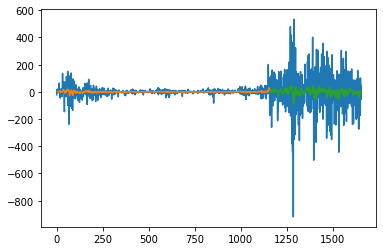

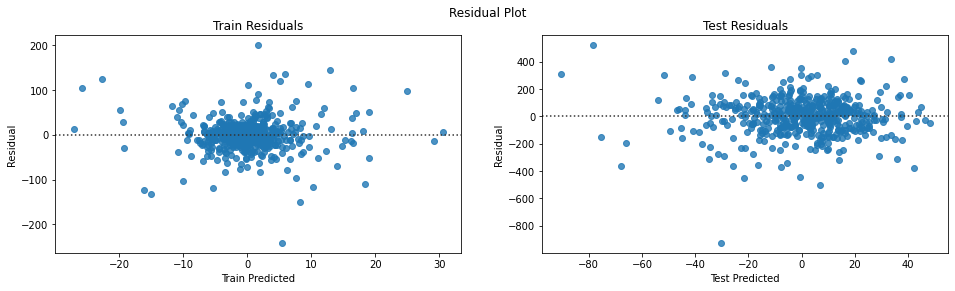

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659      -0.001871
1 -0.007298       -0.007298       0.000770
2  0.004442        0.004442      -0.000152
3  0.045783        0.045783      -0.000729
4  0.019487        0.019487      -0.001552
5  0.034832        0.034832      -0.000911
6 -0.017258       -0.017258      -0.000478
7  0.056190        0.056190       0.000504
8  0.077535        0.077535      -0.000899
9  0.157851        0.157851      -0.000606

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.000169
1 -0.002728      -0.002728     -0.000316
2  0.022035       0.022035      0.000841
3  0.095457       0.095457     -0.000496
4  0.003614       0.003614     -0.001498
5 -0.188605      -0.188605      0.001430
6  0.102482       0.102482      0.002813
7 -0.004465      -0.004465     -0.004816
8  0.130479       0.130479     -0.002330
9 -0.048286      -0.048286     -0.003425

RMSE Train = 0.05093961670734758
RMSE Test = 0.050826657157693036
MAPE Train = 1.4366981314862113
MAPE Test = 1.023783832058957
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


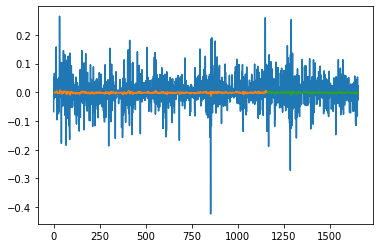

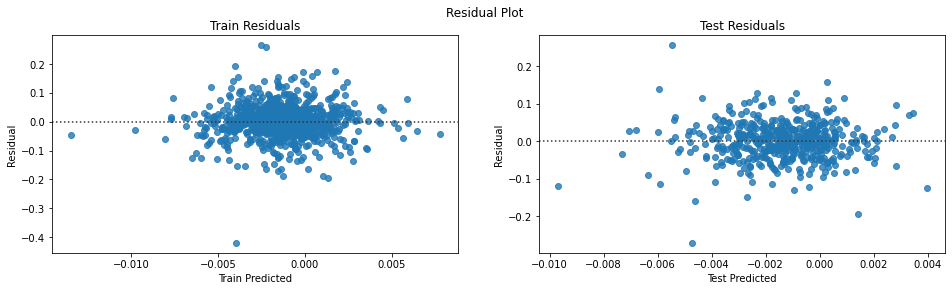

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     332.482849
1  0.052163      330.924011     339.637726
2  0.052474      332.394012     343.678711
3  0.055693      347.612000     349.283691
4  0.057126      354.385986     354.423859
5  0.059737      366.730011     356.722198
6  0.058398      360.401001     362.431061
7  0.062681      380.652008     369.298981
8  0.068924      410.165985     378.085541
9  0.082619      474.911011     388.007080

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1117.156006
1  0.242368    1230.172241   1144.521240
2  0.248102    1257.279541   1185.245605
3  0.273487    1377.295898   1210.255005
4  0.274540    1382.274048   1231.646851
5  0.219397    1121.570923   1273.239746
6  0.243709    1236.512207   1276.915649
7  0.242541    1230.990601   1277.271118
8  0.276515    1391.609375   1268.598145
9  0.262302    1324.414795   1251.476685

RMSE Train = 47.682355832354254
RMSE Test = 225.7857361040735
MAPE Train = 0.11939380389711732
MAPE Test = 0.06388285663872827
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


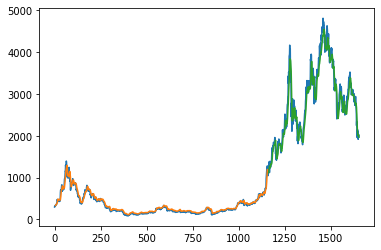

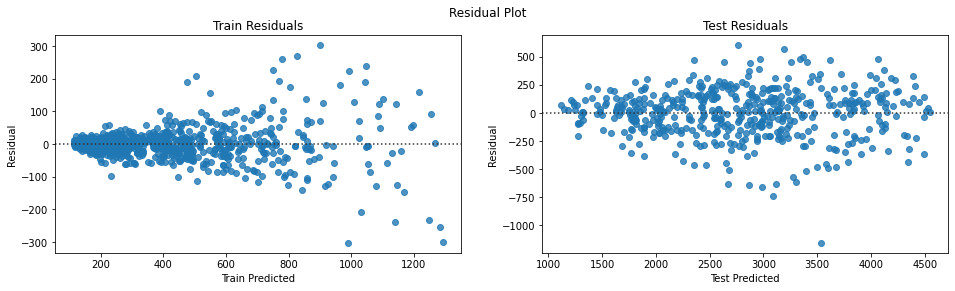

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -2.274765
1  0.130904       -2.432984      -0.881676
2  0.133590        1.470001      -1.709334
3  0.143049       15.217988      -1.411697
4  0.137239        6.773986      -1.448991
5  0.141072       12.344025      -2.046280
6  0.128224       -6.329010      -1.155425
7  0.146512       20.251007      -0.986043
8  0.152885       29.513977      -0.471160
9  0.177126       64.745026       0.004089

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -6.732200
1  0.130263      -3.365357      4.660859
2  0.151229      27.107300      7.438309
3  0.215155     120.016357      3.622886
4  0.136004       4.978150      3.647358
5 -0.046796    -260.703125      8.396908
6  0.211663     114.941284     -3.003276
7  0.128779      -5.521606     -3.689923
8  0.243091     160.618774     -5.597939
9  0.086346     -67.194580     -5.835000

RMSE Train = 25.470094176554163
RMSE Test = 143.20952061215107
MAPE Train = 4.428112909816262
MAPE Test = 1.1529418512710417
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


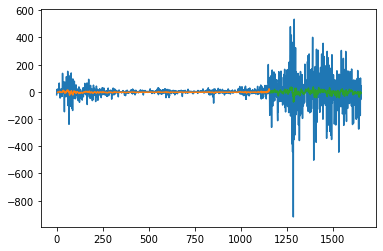

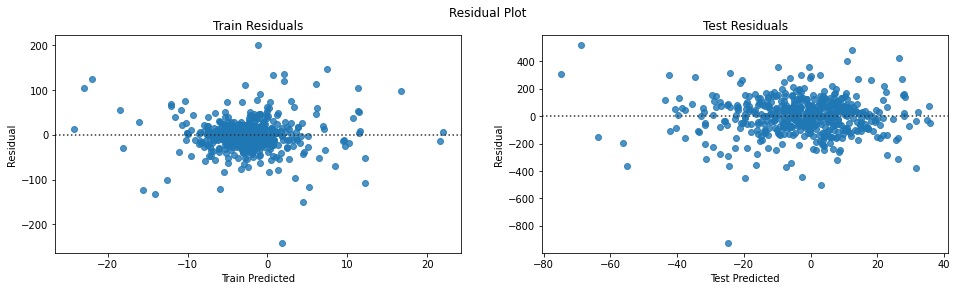

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659      -0.001430
1 -0.007298       -0.007298       0.000489
2  0.004442        0.004442      -0.000812
3  0.045783        0.045783      -0.000412
4  0.019487        0.019487      -0.000455
5  0.034832        0.034832      -0.001330
6 -0.017258       -0.017258      -0.000137
7  0.056190        0.056190       0.000025
8  0.077535        0.077535       0.000712
9  0.157851        0.157851       0.001264

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655     -0.003310
1 -0.002728      -0.002728      0.000864
2  0.022035       0.022035      0.001935
3  0.095457       0.095457      0.000207
4  0.003614       0.003614      0.000178
5 -0.188605      -0.188605      0.001866
6  0.102482       0.102482     -0.002408
7 -0.004465      -0.004465     -0.002179
8  0.130479       0.130479     -0.002675
9 -0.048286      -0.048286     -0.002420

RMSE Train = 0.05102672110365057
RMSE Test = 0.051075853103031726
MAPE Train = 1.5797238990355817
MAPE Test = 1.0547352114243491
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


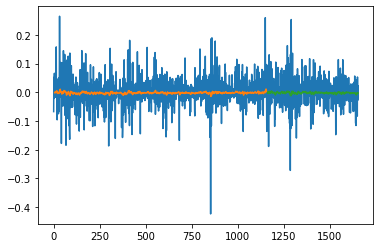

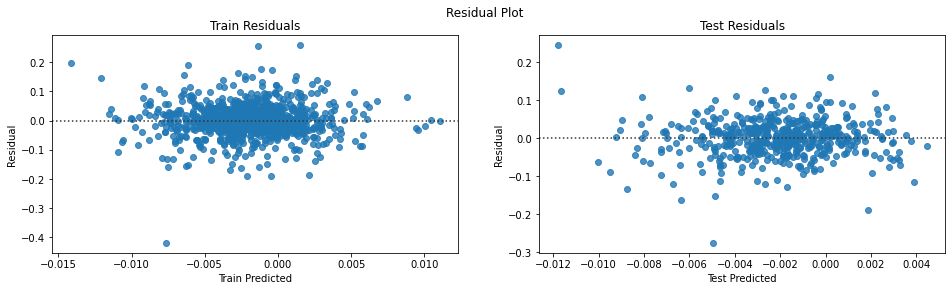

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     311.350769
1  0.052163      330.924011     318.723724
2  0.052474      332.394012     325.749603
3  0.055693      347.612000     329.206238
4  0.057126      354.385986     331.898499
5  0.059737      366.730011     335.215942
6  0.058398      360.401001     343.117371
7  0.062681      380.652008     350.574280
8  0.068924      410.165985     358.816833
9  0.082619      474.911011     367.147430

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1118.428345
1  0.242368    1230.172241   1158.287476
2  0.248102    1257.279541   1183.230591
3  0.273487    1377.295898   1208.439941
4  0.274540    1382.274048   1233.204102
5  0.219397    1121.570923   1275.704834
6  0.243709    1236.512207   1295.187622
7  0.242541    1230.990601   1282.161743
8  0.276515    1391.609375   1229.986328
9  0.262302    1324.414795   1234.367432

RMSE Train = 42.739396700683955
RMSE Test = 208.56378504670158
MAPE Train = 0.05969399327832363
MAPE Test = 0.05839860025993973
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


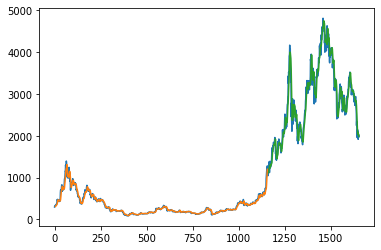

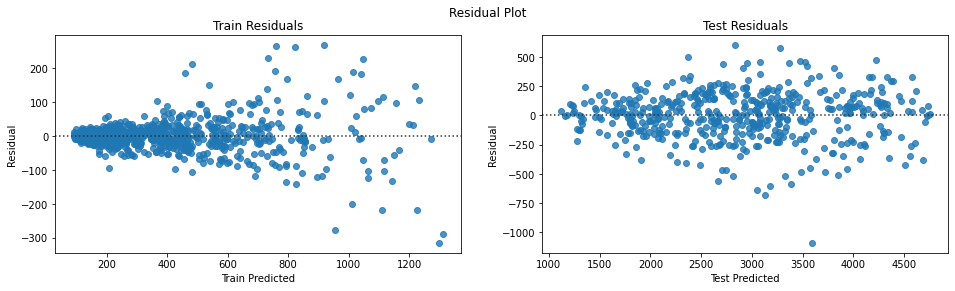

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017       0.271060
1  0.130904       -2.432984       0.990085
2  0.133590        1.470001       0.488067
3  0.143049       15.217988      -0.522597
4  0.137239        6.773986       0.152789
5  0.141072       12.344025       0.338349
6  0.128224       -6.329010       1.477917
7  0.146512       20.251007       0.549097
8  0.152885       29.513977       1.455285
9  0.177126       64.745026       2.158089

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003      3.667695
1  0.130263      -3.365357      9.064887
2  0.151229      27.107300      3.943436
3  0.215155     120.016357      6.191213
4  0.136004       4.978150      8.807294
5 -0.046796    -260.703125     10.852400
6  0.211663     114.941284     -5.383899
7  0.128779      -5.521606     -6.004707
8  0.243091     160.618774    -13.091749
9  0.086346     -67.194580      9.445168

RMSE Train = 25.249614759225626
RMSE Test = 143.33674073160105
MAPE Train = 2.509312649966165
MAPE Test = 1.2139098743888252
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


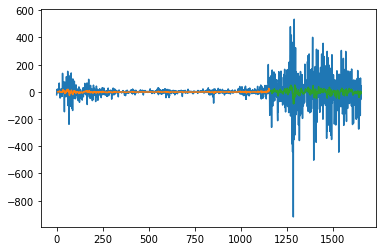

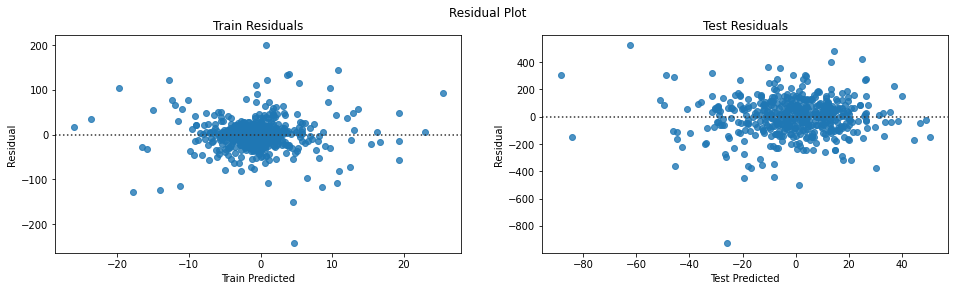

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659      -0.005554
1 -0.007298       -0.007298       0.002387
2  0.004442        0.004442      -0.002484
3  0.045783        0.045783      -0.003273
4  0.019487        0.019487      -0.001352
5  0.034832        0.034832      -0.001566
6 -0.017258       -0.017258      -0.001538
7  0.056190        0.056190      -0.001038
8  0.077535        0.077535      -0.001987
9  0.157851        0.157851      -0.001581

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655     -0.001091
1 -0.002728      -0.002728     -0.004792
2  0.022035       0.022035      0.000246
3  0.095457       0.095457      0.000855
4  0.003614       0.003614     -0.004674
5 -0.188605      -0.188605      0.003161
6  0.102482       0.102482      0.001549
7 -0.004465      -0.004465     -0.011569
8  0.130479       0.130479     -0.000779
9 -0.048286      -0.048286      0.000127

RMSE Train = 0.05103072816748948
RMSE Test = 0.05113514620011341
MAPE Train = 1.8273861579276605
MAPE Test = 1.0857103543946585
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


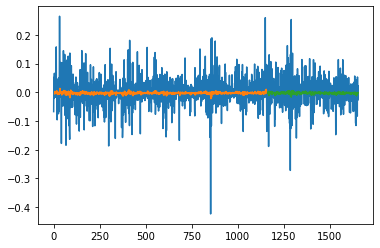

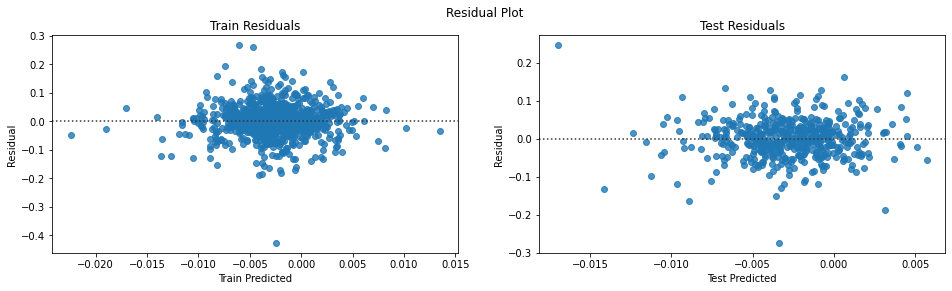

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.289670   
1           LSTM       3.0             Change in Close Price   25.203482   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
3   Stacked LSTM       3.0                             Close   36.949302   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
6       CNN-LSTM       3.0                             Close   29.933918   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
9           LSTM       5.0                             Close   44.301275   
10          LSTM       5.0             Change in Close Price   25.316185   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
12  Stacked LSTM       5.0                             Close   47.682356   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
15      CNN-LSTM       5.0                             Close   42.739397   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   

     rmse_test  mape_train  mape_test  
0   188.530993    0.074035   0.051573  
1   142.874938    2.037173   1.225099  
2     0.050861    1.657025   1.148650  
3   186.660775    0.058912   0.051567  
4   142.566567    2.620456   1.161504  
5     0.051149    2.416910   1.343368  
6   191.662306    0.041398   0.050025  
7   144.017261    2.325257   1.245834  
8     0.051329    2.014344   1.091829  
9   231.967346    0.061199   0.063723  
10  143.699243    1.941201   1.226957  
11    0.050827    1.436698   1.023784  
12  225.785736    0.119394   0.063883  
13  143.209521    4.428113   1.152942  
14    0.051076    1.579724   1.054735  
15  208.563785    0.059694   0.058399  
16  143.336741    2.509313   1.213910  
17    0.051135    1.827386   1.085710

################################################################
################## Executing for interval  10  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Percentage Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) 

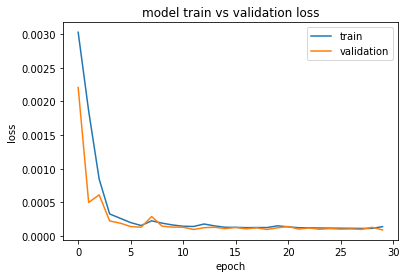

(LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_461"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_614 (LSTM)             (None, 100)               40800     
                                                                 
 dense_640 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


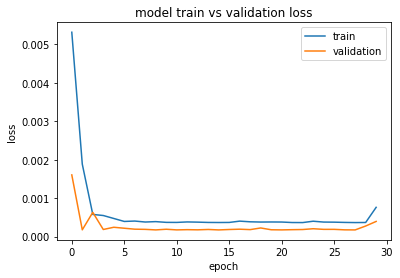

(LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_462"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_615 (LSTM)             (None, 100)               40800     
                                                                 
 dense_641 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


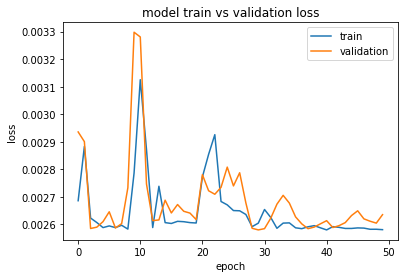

(Stacked LSTM) Fit Model for Close. Interval =  10
Model Summary
Model: "sequential_463"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_616 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_617 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_294 (Dropout)       (None, 100)               0         
                                                                 
 dense_642 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


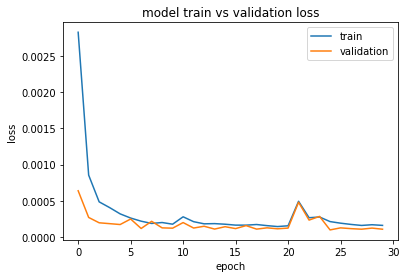

(Stacked LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_464"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_618 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_619 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_295 (Dropout)       (None, 100)               0         
                                                                 
 dense_643 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


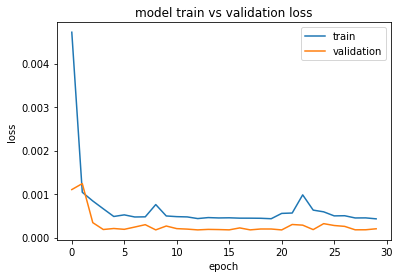

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_465"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_620 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_621 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_296 (Dropout)       (None, 100)               0         
                                                                 
 dense_644 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


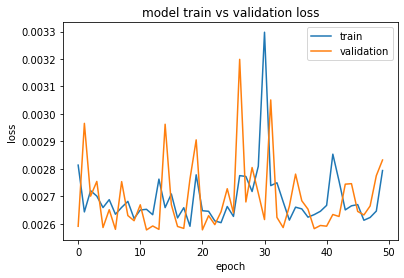

(CNN-LSTM) Fit Model for Close. Interval =  10
Model Summary
Model: "sequential_466"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_153 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_622 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_297 (Dropout)       (None, 100)               0         
                                                                 
 dense_645 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


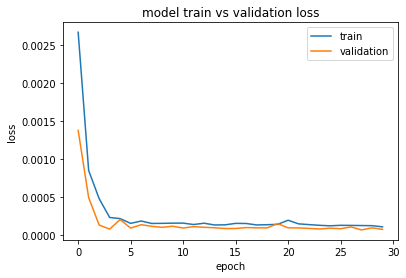

(CNN-LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_467"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_154 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_623 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_298 (Dropout)       (None, 100)               0         
                                                                 
 dense_646 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


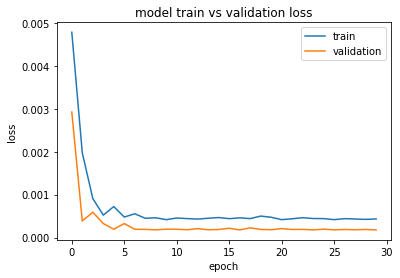

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_468"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_155 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_624 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_299 (Dropout)       (None, 100)               0         
                                                                 
 dense_647 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


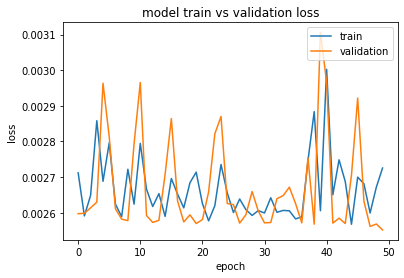

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     340.803558
1  0.058398      360.401001     347.046173
2  0.062681      380.652008     352.715576
3  0.068924      410.165985     359.370026
4  0.082619      474.911011     368.824127
5  0.080792      466.276001     385.408691
6  0.081861      471.329987     404.443451
7  0.083770      480.355011     423.134094
8  0.082194      472.902008     440.351349
9  0.072595      427.523010     454.067291

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1253.041992
1  0.243709    1236.512207   1261.323120
2  0.242541    1230.990601   1261.497925
3  0.276515    1391.609375   1256.477905
4  0.262302    1324.414795   1265.724487
5  0.269207    1357.058105   1277.571045
6  0.247236    1253.187134   1292.202393
7  0.264011    1332.492188   1296.918701
8  0.274593    1382.522827   1302.366943
9  0.273238    1376.115479   1313.177490

RMSE Train = 48.84408371121043
RMSE Test = 231.78415604065415
MAPE Train = 0.08016529508036253
MAPE Test = 0.06493692128674594
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


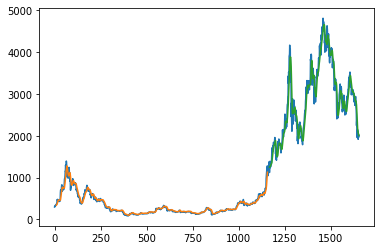

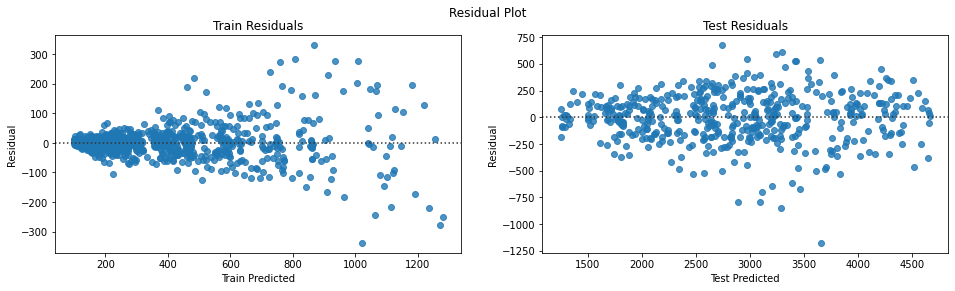

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025     -17.671820
1  0.128224       -6.329010     -16.909565
2  0.146512       20.251007     -17.449863
3  0.152885       29.513977     -16.777229
4  0.177126       64.745026     -15.471700
5  0.126637       -8.635010     -12.296803
6  0.136056        5.053986     -12.008999
7  0.138788        9.025024     -12.427691
8  0.127450       -7.453003     -12.993414
9  0.101356      -45.378998     -14.496522

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     -6.999842
1  0.211663     114.941284    -18.959719
2  0.128779      -5.521606    -18.985176
3  0.243091     160.618774    -20.660147
4  0.086346     -67.194580    -13.643763
5  0.155038      32.643310    -13.762803
6  0.061111    -103.870971    -13.486379
7  0.187144      79.305054    -18.841675
8  0.167002      50.030639    -17.551783
9  0.128170      -6.407348    -15.769814

RMSE Train = 32.3556630370999
RMSE Test = 145.19065496035168
MAPE Train = 26.415328835961084
MAPE Test = 1.3030230533181884
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


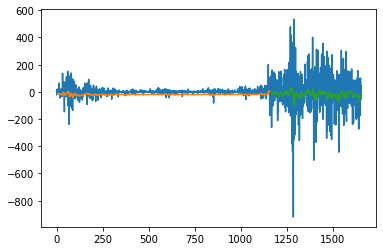

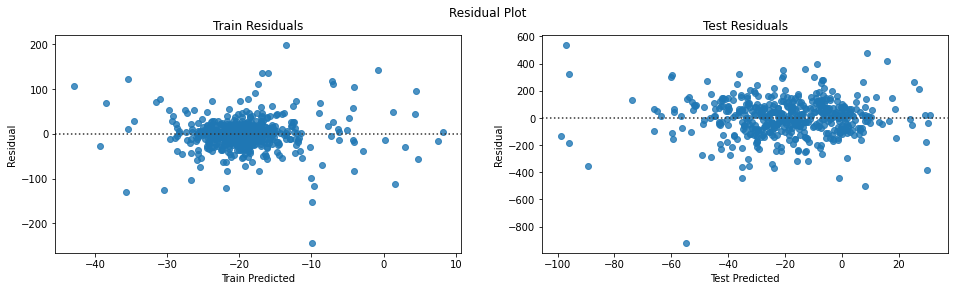

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.000865
1 -0.017258       -0.017258       0.001572
2  0.056190        0.056190       0.001777
3  0.077535        0.077535       0.001449
4  0.157851        0.157851       0.002442
5 -0.018182       -0.018182       0.004835
6  0.010839        0.010839       0.007975
7  0.019148        0.019148       0.007562
8 -0.015516       -0.015516       0.006376
9 -0.095959       -0.095959       0.004925

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.003397
1  0.102482       0.102482      0.002849
2 -0.004465      -0.004465     -0.001807
3  0.130479       0.130479     -0.001631
4 -0.048286      -0.048286     -0.000918
5  0.024647       0.024647      0.001821
6 -0.076541      -0.076541      0.001344
7  0.063283       0.063283      0.000918
8  0.037547       0.037547     -0.000979
9 -0.004635      -0.004635     -0.000409

RMSE Train = 0.050993756070390195
RMSE Test = 0.05087979163032794
MAPE Train = 1.4142695048854734
MAPE Test = 1.0662099007435266
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


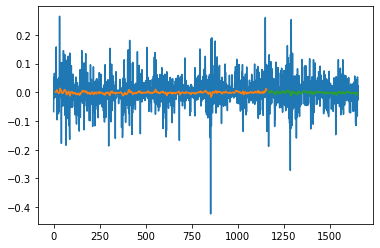

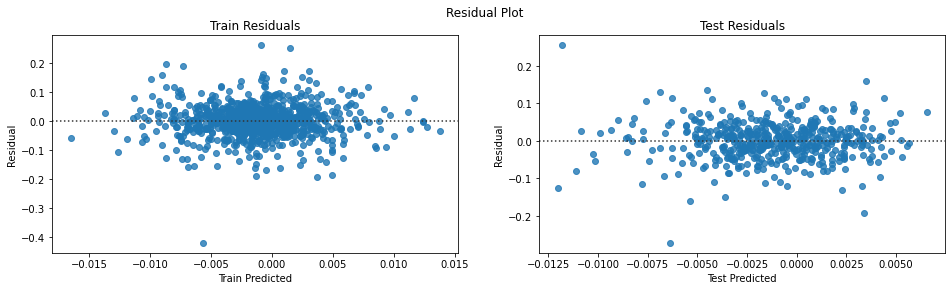

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     328.208984
1  0.058398      360.401001     334.452911
2  0.062681      380.652008     339.936249
3  0.068924      410.165985     346.592133
4  0.082619      474.911011     355.887085
5  0.080792      466.276001     371.844513
6  0.081861      471.329987     389.830811
7  0.083770      480.355011     407.679260
8  0.082194      472.902008     424.448822
9  0.072595      427.523010     438.045929

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1229.732422
1  0.243709    1236.512207   1238.123413
2  0.242541    1230.990601   1241.201782
3  0.276515    1391.609375   1238.657104
4  0.262302    1324.414795   1248.862915
5  0.269207    1357.058105   1260.901489
6  0.247236    1253.187134   1274.731689
7  0.264011    1332.492188   1278.970703
8  0.274593    1382.522827   1284.364990
9  0.273238    1376.115479   1293.791382

RMSE Train = 50.60560552261465
RMSE Test = 241.80741723396173
MAPE Train = 0.06941363945148105
MAPE Test = 0.06830329325570798
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


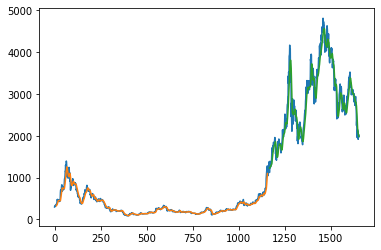

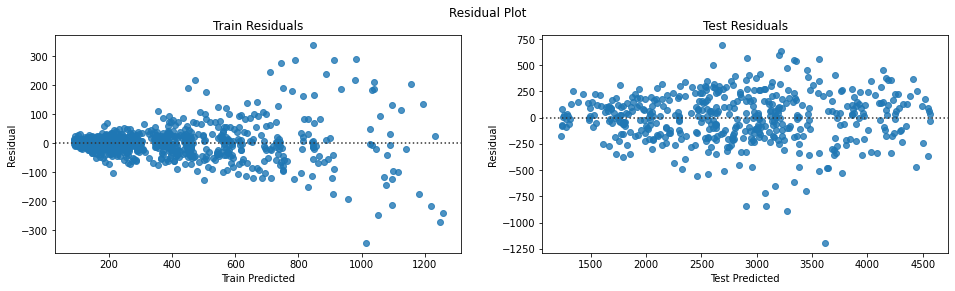

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -3.746428
1  0.128224       -6.329010      -3.142078
2  0.146512       20.251007      -3.454659
3  0.152885       29.513977      -3.024609
4  0.177126       64.745026      -2.271213
5  0.126637       -8.635010      -0.432004
6  0.136056        5.053986       0.138625
7  0.138788        9.025024       0.141614
8  0.127450       -7.453003      -0.071582
9  0.101356      -45.378998      -0.947558

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125      3.048315
1  0.211663     114.941284     -2.298697
2  0.128779      -5.521606     -3.037256
3  0.243091     160.618774     -4.903040
4  0.086346     -67.194580     -1.702512
5  0.155038      32.643310     -1.015215
6  0.061111    -103.870971     -1.027690
7  0.187144      79.305054     -3.798947
8  0.167002      50.030639     -3.511337
9  0.128170      -6.407348     -3.049038

RMSE Train = 25.870787685690786
RMSE Test = 143.16101974182368
MAPE Train = 7.222384491300604
MAPE Test = 1.165718380929297
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


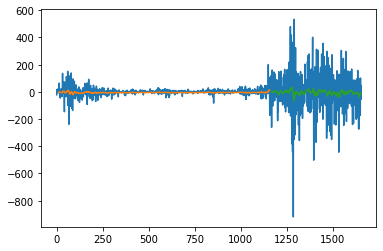

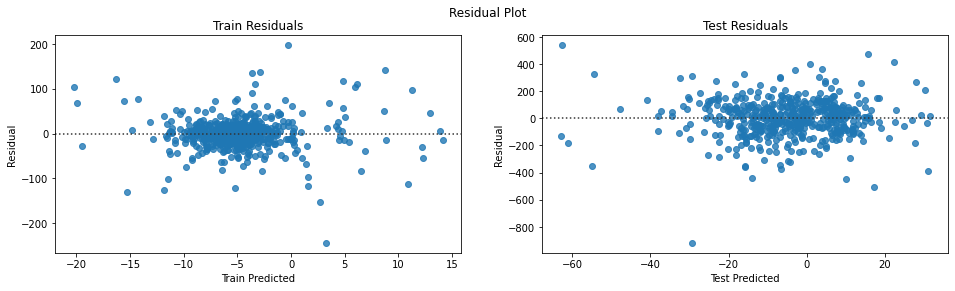

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832      -0.007479
1 -0.017258       -0.017258      -0.006801
2  0.056190        0.056190      -0.007168
3  0.077535        0.077535      -0.006700
4  0.157851        0.157851      -0.005968
5 -0.018182       -0.018182      -0.004196
6  0.010839        0.010839      -0.003400
7  0.019148        0.019148      -0.003165
8 -0.015516       -0.015516      -0.003279
9 -0.095959       -0.095959      -0.004126

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605     -0.006204
1  0.102482       0.102482     -0.007531
2 -0.004465      -0.004465     -0.007709
3  0.130479       0.130479     -0.008541
4 -0.048286      -0.048286     -0.007753
5  0.024647       0.024647     -0.007559
6 -0.076541      -0.076541     -0.007567
7  0.063283       0.063283     -0.008313
8  0.037547       0.037547     -0.008243
9 -0.004635      -0.004635     -0.008166

RMSE Train = 0.052213679069014175
RMSE Test = 0.052001780030532144
MAPE Train = 3.0543818972580894
MAPE Test = 1.4054378614658278
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


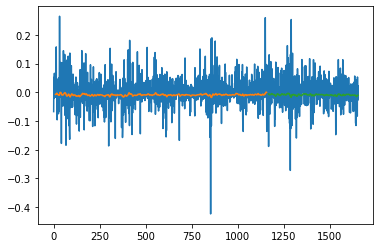

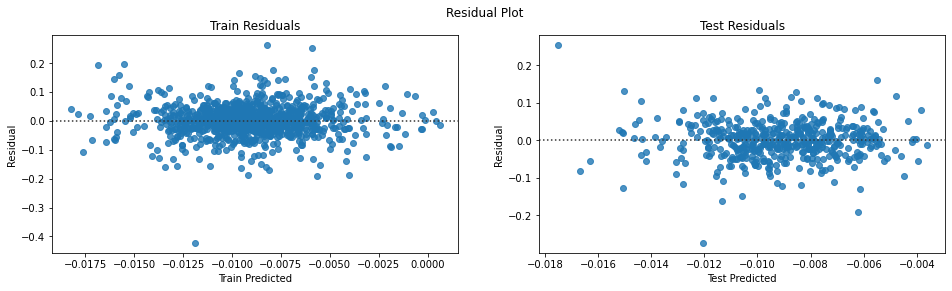

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     342.621002
1  0.058398      360.401001     349.654449
2  0.062681      380.652008     355.968018
3  0.068924      410.165985     362.024384
4  0.082619      474.911011     373.392548
5  0.080792      466.276001     394.812592
6  0.081861      471.329987     419.907043
7  0.083770      480.355011     437.889679
8  0.082194      472.902008     453.029694
9  0.072595      427.523010     463.982849

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1275.491577
1  0.243709    1236.512207   1274.177612
2  0.242541    1230.990601   1245.291748
3  0.276515    1391.609375   1239.888306
4  0.262302    1324.414795   1254.102905
5  0.269207    1357.058105   1281.237305
6  0.247236    1253.187134   1295.646606
7  0.264011    1332.492188   1297.908203
8  0.274593    1382.522827   1293.055298
9  0.273238    1376.115479   1310.078979

RMSE Train = 43.03938418286016
RMSE Test = 217.10793813991208
MAPE Train = 0.0672854705252827
MAPE Test = 0.06107799081015045
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


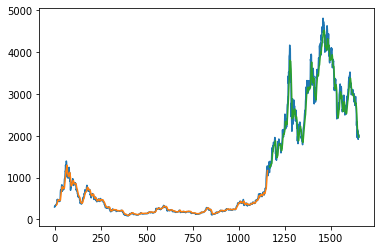

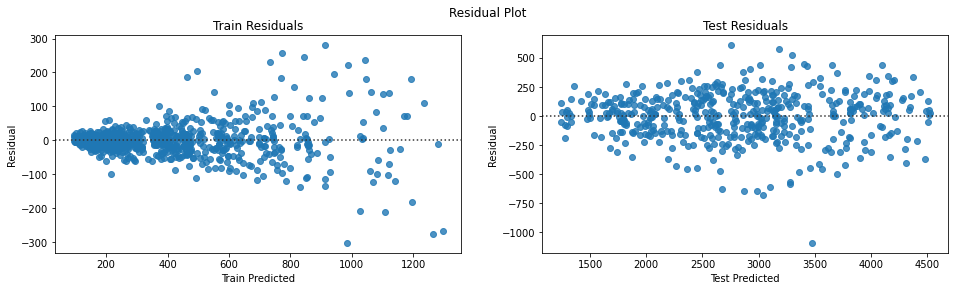

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       3.470937
1  0.128224       -6.329010       4.487253
2  0.146512       20.251007       3.951038
3  0.152885       29.513977       4.871996
4  0.177126       64.745026       5.488474
5  0.126637       -8.635010       8.485964
6  0.136056        5.053986       8.510415
7  0.138788        9.025024      10.344339
8  0.127450       -7.453003       9.601947
9  0.101356      -45.378998       8.080342

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     14.073372
1  0.211663     114.941284      6.154352
2  0.128779      -5.521606     10.327188
3  0.243091     160.618774     -1.723542
4  0.086346     -67.194580      6.846889
5  0.155038      32.643310      3.231320
6  0.061111    -103.870971      9.703736
7  0.187144      79.305054      1.647148
8  0.167002      50.030639      5.582467
9  0.128170      -6.407348      4.974977

RMSE Train = 25.35139415894168
RMSE Test = 144.0166924840785
MAPE Train = 3.270278995644753
MAPE Test = 1.3486975758184867
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


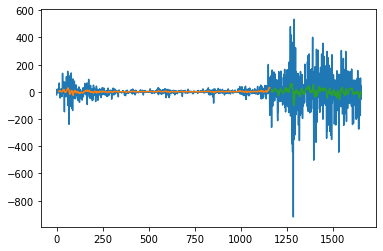

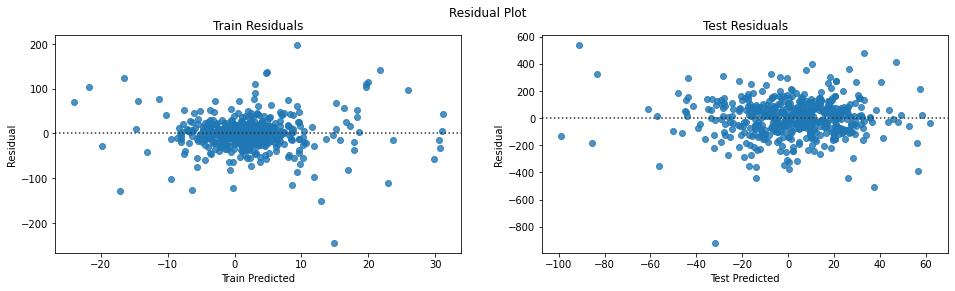

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.007196
1 -0.017258       -0.017258       0.005980
2  0.056190        0.056190       0.007767
3  0.077535        0.077535       0.004656
4  0.157851        0.157851       0.006869
5 -0.018182       -0.018182       0.005524
6  0.010839        0.010839       0.011861
7  0.019148        0.019148       0.006056
8 -0.015516       -0.015516       0.007960
9 -0.095959       -0.095959       0.008346

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.009407
1  0.102482       0.102482      0.010237
2 -0.004465      -0.004465     -0.001272
3  0.130479       0.130479      0.010481
4 -0.048286      -0.048286      0.002104
5  0.024647       0.024647      0.010847
6 -0.076541      -0.076541      0.003760
7  0.063283       0.063283      0.009423
8  0.037547       0.037547      0.003048
9 -0.004635      -0.004635      0.008120

RMSE Train = 0.05099489663331794
RMSE Test = 0.05079605674709335
MAPE Train = 2.0970484683207893
MAPE Test = 1.2424212419466674
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


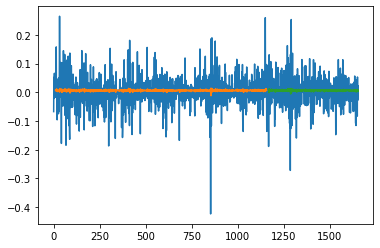

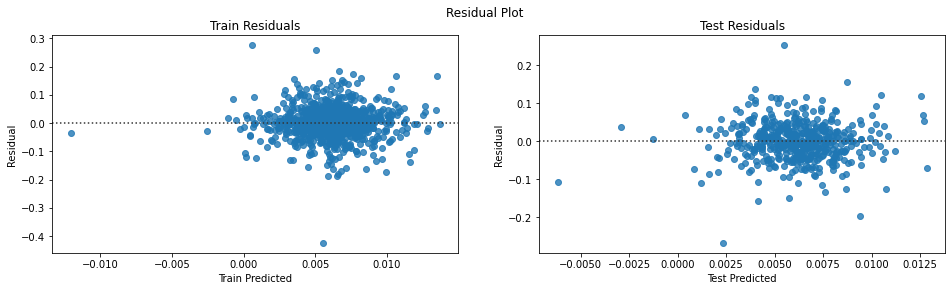

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.289670   
1           LSTM       3.0             Change in Close Price   25.203482   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
3   Stacked LSTM       3.0                             Close   36.949302   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
6       CNN-LSTM       3.0                             Close   29.933918   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
9           LSTM       5.0                             Close   44.301275   
10          LSTM       5.0             Change in Close Price   25.316185   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
12  Stacked LSTM       5.0                             Close   47.682356   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
15      CNN-LSTM       5.0                             Close   42.739397   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
18          LSTM      10.0                             Close   48.844084   
19          LSTM      10.0             Change in Close Price   32.355663   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
21  Stacked LSTM      10.0                             Close   50.605606   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   
24      CNN-LSTM      10.0                             Close   43.039384   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   

     rmse_test  mape_train  mape_test  
0   188.530993    0.074035   0.051573  
1   142.874938    2.037173   1.225099  
2     0.050861    1.657025   1.148650  
3   186.660775    0.058912   0.051567  
4   142.566567    2.620456   1.161504  
5     0.051149    2.416910   1.343368  
6   191.662306    0.041398   0.050025  
7   144.017261    2.325257   1.245834  
8     0.051329    2.014344   1.091829  
9   231.967346    0.061199   0.063723  
10  143.699243    1.941201   1.226957  
11    0.050827    1.436698   1.023784  
12  225.785736    0.119394   0.063883  
13  143.209521    4.428113   1.152942  
14    0.051076    1.579724   1.054735  
15  208.563785    0.059694   0.058399  
16  143.336741    2.509313   1.213910  
17    0.051135    1.827386   1.085710  
18  231.784156    0.080165   0.064937  
19  145.190655   26.415329   1.303023  
20    0.050880    1.414270   1.066210  
21  241.807417    0.069414   0.068303  
22  143.161020    7.222384   1.165718  
23    0.052002    3.054382   1.405438  
24  217.107938    0.067285   0.061078  
25  144.016692    3.270279   1.348698  
26    0.050796    2.097048   1.242421

################################################################
################## Executing for interval  20  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Percentage Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) 

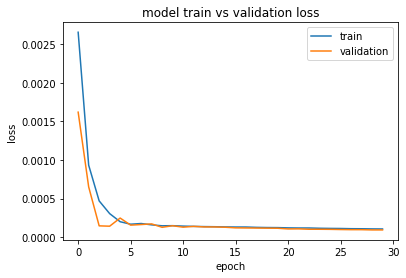

(LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_470"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_626 (LSTM)             (None, 100)               40800     
                                                                 
 dense_649 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


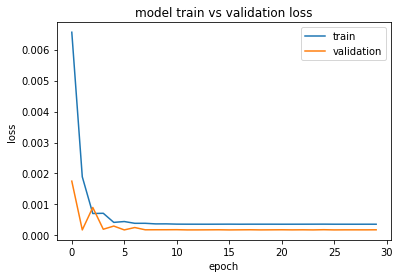

(LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_471"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_627 (LSTM)             (None, 100)               40800     
                                                                 
 dense_650 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


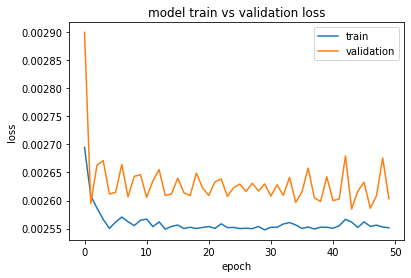

(Stacked LSTM) Fit Model for Close. Interval =  20
Model Summary
Model: "sequential_472"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_628 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_629 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_300 (Dropout)       (None, 100)               0         
                                                                 
 dense_651 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


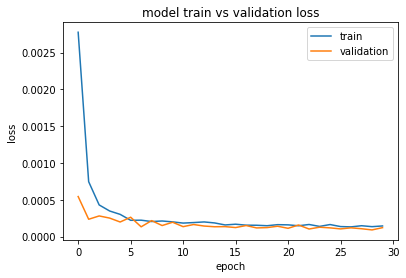

(Stacked LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_473"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_630 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_631 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_301 (Dropout)       (None, 100)               0         
                                                                 
 dense_652 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


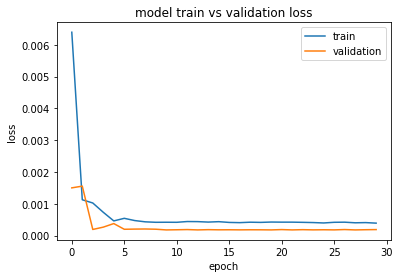

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_474"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_632 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_633 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_302 (Dropout)       (None, 100)               0         
                                                                 
 dense_653 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


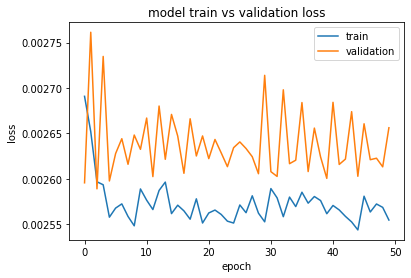

(CNN-LSTM) Fit Model for Close. Interval =  20
Model Summary
Model: "sequential_475"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_156 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_634 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_303 (Dropout)       (None, 100)               0         
                                                                 
 dense_654 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


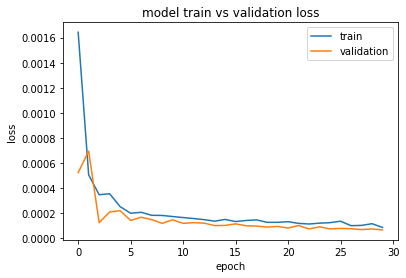

(CNN-LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_476"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_157 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_635 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_304 (Dropout)       (None, 100)               0         
                                                                 
 dense_655 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


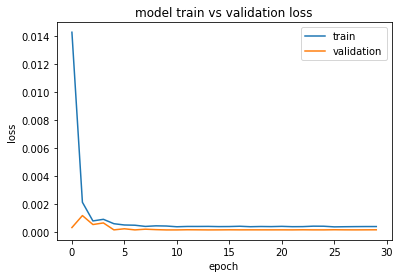

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_477"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_158 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_636 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_305 (Dropout)       (None, 100)               0         
                                                                 
 dense_656 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


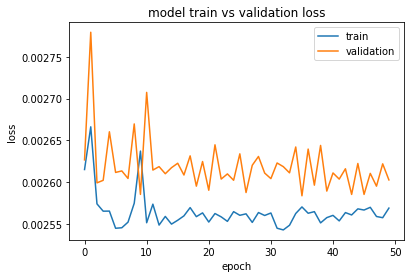

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     454.733612
1  0.080848      466.540009     457.099976
2  0.080194      463.449005     459.384521
3  0.080703      465.852997     460.535736
4  0.081623      470.204010     461.248138
5  0.080159      463.281006     462.089050
6  0.072821      428.588013     461.951263
7  0.074052      434.407990     457.279053
8  0.078625      456.031006     451.681885
9  0.082321      473.502014     448.472229

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1312.921997
1  0.271741    1369.040527   1316.384155
2  0.302655    1515.193726   1322.734375
3  0.333476    1660.909546   1347.075439
4  0.319485    1594.762695   1394.460327
5  0.345689    1718.650879   1439.250122
6  0.337059    1677.846802   1495.875000
7  0.323602    1614.227783   1545.395386
8  0.351605    1746.616821   1579.031982
9  0.356135    1768.035034   1617.917725

RMSE Train = 47.65394212066258
RMSE Test = 235.42411012756918
MAPE Train = 0.06478956004213723
MAPE Test = 0.06634899683620976
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


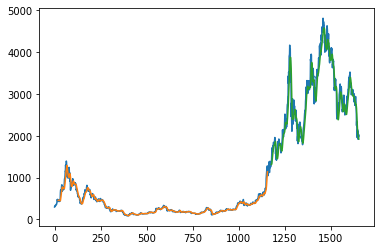

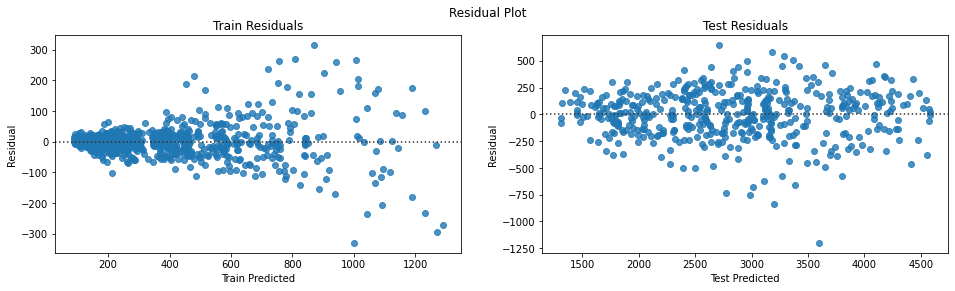

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       1.689012
1  0.145944       19.425995       0.980945
2  0.130452       -3.091004       1.092892
3  0.134233        2.403992       0.839761
4  0.135572        4.351013       0.643372
5  0.127815       -6.923004       0.557847
6  0.108708      -34.692993       0.151381
7  0.136583        5.819977      -1.341332
8  0.147456       21.623016      -1.816149
9  0.144599       17.471008      -1.245607

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      3.877143
1  0.169770      54.054321      1.550902
2  0.233138     146.153199      2.106588
3  0.232837     145.715820      7.112561
4  0.087067     -66.146851     13.859419
5  0.217819     123.888184     13.601025
6  0.104504     -40.804077     16.684278
7  0.088806     -63.619019     15.260868
8  0.223668     132.389038     11.037375
9  0.147315      21.418213     12.568899

RMSE Train = 25.25311483367527
RMSE Test = 143.93855477400015
MAPE Train = 2.2468481368608404
MAPE Test = 1.2268828450423344
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


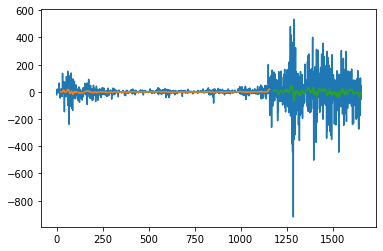

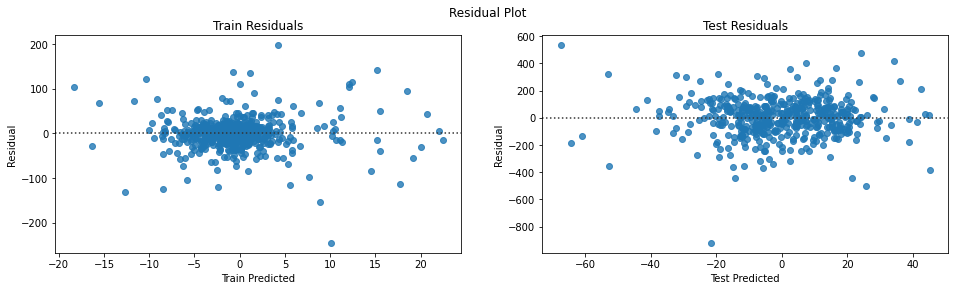

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824       0.004345
1  0.043448        0.043448      -0.001797
2 -0.006625       -0.006625      -0.001708
3  0.005187        0.005187       0.001192
4  0.009340        0.009340       0.001852
5 -0.014723       -0.014723       0.002065
6 -0.074885       -0.074885       0.002769
7  0.013579        0.013579       0.002964
8  0.049776        0.049776      -0.000850
9  0.038311        0.038311      -0.001420

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422      0.002955
1  0.041106       0.041106      0.003825
2  0.106756       0.106756      0.001037
3  0.096170       0.096170      0.000803
4 -0.039826      -0.039826      0.004550
5  0.077684       0.077684      0.009721
6 -0.023742      -0.023742      0.006714
7 -0.037917      -0.037917      0.007916
8  0.082014       0.082014      0.005800
9  0.012263       0.012263      0.001050

RMSE Train = 0.0506512888549884
RMSE Test = 0.04963621410906823
MAPE Train = 1.4346907457179694
MAPE Test = 1.0994934488338148
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


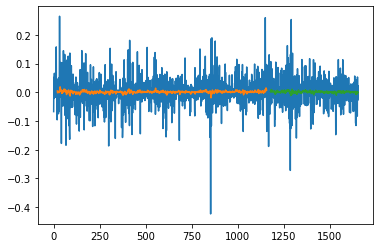

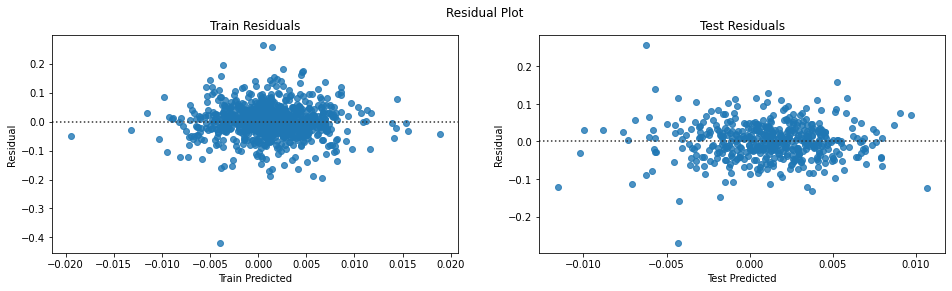

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     445.355042
1  0.080848      466.540009     448.353180
2  0.080194      463.449005     450.375916
3  0.080703      465.852997     451.262482
4  0.081623      470.204010     451.622955
5  0.080159      463.281006     452.063995
6  0.072821      428.588013     451.772095
7  0.074052      434.407990     447.726532
8  0.078625      456.031006     442.123962
9  0.082321      473.502014     438.138824

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1285.239136
1  0.271741    1369.040527   1290.147217
2  0.302655    1515.193726   1295.725464
3  0.333476    1660.909546   1315.598389
4  0.319485    1594.762695   1356.840332
5  0.345689    1718.650879   1401.172974
6  0.337059    1677.846802   1455.163696
7  0.323602    1614.227783   1505.830444
8  0.351605    1746.616821   1543.142334
9  0.356135    1768.035034   1580.922485

RMSE Train = 51.86510119557615
RMSE Test = 292.82669896724707
MAPE Train = 0.08323278291074712
MAPE Test = 0.08136917152073754
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


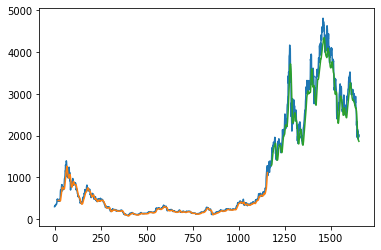

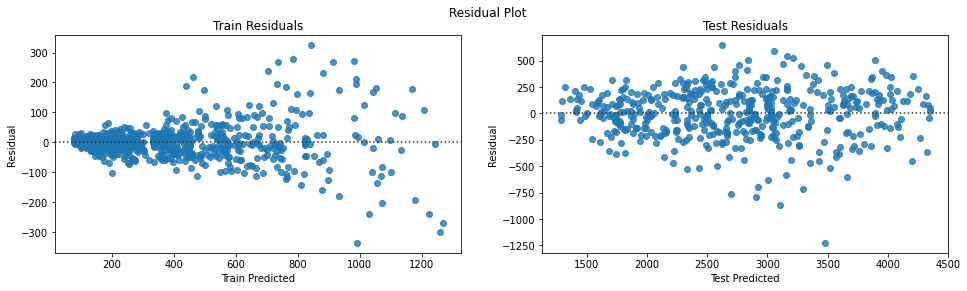

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       0.841428
1  0.145944       19.425995       0.049830
2  0.130452       -3.091004      -0.188596
3  0.134233        2.403992      -0.522683
4  0.135572        4.351013      -0.803753
5  0.127815       -6.923004      -0.991457
6  0.108708      -34.692993      -1.339470
7  0.136583        5.819977      -2.420758
8  0.147456       21.623016      -2.993834
9  0.144599       17.471008      -2.853299

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      1.691134
1  0.169770      54.054321      0.405184
2  0.233138     146.153199      0.540737
3  0.232837     145.715820      3.668951
4  0.087067     -66.146851      8.620023
5  0.217819     123.888184      9.728534
6  0.104504     -40.804077     12.428082
7  0.088806     -63.619019     12.375586
8  0.223668     132.389038      9.986170
9  0.147315      21.418213     10.640483

RMSE Train = 25.423239342803136
RMSE Test = 143.84007209365652
MAPE Train = 4.338296433665656
MAPE Test = 1.1899905796049493
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


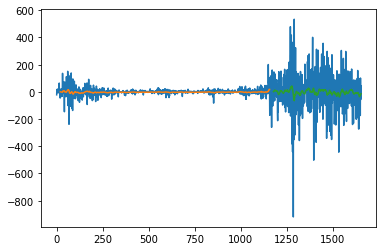

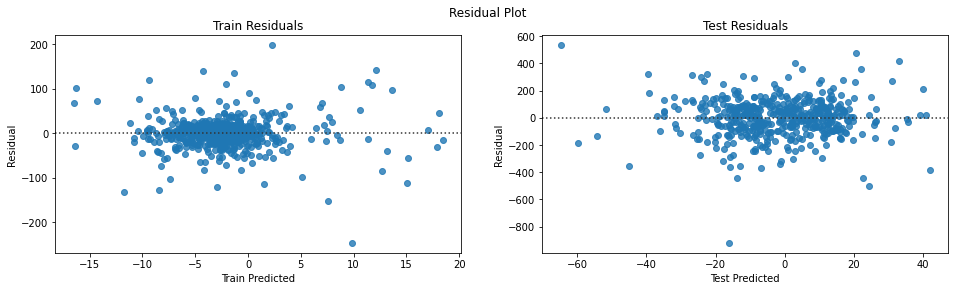

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824       0.000160
1  0.043448        0.043448      -0.000689
2 -0.006625       -0.006625      -0.000365
3  0.005187        0.005187      -0.000239
4  0.009340        0.009340      -0.000206
5 -0.014723       -0.014723      -0.000170
6 -0.074885       -0.074885      -0.000453
7  0.013579        0.013579      -0.002241
8  0.049776        0.049776      -0.002778
9  0.038311        0.038311      -0.001884

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422      0.000257
1  0.041106       0.041106     -0.000580
2  0.106756       0.106756     -0.000361
3  0.096170       0.096170      0.001649
4 -0.039826      -0.039826      0.004274
5  0.077684       0.077684      0.004226
6 -0.023742      -0.023742      0.004888
7 -0.037917      -0.037917      0.003980
8  0.082014       0.082014      0.001950
9  0.012263       0.012263      0.002009

RMSE Train = 0.050863404116995935
RMSE Test = 0.049890495148461576
MAPE Train = 1.5004368093933607
MAPE Test = 1.0634476968832371
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


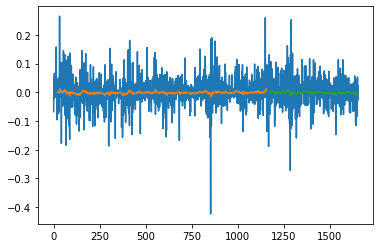

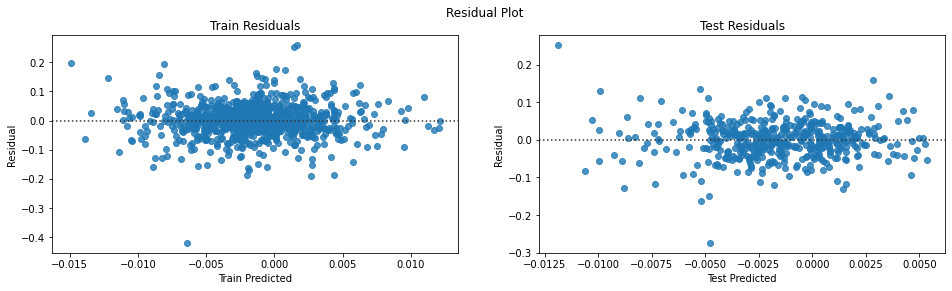

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     462.290131
1  0.080848      466.540009     464.315399
2  0.080194      463.449005     464.292633
3  0.080703      465.852997     463.151489
4  0.081623      470.204010     464.060028
5  0.080159      463.281006     465.223236
6  0.072821      428.588013     464.339111
7  0.074052      434.407990     456.037323
8  0.078625      456.031006     451.540009
9  0.082321      473.502014     449.678131

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1316.790161
1  0.271741    1369.040527   1314.725586
2  0.302655    1515.193726   1327.900757
3  0.333476    1660.909546   1364.876587
4  0.319485    1594.762695   1426.632446
5  0.345689    1718.650879   1465.560669
6  0.337059    1677.846802   1541.899048
7  0.323602    1614.227783   1579.436401
8  0.351605    1746.616821   1603.013672
9  0.356135    1768.035034   1649.040649

RMSE Train = 41.29997559932561
RMSE Test = 223.16835698654393
MAPE Train = 0.05895577836842557
MAPE Test = 0.06252149328029016
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


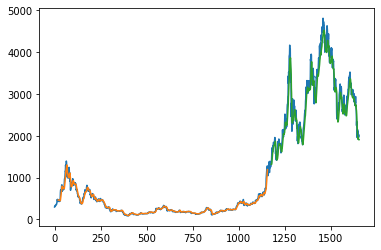

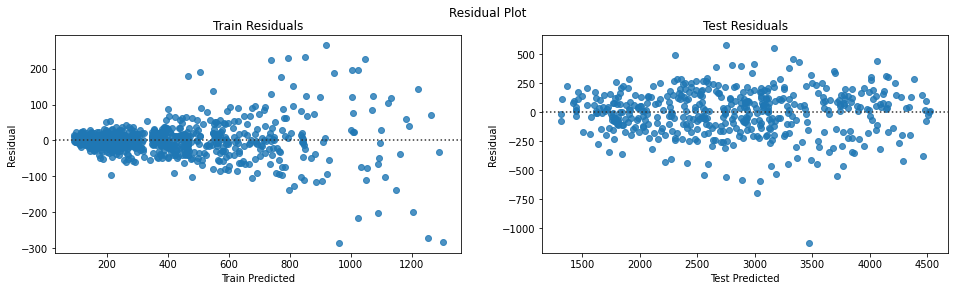

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       1.423189
1  0.145944       19.425995       1.492731
2  0.130452       -3.091004       0.501971
3  0.134233        2.403992      -0.563681
4  0.135572        4.351013      -0.734947
5  0.127815       -6.923004      -0.857355
6  0.108708      -34.692993      -1.286301
7  0.136583        5.819977      -2.358904
8  0.147456       21.623016      -2.213691
9  0.144599       17.471008      -2.310283

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      0.917208
1  0.169770      54.054321     -0.067618
2  0.233138     146.153199      2.032801
3  0.232837     145.715820      4.716648
4  0.087067     -66.146851      7.770295
5  0.217819     123.888184      6.848471
6  0.104504     -40.804077     13.778724
7  0.088806     -63.619019     12.190697
8  0.223668     132.389038     11.073804
9  0.147315      21.418213     13.933639

RMSE Train = 25.37305294020402
RMSE Test = 143.91247732317277
MAPE Train = 3.578927558117175
MAPE Test = 1.198043600975457
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


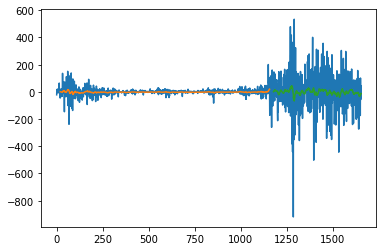

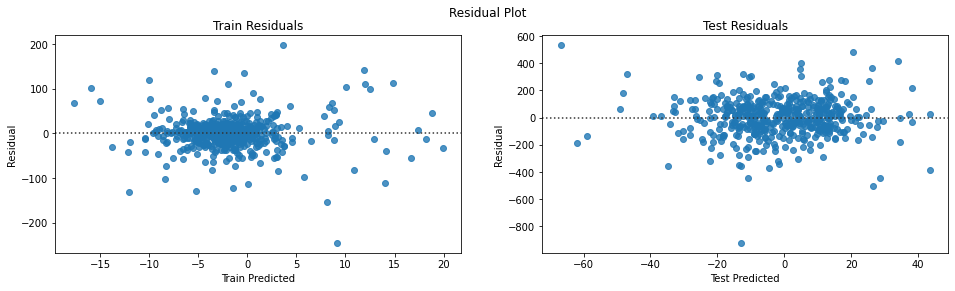

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824       0.005494
1  0.043448        0.043448      -0.001547
2 -0.006625       -0.006625       0.001086
3  0.005187        0.005187       0.003567
4  0.009340        0.009340       0.002404
5 -0.014723       -0.014723       0.002155
6 -0.074885       -0.074885       0.002526
7  0.013579        0.013579       0.002176
8  0.049776        0.049776      -0.002556
9  0.038311        0.038311      -0.001616

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422      0.003678
1  0.041106       0.041106      0.003395
2  0.106756       0.106756     -0.000197
3  0.096170       0.096170      0.000877
4 -0.039826      -0.039826      0.005609
5  0.077684       0.077684      0.010062
6 -0.023742      -0.023742      0.004615
7 -0.037917      -0.037917      0.008270
8  0.082014       0.082014      0.005310
9  0.012263       0.012263      0.000801

RMSE Train = 0.05064597399352178
RMSE Test = 0.04966970157987074
MAPE Train = 1.510132607921972
MAPE Test = 1.1016740824408726
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


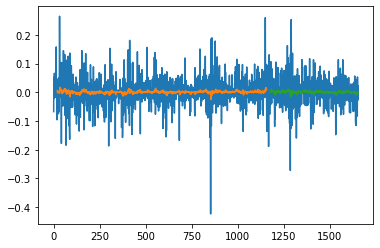

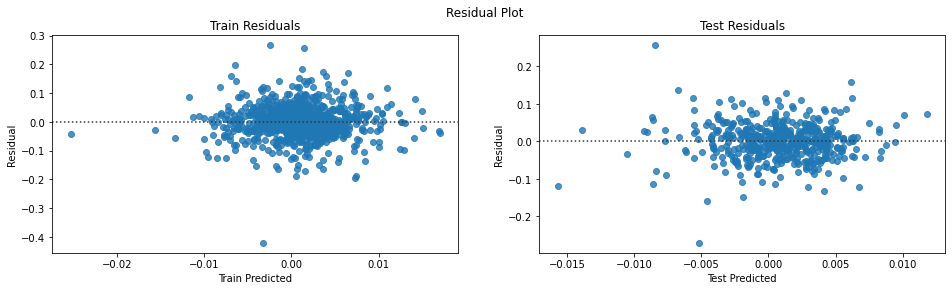

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.289670   
1           LSTM       3.0             Change in Close Price   25.203482   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
3   Stacked LSTM       3.0                             Close   36.949302   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
6       CNN-LSTM       3.0                             Close   29.933918   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
9           LSTM       5.0                             Close   44.301275   
10          LSTM       5.0             Change in Close Price   25.316185   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
12  Stacked LSTM       5.0                             Close   47.682356   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
15      CNN-LSTM       5.0                             Close   42.739397   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
18          LSTM      10.0                             Close   48.844084   
19          LSTM      10.0             Change in Close Price   32.355663   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
21  Stacked LSTM      10.0                             Close   50.605606   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   
24      CNN-LSTM      10.0                             Close   43.039384   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
27          LSTM      20.0                             Close   47.653942   
28          LSTM      20.0             Change in Close Price   25.253115   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
30  Stacked LSTM      20.0                             Close   51.865101   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
33      CNN-LSTM      20.0                             Close   41.299976   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   

     rmse_test  mape_train  mape_test  
0   188.530993    0.074035   0.051573  
1   142.874938    2.037173   1.225099  
2     0.050861    1.657025   1.148650  
3   186.660775    0.058912   0.051567  
4   142.566567    2.620456   1.161504  
5     0.051149    2.416910   1.343368  
6   191.662306    0.041398   0.050025  
7   144.017261    2.325257   1.245834  
8     0.051329    2.014344   1.091829  
9   231.967346    0.061199   0.063723  
10  143.699243    1.941201   1.226957  
11    0.050827    1.436698   1.023784  
12  225.785736    0.119394   0.063883  
13  143.209521    4.428113   1.152942  
14    0.051076    1.579724   1.054735  
15  208.563785    0.059694   0.058399  
16  143.336741    2.509313   1.213910  
17    0.051135    1.827386   1.085710  
18  231.784156    0.080165   0.064937  
19  145.190655   26.415329   1.303023  
20    0.050880    1.414270   1.066210  
21  241.807417    0.069414   0.068303  
22  143.161020    7.222384   1.165718  
23    0.052002    3.054382   1.405438  
24  217.107938    0.067285   0.061078  
25  144.016692    3.270279   1.348698  
26    0.050796    2.097048   1.242421  
27  235.424110    0.064790   0.066349  
28  143.938555    2.246848   1.226883 

Total execution time (mins) =  11.412224332491556


model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   29.933918   
3   Stacked LSTM       3.0                             Close   36.949302   
0           LSTM       3.0                             Close   37.289670   
15      CNN-LSTM       5.0                             Close   42.739397   
24      CNN-LSTM      10.0                             Close   43.039384   
33      CNN-LSTM      20.0                             Close   41.299976   
9           LSTM       5.0                             Close   44.301275   
12  Stacked LSTM       5.0                             Close   47.682356   
18          LSTM      10.0                             Close   48.844084   
27          LSTM      20.0                             Close   47.653942   
21  Stacked LSTM      10.0                             Close   50.605606   
30  Stacked LSTM      20.0                             Close   51.865101   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
1           LSTM       3.0             Change in Close Price   25.203482   
28          LSTM      20.0             Change in Close Price   25.253115   
10          LSTM       5.0             Change in Close Price   25.316185   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
19          LSTM      10.0             Change in Close Price   32.355663   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
3   186.660775    0.058912   0.051567  
0   188.530993    0.074035   0.051573  
15  208.563785    0.059694   0.058399  
24  217.107938    0.067285   0.061078  
33  223.168357    0.058956   0.062521  
9   231.967346    0.061199   0.063723  
12  225.785736    0.119394   0.063883  
18  231.784156    0.080165   0.064937  
27  235.424110    0.064790   0.066349  
21  241.807417    0.069414   0.068303  
30  292.826699    0.083233   0.081369  
11    0.050827    1.436698   1.023784  
14    0.051076    1.579724   1.054735  
32    0.049890    1.500437   1.063448  
20    0.050880    1.414270   1.066210  
17    0.051135    1.827386   1.085710  
8     0.051329    2.014344   1.091829  
29    0.049636    1.434691   1.099493  
35    0.049670    1.510133   1.101674  
2     0.050861    1.657025   1.148650  
13  143.209521    4.428113   1.152942  
4   142.566567    2.620456   1.161504  
22  143.161020    7.222384   1.165718  
31  143.840072    4.338296   1.189991  
34  143.912477    3.578928   1.198044  
16  143.336741    2.509313   1.213910  
1   142.874938    2.037173   1.225099  
28  143.938555    2.246848   1.226883 

In [895]:
import time

start=time.time()

ibm = IntervalBasedModel(df_close, df_deltaClose, df_deltaPctClose)
ibm.execute_all_intervals()

end=time.time()
total_execution_time = end-start
print("Total execution time (mins) = ", total_execution_time/60)

metrics_df = ibm.get_metrics_df()

metrics_df.sort_values(by=['mape_test'], ascending=True)

## Evaluate Models

In [896]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   29.933918   
3   Stacked LSTM       3.0                             Close   36.949302   
0           LSTM       3.0                             Close   37.289670   
15      CNN-LSTM       5.0                             Close   42.739397   
24      CNN-LSTM      10.0                             Close   43.039384   
33      CNN-LSTM      20.0                             Close   41.299976   
9           LSTM       5.0                             Close   44.301275   
12  Stacked LSTM       5.0                             Close   47.682356   
18          LSTM      10.0                             Close   48.844084   
27          LSTM      20.0                             Close   47.653942   
21  Stacked LSTM      10.0                             Close   50.605606   
30  Stacked LSTM      20.0                             Close   51.865101   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
1           LSTM       3.0             Change in Close Price   25.203482   
28          LSTM      20.0             Change in Close Price   25.253115   
10          LSTM       5.0             Change in Close Price   25.316185   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
19          LSTM      10.0             Change in Close Price   32.355663   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
3   186.660775    0.058912   0.051567  
0   188.530993    0.074035   0.051573  
15  208.563785    0.059694   0.058399  
24  217.107938    0.067285   0.061078  
33  223.168357    0.058956   0.062521  
9   231.967346    0.061199   0.063723  
12  225.785736    0.119394   0.063883  
18  231.784156    0.080165   0.064937  
27  235.424110    0.064790   0.066349  
21  241.807417    0.069414   0.068303  
30  292.826699    0.083233   0.081369  
11    0.050827    1.436698   1.023784  
14    0.051076    1.579724   1.054735  
32    0.049890    1.500437   1.063448  
20    0.050880    1.414270   1.066210  
17    0.051135    1.827386   1.085710  
8     0.051329    2.014344   1.091829  
29    0.049636    1.434691   1.099493  
35    0.049670    1.510133   1.101674  
2     0.050861    1.657025   1.148650  
13  143.209521    4.428113   1.152942  
4   142.566567    2.620456   1.161504  
22  143.161020    7.222384   1.165718  
31  143.840072    4.338296   1.189991  
34  143.912477    3.578928   1.198044  
16  143.336741    2.509313   1.213910  
1   142.874938    2.037173   1.225099  
28  143.938555    2.246848   1.226883 

### Evaluate By MAPE and RMSE

In [897]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   29.933918   
3   Stacked LSTM       3.0                             Close   36.949302   
0           LSTM       3.0                             Close   37.289670   
15      CNN-LSTM       5.0                             Close   42.739397   
24      CNN-LSTM      10.0                             Close   43.039384   
33      CNN-LSTM      20.0                             Close   41.299976   
9           LSTM       5.0                             Close   44.301275   
12  Stacked LSTM       5.0                             Close   47.682356   
18          LSTM      10.0                             Close   48.844084   
27          LSTM      20.0                             Close   47.653942   
21  Stacked LSTM      10.0                             Close   50.605606   
30  Stacked LSTM      20.0                             Close   51.865101   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
1           LSTM       3.0             Change in Close Price   25.203482   
28          LSTM      20.0             Change in Close Price   25.253115   
10          LSTM       5.0             Change in Close Price   25.316185   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
19          LSTM      10.0             Change in Close Price   32.355663   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
3   186.660775    0.058912   0.051567  
0   188.530993    0.074035   0.051573  
15  208.563785    0.059694   0.058399  
24  217.107938    0.067285   0.061078  
33  223.168357    0.058956   0.062521  
9   231.967346    0.061199   0.063723  
12  225.785736    0.119394   0.063883  
18  231.784156    0.080165   0.064937  
27  235.424110    0.064790   0.066349  
21  241.807417    0.069414   0.068303  
30  292.826699    0.083233   0.081369  
11    0.050827    1.436698   1.023784  
14    0.051076    1.579724   1.054735  
32    0.049890    1.500437   1.063448  
20    0.050880    1.414270   1.066210  
17    0.051135    1.827386   1.085710  
8     0.051329    2.014344   1.091829  
29    0.049636    1.434691   1.099493  
35    0.049670    1.510133   1.101674  
2     0.050861    1.657025   1.148650  
13  143.209521    4.428113   1.152942  
4   142.566567    2.620456   1.161504  
22  143.161020    7.222384   1.165718  
31  143.840072    4.338296   1.189991  
34  143.912477    3.578928   1.198044  
16  143.336741    2.509313   1.213910  
1   142.874938    2.037173   1.225099  
28  143.938555    2.246848   1.226883 

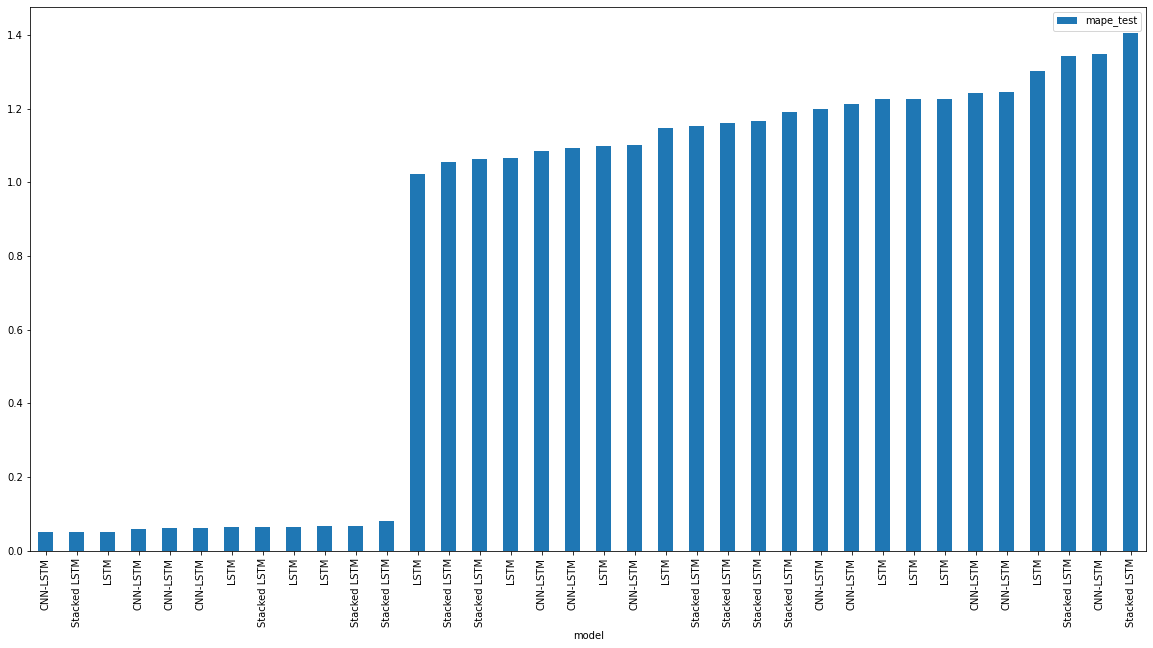

In [898]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test', figsize=(20,10))
plt.show()

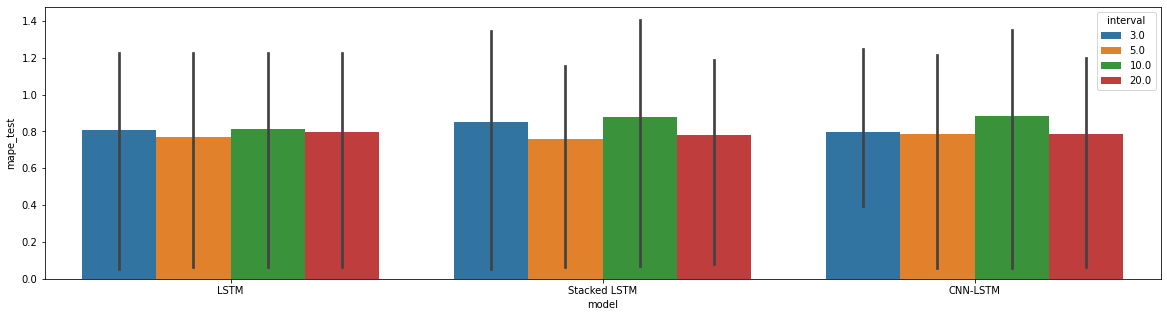

In [899]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df)
plt.show()

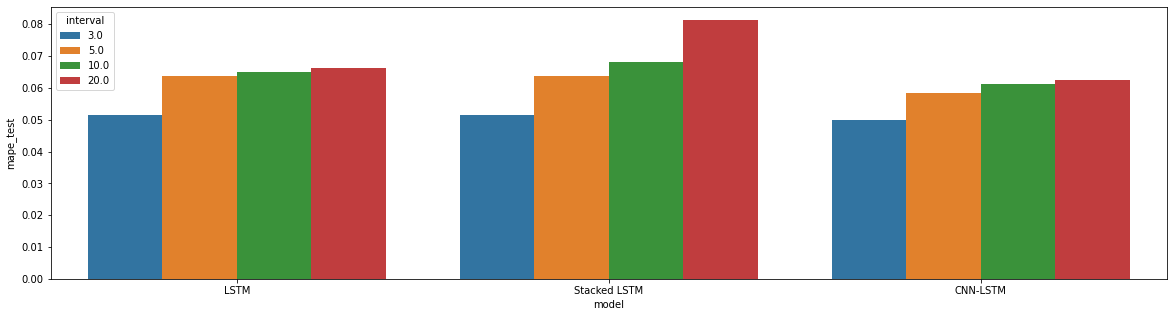

In [900]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df[metrics_df.target=="Close"])
plt.show()

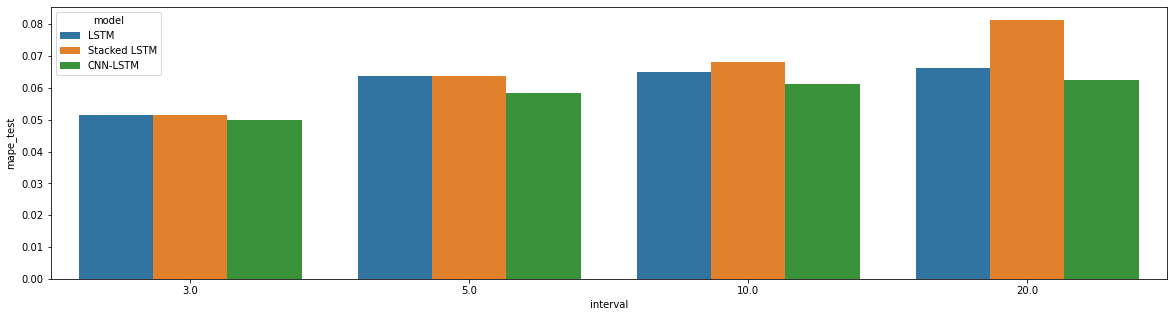

In [901]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="interval", y="mape_test", hue="model", data=metrics_df[metrics_df.target=="Close"])
plt.show()

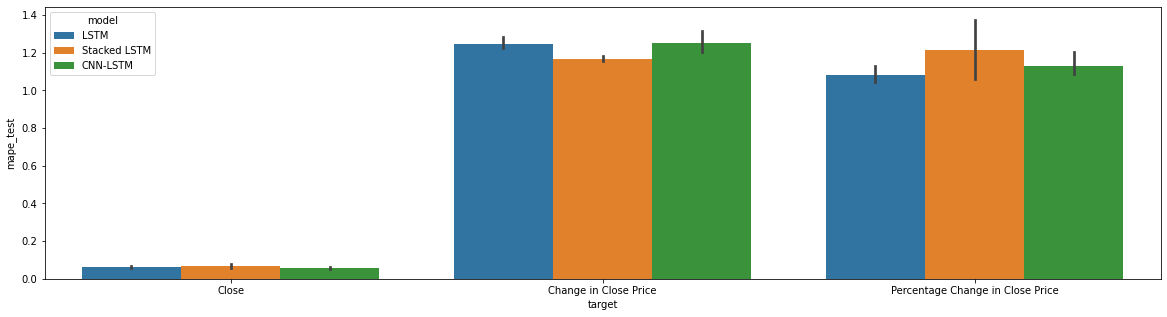

In [926]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="target", y="mape_test", hue="model", data=metrics_df)
plt.show()

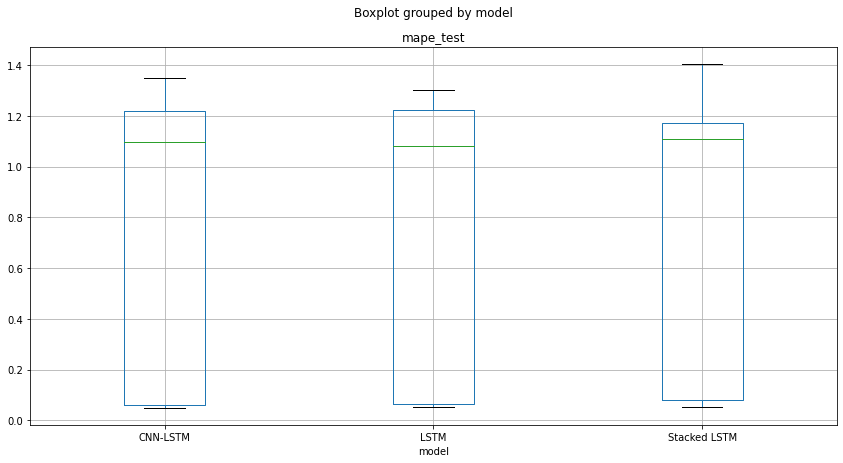

In [902]:
metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.show()

In [903]:
metrics_df.groupby(by='model')['mape_test'].agg(['mean', 'min', 'max'])

mean       min       max
model                                     
CNN-LSTM      0.813345  0.050025  1.348698
LSTM          0.797223  0.051573  1.303023
Stacked LSTM  0.816856  0.051567  1.405438

In [904]:
metrics_df.groupby(by='model')['mape_test'].agg('mean')

model
CNN-LSTM        0.813345
LSTM            0.797223
Stacked LSTM    0.816856
Name: mape_test, dtype: float64

In [905]:
for model in ['LSTM', 'Stacked LSTM', 'CNN-LSTM']:
  print(f"Best Performing {model} model")
  df = metrics_df[metrics_df.model == model].sort_values(by=['mape_test'], ascending=True)
  display(df)

Best Performing LSTM model


model  interval                            target  rmse_train   rmse_test  \
0   LSTM       3.0                             Close   37.289670  188.530993   
9   LSTM       5.0                             Close   44.301275  231.967346   
18  LSTM      10.0                             Close   48.844084  231.784156   
27  LSTM      20.0                             Close   47.653942  235.424110   
11  LSTM       5.0  Percentage Change in Close Price    0.050940    0.050827   
20  LSTM      10.0  Percentage Change in Close Price    0.050994    0.050880   
29  LSTM      20.0  Percentage Change in Close Price    0.050651    0.049636   
2   LSTM       3.0  Percentage Change in Close Price    0.050804    0.050861   
1   LSTM       3.0             Change in Close Price   25.203482  142.874938   
28  LSTM      20.0             Change in Close Price   25.253115  143.938555   
10  LSTM       5.0             Change in Close Price   25.316185  143.699243   
19  LSTM      10.0             Change in Close Price   32.355663  145.190655   

    mape_train  mape_test  
0     0.074035   0.051573  
9     0.061199   0.063723  
18    0.080165   0.064937  
27    0.064790   0.066349  
11    1.436698   1.023784  
20    1.414270   1.066210  
29    1.434691   1.099493  
2     1.657025   1.148650  
1     2.037173   1.225099  
28    2.246848   1.226883  
10    1.941201   1.226957  
19   26.415329   1.303023

Best Performing Stacked LSTM model


model  interval                            target  rmse_train  \
3   Stacked LSTM       3.0                             Close   36.949302   
12  Stacked LSTM       5.0                             Close   47.682356   
21  Stacked LSTM      10.0                             Close   50.605606   
30  Stacked LSTM      20.0                             Close   51.865101   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   

     rmse_test  mape_train  mape_test  
3   186.660775    0.058912   0.051567  
12  225.785736    0.119394   0.063883  
21  241.807417    0.069414   0.068303  
30  292.826699    0.083233   0.081369  
14    0.051076    1.579724   1.054735  
32    0.049890    1.500437   1.063448  
13  143.209521    4.428113   1.152942  
4   142.566567    2.620456   1.161504  
22  143.161020    7.222384   1.165718  
31  143.840072    4.338296   1.189991  
5     0.051149    2.416910   1.343368  
23    0.052002    3.054382   1.405438

Best Performing CNN-LSTM model


model  interval                            target  rmse_train  \
6   CNN-LSTM       3.0                             Close   29.933918   
15  CNN-LSTM       5.0                             Close   42.739397   
24  CNN-LSTM      10.0                             Close   43.039384   
33  CNN-LSTM      20.0                             Close   41.299976   
17  CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
8   CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
35  CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
34  CNN-LSTM      20.0             Change in Close Price   25.373053   
16  CNN-LSTM       5.0             Change in Close Price   25.249615   
26  CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
7   CNN-LSTM       3.0             Change in Close Price   25.192320   
25  CNN-LSTM      10.0             Change in Close Price   25.351394   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
15  208.563785    0.059694   0.058399  
24  217.107938    0.067285   0.061078  
33  223.168357    0.058956   0.062521  
17    0.051135    1.827386   1.085710  
8     0.051329    2.014344   1.091829  
35    0.049670    1.510133   1.101674  
34  143.912477    3.578928   1.198044  
16  143.336741    2.509313   1.213910  
26    0.050796    2.097048   1.242421  
7   144.017261    2.325257   1.245834  
25  144.016692    3.270279   1.348698

[]

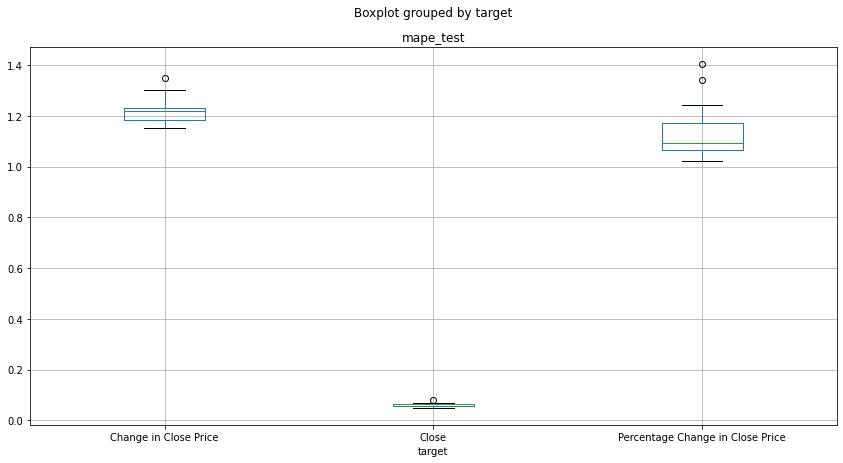

In [906]:
metrics_df.boxplot(column=['mape_test'], by='target', figsize=(14, 7))
plt.plot()

[]

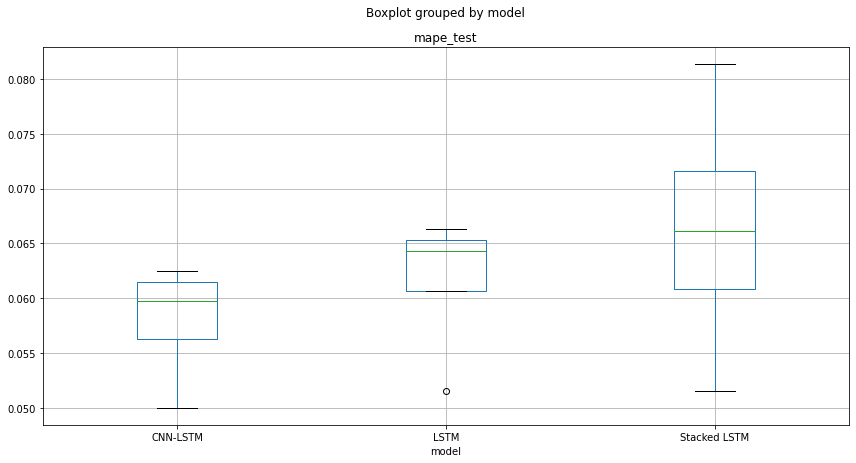

In [907]:
metrics_df[metrics_df.target == 'Close'].boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [908]:
# Display best performing model on Close price
metrics_df[metrics_df.target == 'Close'].sort_values(by=['mape_test'], ascending=True)

model  interval target  rmse_train   rmse_test  mape_train  \
6       CNN-LSTM       3.0  Close   29.933918  191.662306    0.041398   
3   Stacked LSTM       3.0  Close   36.949302  186.660775    0.058912   
0           LSTM       3.0  Close   37.289670  188.530993    0.074035   
15      CNN-LSTM       5.0  Close   42.739397  208.563785    0.059694   
24      CNN-LSTM      10.0  Close   43.039384  217.107938    0.067285   
33      CNN-LSTM      20.0  Close   41.299976  223.168357    0.058956   
9           LSTM       5.0  Close   44.301275  231.967346    0.061199   
12  Stacked LSTM       5.0  Close   47.682356  225.785736    0.119394   
18          LSTM      10.0  Close   48.844084  231.784156    0.080165   
27          LSTM      20.0  Close   47.653942  235.424110    0.064790   
21  Stacked LSTM      10.0  Close   50.605606  241.807417    0.069414   
30  Stacked LSTM      20.0  Close   51.865101  292.826699    0.083233   

    mape_test  
6    0.050025  
3    0.051567  
0    0.051573  
15   0.058399  
24   0.061078  
33   0.062521  
9    0.063723  
12   0.063883  
18   0.064937  
27   0.066349  
21   0.068303  
30   0.081369

### Evaluate By Window Size

[]

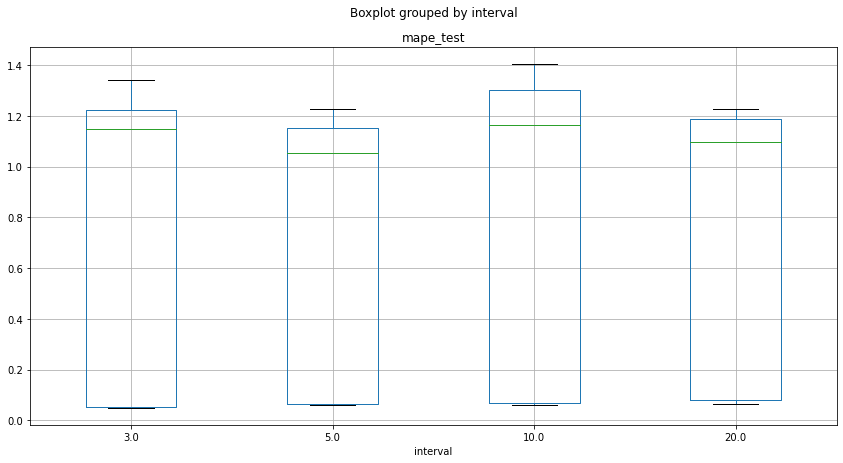

In [909]:
metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

[]

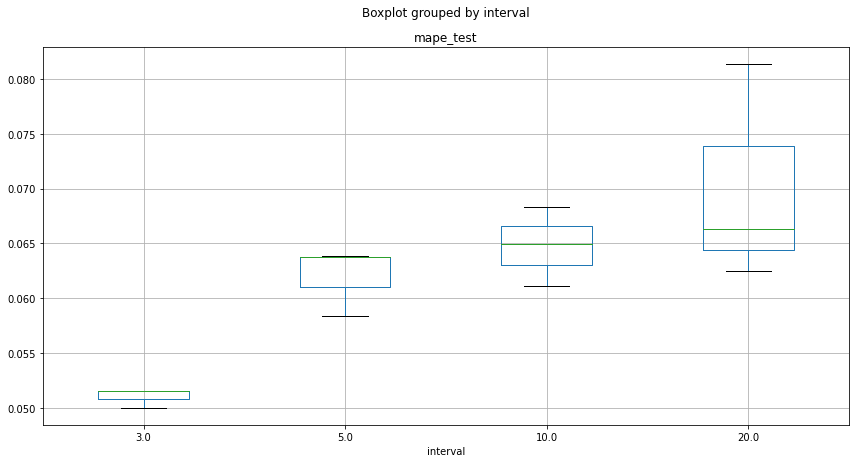

In [910]:
metrics_df[metrics_df.target=="Close"].boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

In [911]:
# metrics_df[metrics_df.target=="Close"]
metrics_df[metrics_df.interval=="Close"]

Empty DataFrame
Columns: [model, interval, target, rmse_train, rmse_test, mape_train, mape_test]
Index: []

In [912]:
# Display best performing model on Close price
for i in [3,5,10,20]:
  display(metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True))

model  interval                            target  rmse_train  \
6      CNN-LSTM       3.0                             Close   29.933918   
3  Stacked LSTM       3.0                             Close   36.949302   
0          LSTM       3.0                             Close   37.289670   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
2          LSTM       3.0  Percentage Change in Close Price    0.050804   
4  Stacked LSTM       3.0             Change in Close Price   25.199269   
1          LSTM       3.0             Change in Close Price   25.203482   
7      CNN-LSTM       3.0             Change in Close Price   25.192320   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   

    rmse_test  mape_train  mape_test  
6  191.662306    0.041398   0.050025  
3  186.660775    0.058912   0.051567  
0  188.530993    0.074035   0.051573  
8    0.051329    2.014344   1.091829  
2    0.050861    1.657025   1.148650  
4  142.566567    2.620456   1.161504  
1  142.874938    2.037173   1.225099  
7  144.017261    2.325257   1.245834  
5    0.051149    2.416910   1.343368

model  interval                            target  rmse_train  \
15      CNN-LSTM       5.0                             Close   42.739397   
9           LSTM       5.0                             Close   44.301275   
12  Stacked LSTM       5.0                             Close   47.682356   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
10          LSTM       5.0             Change in Close Price   25.316185   

     rmse_test  mape_train  mape_test  
15  208.563785    0.059694   0.058399  
9   231.967346    0.061199   0.063723  
12  225.785736    0.119394   0.063883  
11    0.050827    1.436698   1.023784  
14    0.051076    1.579724   1.054735  
17    0.051135    1.827386   1.085710  
13  143.209521    4.428113   1.152942  
16  143.336741    2.509313   1.213910  
10  143.699243    1.941201   1.226957

model  interval                            target  rmse_train  \
24      CNN-LSTM      10.0                             Close   43.039384   
18          LSTM      10.0                             Close   48.844084   
21  Stacked LSTM      10.0                             Close   50.605606   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
19          LSTM      10.0             Change in Close Price   32.355663   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   

     rmse_test  mape_train  mape_test  
24  217.107938    0.067285   0.061078  
18  231.784156    0.080165   0.064937  
21  241.807417    0.069414   0.068303  
20    0.050880    1.414270   1.066210  
22  143.161020    7.222384   1.165718  
26    0.050796    2.097048   1.242421  
19  145.190655   26.415329   1.303023  
25  144.016692    3.270279   1.348698  
23    0.052002    3.054382   1.405438

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   41.299976   
27          LSTM      20.0                             Close   47.653942   
30  Stacked LSTM      20.0                             Close   51.865101   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
28          LSTM      20.0             Change in Close Price   25.253115   

     rmse_test  mape_train  mape_test  
33  223.168357    0.058956   0.062521  
27  235.424110    0.064790   0.066349  
30  292.826699    0.083233   0.081369  
32    0.049890    1.500437   1.063448  
29    0.049636    1.434691   1.099493  
35    0.049670    1.510133   1.101674  
31  143.840072    4.338296   1.189991  
34  143.912477    3.578928   1.198044  
28  143.938555    2.246848   1.226883

In [913]:
metrics_df['mape_test'].mean()

0.8091413414414774

In [914]:
# metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True)
print("Interval mean MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].mean())
print("Interval min MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].min())
print("Interval max MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].max())

Interval mean MAPE
interval
3.0     0.818828
5.0     0.771560
10.0    0.858425
20.0    0.787752
Name: mape_test, dtype: float64
Interval min MAPE
interval
3.0     0.050025
5.0     0.058399
10.0    0.061078
20.0    0.062521
Name: mape_test, dtype: float64
Interval max MAPE
interval
3.0     1.343368
5.0     1.226957
10.0    1.405438
20.0    1.226883
Name: mape_test, dtype: float64


In [915]:
interval_group_df = metrics_df.groupby(by='interval')['mape_test'].agg(['mean', 'min', 'max'])

In [916]:
display(interval_group_df.sort_values(by='mean', ascending=True))
display(interval_group_df.sort_values(by='min', ascending=True))
display(interval_group_df.sort_values(by='max', ascending=False))

mean       min       max
interval                              
5.0       0.771560  0.058399  1.226957
20.0      0.787752  0.062521  1.226883
3.0       0.818828  0.050025  1.343368
10.0      0.858425  0.061078  1.405438

mean       min       max
interval                              
3.0       0.818828  0.050025  1.343368
5.0       0.771560  0.058399  1.226957
10.0      0.858425  0.061078  1.405438
20.0      0.787752  0.062521  1.226883

mean       min       max
interval                              
10.0      0.858425  0.061078  1.405438
3.0       0.818828  0.050025  1.343368
5.0       0.771560  0.058399  1.226957
20.0      0.787752  0.062521  1.226883

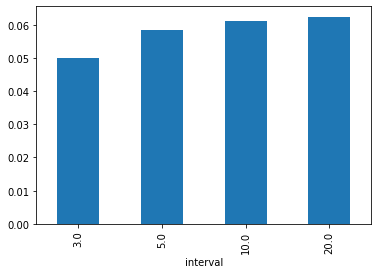

In [917]:
interval_group_df['min'].plot.bar()

mape_test    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

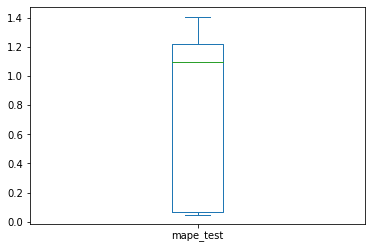

In [918]:
# metrics_df.groupby(by=['model','interval'])['mape_test'].plot.box(subplots=True)
metrics_df['mape_test'].plot.box(subplots=True)

## Best model for Close prediction

In [919]:
close_metrics_df = metrics_df[metrics_df.target=='Close']
close_metrics_df

model  interval target  rmse_train   rmse_test  mape_train  \
0           LSTM       3.0  Close   37.289670  188.530993    0.074035   
3   Stacked LSTM       3.0  Close   36.949302  186.660775    0.058912   
6       CNN-LSTM       3.0  Close   29.933918  191.662306    0.041398   
9           LSTM       5.0  Close   44.301275  231.967346    0.061199   
12  Stacked LSTM       5.0  Close   47.682356  225.785736    0.119394   
15      CNN-LSTM       5.0  Close   42.739397  208.563785    0.059694   
18          LSTM      10.0  Close   48.844084  231.784156    0.080165   
21  Stacked LSTM      10.0  Close   50.605606  241.807417    0.069414   
24      CNN-LSTM      10.0  Close   43.039384  217.107938    0.067285   
27          LSTM      20.0  Close   47.653942  235.424110    0.064790   
30  Stacked LSTM      20.0  Close   51.865101  292.826699    0.083233   
33      CNN-LSTM      20.0  Close   41.299976  223.168357    0.058956   

    mape_test  
0    0.051573  
3    0.051567  
6    0.050025  
9    0.063723  
12   0.063883  
15   0.058399  
18   0.064937  
21   0.068303  
24   0.061078  
27   0.066349  
30   0.081369  
33   0.062521

In [920]:
close_metrics_df.sort_values(by="mape_test")

model  interval target  rmse_train   rmse_test  mape_train  \
6       CNN-LSTM       3.0  Close   29.933918  191.662306    0.041398   
3   Stacked LSTM       3.0  Close   36.949302  186.660775    0.058912   
0           LSTM       3.0  Close   37.289670  188.530993    0.074035   
15      CNN-LSTM       5.0  Close   42.739397  208.563785    0.059694   
24      CNN-LSTM      10.0  Close   43.039384  217.107938    0.067285   
33      CNN-LSTM      20.0  Close   41.299976  223.168357    0.058956   
9           LSTM       5.0  Close   44.301275  231.967346    0.061199   
12  Stacked LSTM       5.0  Close   47.682356  225.785736    0.119394   
18          LSTM      10.0  Close   48.844084  231.784156    0.080165   
27          LSTM      20.0  Close   47.653942  235.424110    0.064790   
21  Stacked LSTM      10.0  Close   50.605606  241.807417    0.069414   
30  Stacked LSTM      20.0  Close   51.865101  292.826699    0.083233   

    mape_test  
6    0.050025  
3    0.051567  
0    0.051573  
15   0.058399  
24   0.061078  
33   0.062521  
9    0.063723  
12   0.063883  
18   0.064937  
27   0.066349  
21   0.068303  
30   0.081369

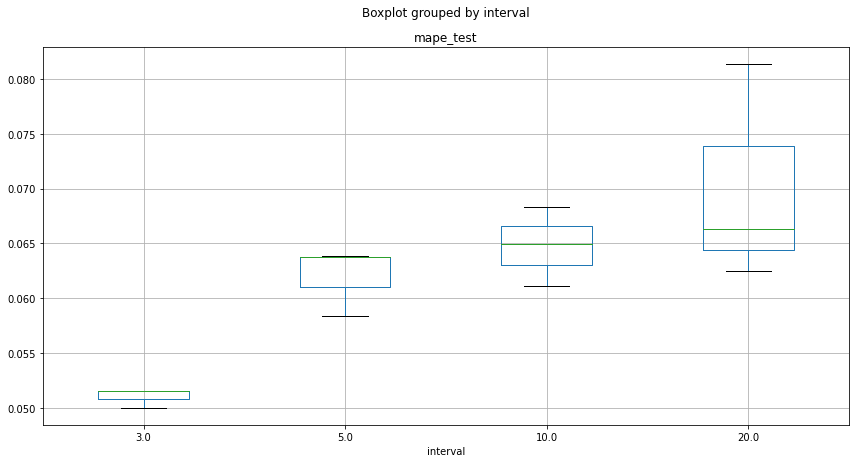

In [921]:
close_metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))

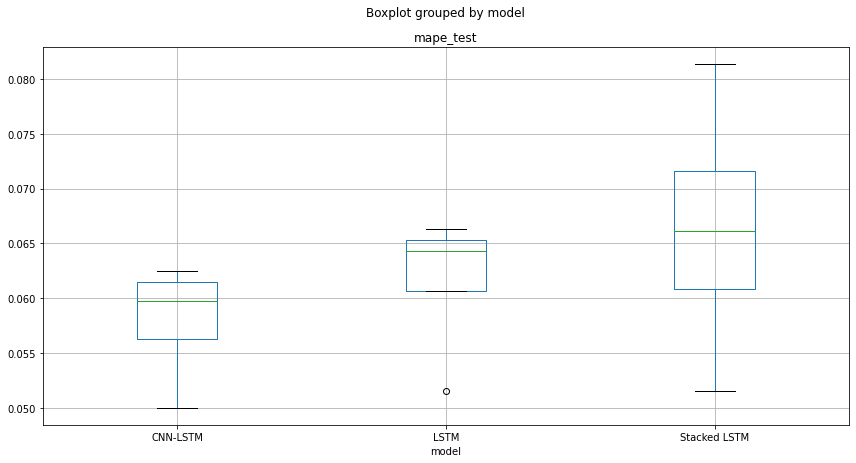

In [922]:
close_metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))

## End

In [923]:
metrics_df.sort_values(by=['model', 'interval'])

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   29.933918   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
15      CNN-LSTM       5.0                             Close   42.739397   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
24      CNN-LSTM      10.0                             Close   43.039384   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
33      CNN-LSTM      20.0                             Close   41.299976   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
0           LSTM       3.0                             Close   37.289670   
1           LSTM       3.0             Change in Close Price   25.203482   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
9           LSTM       5.0                             Close   44.301275   
10          LSTM       5.0             Change in Close Price   25.316185   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
18          LSTM      10.0                             Close   48.844084   
19          LSTM      10.0             Change in Close Price   32.355663   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
27          LSTM      20.0                             Close   47.653942   
28          LSTM      20.0             Change in Close Price   25.253115   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
3   Stacked LSTM       3.0                             Close   36.949302   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
12  Stacked LSTM       5.0                             Close   47.682356   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
21  Stacked LSTM      10.0                             Close   50.605606   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   
30  Stacked LSTM      20.0                             Close   51.865101   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
7   144.017261    2.325257   1.245834  
8     0.051329    2.014344   1.091829  
15  208.563785    0.059694   0.058399  
16  143.336741    2.509313   1.213910  
17    0.051135    1.827386   1.085710  
24  217.107938    0.067285   0.061078  
25  144.016692    3.270279   1.348698  
26    0.050796    2.097048   1.242421  
33  223.168357    0.058956   0.062521  
34  143.912477    3.578928   1.198044  
35    0.049670    1.510133   1.101674  
0   188.530993    0.074035   0.051573  
1   142.874938    2.037173   1.225099  
2     0.050861    1.657025   1.148650  
9   231.967346    0.061199   0.063723  
10  143.699243    1.941201   1.226957  
11    0.050827    1.436698   1.023784  
18  231.784156    0.080165   0.064937  
19  145.190655   26.415329   1.303023  
20    0.050880    1.414270   1.066210  
27  235.424110    0.064790   0.066349  
28  143.938555    2.246848   1.226883  
29    0.049636    1.434691   1.099493  
3   186.660775    0.058912   0.051567  
4   142.566567    2.620456   1.161504  
5     0.051149    2.416910   1.343368  
12  225.785736    0.119394   0.063883  
13  143.209521    4.428113   1.152942 

In [924]:
metrics_df.sort_values(by=['model', 'interval'])

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   29.933918   
7       CNN-LSTM       3.0             Change in Close Price   25.192320   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.051219   
15      CNN-LSTM       5.0                             Close   42.739397   
16      CNN-LSTM       5.0             Change in Close Price   25.249615   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.051031   
24      CNN-LSTM      10.0                             Close   43.039384   
25      CNN-LSTM      10.0             Change in Close Price   25.351394   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050995   
33      CNN-LSTM      20.0                             Close   41.299976   
34      CNN-LSTM      20.0             Change in Close Price   25.373053   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050646   
0           LSTM       3.0                             Close   37.289670   
1           LSTM       3.0             Change in Close Price   25.203482   
2           LSTM       3.0  Percentage Change in Close Price    0.050804   
9           LSTM       5.0                             Close   44.301275   
10          LSTM       5.0             Change in Close Price   25.316185   
11          LSTM       5.0  Percentage Change in Close Price    0.050940   
18          LSTM      10.0                             Close   48.844084   
19          LSTM      10.0             Change in Close Price   32.355663   
20          LSTM      10.0  Percentage Change in Close Price    0.050994   
27          LSTM      20.0                             Close   47.653942   
28          LSTM      20.0             Change in Close Price   25.253115   
29          LSTM      20.0  Percentage Change in Close Price    0.050651   
3   Stacked LSTM       3.0                             Close   36.949302   
4   Stacked LSTM       3.0             Change in Close Price   25.199269   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.051097   
12  Stacked LSTM       5.0                             Close   47.682356   
13  Stacked LSTM       5.0             Change in Close Price   25.470094   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.051027   
21  Stacked LSTM      10.0                             Close   50.605606   
22  Stacked LSTM      10.0             Change in Close Price   25.870788   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.052214   
30  Stacked LSTM      20.0                             Close   51.865101   
31  Stacked LSTM      20.0             Change in Close Price   25.423239   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050863   

     rmse_test  mape_train  mape_test  
6   191.662306    0.041398   0.050025  
7   144.017261    2.325257   1.245834  
8     0.051329    2.014344   1.091829  
15  208.563785    0.059694   0.058399  
16  143.336741    2.509313   1.213910  
17    0.051135    1.827386   1.085710  
24  217.107938    0.067285   0.061078  
25  144.016692    3.270279   1.348698  
26    0.050796    2.097048   1.242421  
33  223.168357    0.058956   0.062521  
34  143.912477    3.578928   1.198044  
35    0.049670    1.510133   1.101674  
0   188.530993    0.074035   0.051573  
1   142.874938    2.037173   1.225099  
2     0.050861    1.657025   1.148650  
9   231.967346    0.061199   0.063723  
10  143.699243    1.941201   1.226957  
11    0.050827    1.436698   1.023784  
18  231.784156    0.080165   0.064937  
19  145.190655   26.415329   1.303023  
20    0.050880    1.414270   1.066210  
27  235.424110    0.064790   0.066349  
28  143.938555    2.246848   1.226883  
29    0.049636    1.434691   1.099493  
3   186.660775    0.058912   0.051567  
4   142.566567    2.620456   1.161504  
5     0.051149    2.416910   1.343368  
12  225.785736    0.119394   0.063883  
13  143.209521    4.428113   1.152942 